# <div align="center" style="color: #ff5733;">CIC Data Creation</div>

In [1]:
# %% [markdown]
# # Jupyter Notebook Loading Header
#
# This is a custom loading header for Jupyter Notebooks in Visual Studio Code.
# It includes common imports and settings to get you started quickly.

# %% [markdown]
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import os
path = r'C:\Users\DwaipayanChakroborti\AppData\Roaming\gcloud\legacy_credentials\dchakroborti@tonikbank.com\adc.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path
client = bigquery.Client(project='prj-prod-dataplatform')

# %% [markdown]
## Configure Settings
# Set options or configurations as needed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# ContractHistoryType

In [2]:
sq = """select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce(ContractHistoryType, 'NA') ContractHistoryType 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID 072c0e9f-e0b8-4506-9a3f-8e1b65d28093 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [3]:
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,ContractHistoryType
0,1746421,def161dc-442d-4b31-9f7a-7cd68f5d88b8,E00528048,2023-05-25,Granted,CreditCards
1,1305659,e7a22859-bfff-4449-8689-68cc7a612cde,204739377,2023-05-25,NotGranted,Installments
2,1076830,6e5ed2b6-0ca1-45ec-a799-7b82f7e6e0d0,F01501573,2023-05-25,NotGranted,Installments
3,1901230,aa542179-e118-4ee5-921b-adf24fefa84f,204617262,2023-05-25,NotGranted,NonInstallments
4,2061440,c26f74f1-60d9-434d-85b9-7275e0eb27dd,A04313732,2023-05-25,Granted,Installments


In [4]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc['ContractHistoryType']
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,ContractHistoryType,joint
0,1746421,def161dc-442d-4b31-9f7a-7cd68f5d88b8,E00528048,2023-05-25,Granted,CreditCards,Granted_CreditCards
1,1305659,e7a22859-bfff-4449-8689-68cc7a612cde,204739377,2023-05-25,NotGranted,Installments,NotGranted_Installments
2,1076830,6e5ed2b6-0ca1-45ec-a799-7b82f7e6e0d0,F01501573,2023-05-25,NotGranted,Installments,NotGranted_Installments
3,1901230,aa542179-e118-4ee5-921b-adf24fefa84f,204617262,2023-05-25,NotGranted,NonInstallments,NotGranted_NonInstallments
4,2061440,c26f74f1-60d9-434d-85b9-7275e0eb27dd,A04313732,2023-05-25,Granted,Installments,Granted_Installments


In [5]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.head()


CBContract                                               \
joint      Granted_CreditCards Granted_Installments Granted_NonInstallments   
customerId                                                                    
1000001                    8.0                  NaN                     NaN   
1000085                   13.0                  NaN                     NaN   
1000192                    5.0                  6.0                     1.0   
1000243                   17.0                 11.0                     1.0   
1000278                    4.0                 32.0                     2.0   

                                                                             \
joint      Granted_Utilities NotGranted_CreditCards NotGranted_Installments   
customerId                                                                    
1000001                  NaN                    NaN                     2.0   
1000085                  NaN                    NaN                     1.0   
1000192                  NaN                    NaN                     2.0   
1000243                  NaN                    NaN                     1.0   
1000278                  NaN                    NaN                    10.0   

                                              Tonikloanid  \
joint      NotGranted_NonInstallments Granted_CreditCards   
customerId                                                  
1000001                           NaN                 3.0   
1000085                           1.0                 2.0   
1000192                           1.0                 2.0   
1000243                           NaN                 1.0   
1000278                           NaN                 3.0   

                                                                           \
joint      Granted_Installments Granted_NonInstallments Granted_Utilities   
customerId                                                                  
1000001                     NaN                     NaN               NaN   
1000085                     NaN                     NaN               NaN   
1000192                     2.0                     2.0               NaN   
1000243                     1.0                     1.0               NaN   
1000278                     3.0                     3.0               NaN   

                                                           \
joint      NotGranted_CreditCards NotGranted_Installments   
customerId                                                  
1000001                       NaN                     2.0   
1000085                       NaN                     1.0   
1000192                       NaN                     1.0   
1000243                       NaN                     1.0   
1000278                       NaN                     3.0   

                                       
joint      NotGranted_NonInstallments  
customerId                             
1000001                           NaN  
1000085                           2.0  
1000192                           2.0  
1000243                           NaN  
1000278                           NaN

In [6]:
result_pivot.columns

MultiIndex([( 'CBContract',        'Granted_CreditCards'),
            ( 'CBContract',       'Granted_Installments'),
            ( 'CBContract',    'Granted_NonInstallments'),
            ( 'CBContract',          'Granted_Utilities'),
            ( 'CBContract',     'NotGranted_CreditCards'),
            ( 'CBContract',    'NotGranted_Installments'),
            ( 'CBContract', 'NotGranted_NonInstallments'),
            ('Tonikloanid',        'Granted_CreditCards'),
            ('Tonikloanid',       'Granted_Installments'),
            ('Tonikloanid',    'Granted_NonInstallments'),
            ('Tonikloanid',          'Granted_Utilities'),
            ('Tonikloanid',     'NotGranted_CreditCards'),
            ('Tonikloanid',    'NotGranted_Installments'),
            ('Tonikloanid', 'NotGranted_NonInstallments')],
           names=[None, 'joint'])

In [7]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',        'Granted_CreditCards'),
            ( 'CBContract',       'Granted_Installments'),
            ( 'CBContract',    'Granted_NonInstallments'),
            ( 'CBContract',          'Granted_Utilities'),
            ( 'CBContract',     'NotGranted_CreditCards'),
            ( 'CBContract',    'NotGranted_Installments'),
            ( 'CBContract', 'NotGranted_NonInstallments'),
            ('Tonikloanid',        'Granted_CreditCards'),
            ('Tonikloanid',       'Granted_Installments'),
            ('Tonikloanid',    'Granted_NonInstallments'),
            ('Tonikloanid',          'Granted_Utilities'),
            ('Tonikloanid',     'NotGranted_CreditCards'),
            ('Tonikloanid',    'NotGranted_Installments'),
            ('Tonikloanid', 'NotGranted_NonInstallments')],
           names=[None, 'joint'])

In [8]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"ContractHistoryType_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,ContractHistoryType_CBContract_Granted_CreditCards,ContractHistoryType_CBContract_Granted_Installments,ContractHistoryType_CBContract_Granted_NonInstallments,ContractHistoryType_CBContract_Granted_Utilities,ContractHistoryType_CBContract_NotGranted_CreditCards,ContractHistoryType_CBContract_NotGranted_Installments,ContractHistoryType_CBContract_NotGranted_NonInstallments,ContractHistoryType_Tonikloanid_Granted_CreditCards,ContractHistoryType_Tonikloanid_Granted_Installments,ContractHistoryType_Tonikloanid_Granted_NonInstallments,ContractHistoryType_Tonikloanid_Granted_Utilities,ContractHistoryType_Tonikloanid_NotGranted_CreditCards,ContractHistoryType_Tonikloanid_NotGranted_Installments,ContractHistoryType_Tonikloanid_NotGranted_NonInstallments
0,1000001,8.0,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN
1,1000085,13.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,2.0
2,1000192,5.0,6.0,1.0,NaN,NaN,2.0,1.0,2.0,2.0,2.0,NaN,NaN,1.0,2.0
3,1000243,17.0,11.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN
4,1000278,4.0,32.0,2.0,NaN,NaN,10.0,NaN,3.0,3.0,3.0,NaN,NaN,3.0,NaN


In [9]:
df = df_result.copy()
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [10]:
df.to_csv("cicdata_20240226.csv", index = False)

# RoleDesc

In [11]:
sq = """select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce(RoleDesc, 'NA') RoleDesc 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID bfe57652-4419-42b4-86d9-c6d39c780138 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679527, 6)

In [12]:
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,RoleDesc
0,2233297,caf14e65-d1d8-46b2-9b41-89a459b74f50,200864512,2023-09-14,Granted,Borrower
1,1332003,8badb23f-3aca-4146-8c5d-4b307f2c33d2,504467644,2023-09-14,Granted,Borrower
2,2233507,6bf2e4db-0e81-4478-bf99-212a90d558d3,100526813,2023-09-14,Granted,Borrower
3,1975029,e646c485-e501-451e-b401-9d6a6de4dade,C03339121,2023-09-14,Granted,Borrower
4,2050237,d5c3b4e4-3d5a-43ec-8631-02ad616337d4,L04755584,2023-09-14,NotGranted,Borrower


In [13]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc['RoleDesc']
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,RoleDesc,joint
0,2233297,caf14e65-d1d8-46b2-9b41-89a459b74f50,200864512,2023-09-14,Granted,Borrower,Granted_Borrower
1,1332003,8badb23f-3aca-4146-8c5d-4b307f2c33d2,504467644,2023-09-14,Granted,Borrower,Granted_Borrower
2,2233507,6bf2e4db-0e81-4478-bf99-212a90d558d3,100526813,2023-09-14,Granted,Borrower,Granted_Borrower
3,1975029,e646c485-e501-451e-b401-9d6a6de4dade,C03339121,2023-09-14,Granted,Borrower,Granted_Borrower
4,2050237,d5c3b4e4-3d5a-43ec-8631-02ad616337d4,L04755584,2023-09-14,NotGranted,Borrower,NotGranted_Borrower


In [14]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.head()


CBContract                                               \
joint      Granted_Borrower Granted_Co-Borrower Granted_Guarantor/Surety   
customerId                                                                 
1000001                 8.0                 NaN                      NaN   
1000085                13.0                 NaN                      NaN   
1000192                12.0                 NaN                      NaN   
1000243                29.0                 NaN                      NaN   
1000278                38.0                 NaN                      NaN   

                                                       \
joint      NotGranted_Borrower NotGranted_Co-Borrower   
customerId                                              
1000001                    2.0                    NaN   
1000085                    2.0                    1.0   
1000192                    3.0                    NaN   
1000243                    1.0                    NaN   
1000278                   10.0                    NaN   

                                            Tonikloanid                      \
joint      NotGranted_Guarantor/Surety Granted_Borrower Granted_Co-Borrower   
customerId                                                                    
1000001                            NaN              3.0                 NaN   
1000085                            NaN              2.0                 NaN   
1000192                            NaN              2.0                 NaN   
1000243                            NaN              1.0                 NaN   
1000278                            NaN              3.0                 NaN   

                                                         \
joint      Granted_Guarantor/Surety NotGranted_Borrower   
customerId                                                
1000001                         NaN                 2.0   
1000085                         NaN                 2.0   
1000192                         NaN                 2.0   
1000243                         NaN                 1.0   
1000278                         NaN                 3.0   

                                                               
joint      NotGranted_Co-Borrower NotGranted_Guarantor/Surety  
customerId                                                     
1000001                       NaN                         NaN  
1000085                       1.0                         NaN  
1000192                       NaN                         NaN  
1000243                       NaN                         NaN  
1000278                       NaN                         NaN

In [15]:
result_pivot.columns

MultiIndex([( 'CBContract',            'Granted_Borrower'),
            ( 'CBContract',         'Granted_Co-Borrower'),
            ( 'CBContract',    'Granted_Guarantor/Surety'),
            ( 'CBContract',         'NotGranted_Borrower'),
            ( 'CBContract',      'NotGranted_Co-Borrower'),
            ( 'CBContract', 'NotGranted_Guarantor/Surety'),
            ('Tonikloanid',            'Granted_Borrower'),
            ('Tonikloanid',         'Granted_Co-Borrower'),
            ('Tonikloanid',    'Granted_Guarantor/Surety'),
            ('Tonikloanid',         'NotGranted_Borrower'),
            ('Tonikloanid',      'NotGranted_Co-Borrower'),
            ('Tonikloanid', 'NotGranted_Guarantor/Surety')],
           names=[None, 'joint'])

In [16]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',            'Granted_Borrower'),
            ( 'CBContract',         'Granted_Co-Borrower'),
            ( 'CBContract',    'Granted_Guarantor/Surety'),
            ( 'CBContract',         'NotGranted_Borrower'),
            ( 'CBContract',      'NotGranted_Co-Borrower'),
            ( 'CBContract', 'NotGranted_Guarantor/Surety'),
            ('Tonikloanid',            'Granted_Borrower'),
            ('Tonikloanid',         'Granted_Co-Borrower'),
            ('Tonikloanid',    'Granted_Guarantor/Surety'),
            ('Tonikloanid',         'NotGranted_Borrower'),
            ('Tonikloanid',      'NotGranted_Co-Borrower'),
            ('Tonikloanid', 'NotGranted_Guarantor/Surety')],
           names=[None, 'joint'])

In [17]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"RoleDesc_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,RoleDesc_CBContract_Granted_Borrower,RoleDesc_CBContract_Granted_Co-Borrower,RoleDesc_CBContract_Granted_Guarantor/Surety,RoleDesc_CBContract_NotGranted_Borrower,RoleDesc_CBContract_NotGranted_Co-Borrower,RoleDesc_CBContract_NotGranted_Guarantor/Surety,RoleDesc_Tonikloanid_Granted_Borrower,RoleDesc_Tonikloanid_Granted_Co-Borrower,RoleDesc_Tonikloanid_Granted_Guarantor/Surety,RoleDesc_Tonikloanid_NotGranted_Borrower,RoleDesc_Tonikloanid_NotGranted_Co-Borrower,RoleDesc_Tonikloanid_NotGranted_Guarantor/Surety
0,1000001,8.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN
1,1000085,13.0,NaN,NaN,2.0,1.0,NaN,2.0,NaN,NaN,2.0,1.0,NaN
2,1000192,12.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN
3,1000243,29.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
4,1000278,38.0,NaN,NaN,10.0,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN


In [18]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [19]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [20]:
df.to_csv("cicdata_20240226.csv", index = False)

# ContractType

In [21]:
a = 'ContractType'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, 'NA') {a} 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID e4eaf117-e63a-4fe8-8cfd-2c00c598e21f successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [22]:
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,ContractType
0,1833576,dffaf01f-137c-468a-8d52-384c101f6ce7,P03814927,2023-04-04,Granted,21
1,2047777,6a681c76-efd9-4f17-bb0c-87ac2800c108,K03331001,2023-05-25,Granted,30
2,2060882,3e62f2f5-f727-4c1f-ac71-8eba7dbf879d,A03597120,2023-05-25,NotGranted,13
3,2289246,37142b10-1e99-4556-b5e4-76b01506e295,A00796707,2023-11-03,Granted,42
4,1433435,f1610950-bcfb-4db6-b1e7-03d24af54db6,T04674788,2023-09-01,Granted,22


In [23]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[a]
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,ContractType,joint
0,1833576,dffaf01f-137c-468a-8d52-384c101f6ce7,P03814927,2023-04-04,Granted,21,Granted_21
1,2047777,6a681c76-efd9-4f17-bb0c-87ac2800c108,K03331001,2023-05-25,Granted,30,Granted_30
2,2060882,3e62f2f5-f727-4c1f-ac71-8eba7dbf879d,A03597120,2023-05-25,NotGranted,13,NotGranted_13
3,2289246,37142b10-1e99-4556-b5e4-76b01506e295,A00796707,2023-11-03,Granted,42,Granted_42
4,1433435,f1610950-bcfb-4db6-b1e7-03d24af54db6,T04674788,2023-09-01,Granted,22,Granted_22


In [24]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.head()


CBContract                                                         \
joint      Granted_10 Granted_11 Granted_12 Granted_13 Granted_15 Granted_16   
customerId                                                                     
1000001           NaN        NaN        NaN        NaN        NaN        NaN   
1000085           NaN        NaN        NaN        NaN        NaN        NaN   
1000192           NaN        NaN        3.0        NaN        NaN        NaN   
1000243           NaN        NaN        9.0        NaN        NaN        NaN   
1000278           NaN        NaN       13.0        3.0        NaN       14.0   

                                                                              \
joint      Granted_17 Granted_18 Granted_19 Granted_20 Granted_21 Granted_22   
customerId                                                                     
1000001           NaN        NaN        NaN        NaN        NaN        NaN   
1000085           NaN        NaN        NaN        NaN        NaN        NaN   
1000192           NaN        1.0        NaN        2.0        NaN        NaN   
1000243           NaN        1.0        NaN        1.0        NaN        NaN   
1000278           NaN        1.0        NaN        1.0        NaN        NaN   

                                                                              \
joint      Granted_23 Granted_24 Granted_27 Granted_28 Granted_29 Granted_30   
customerId                                                                     
1000001           NaN        NaN        NaN        NaN        NaN        NaN   
1000085           NaN        NaN        NaN        NaN        NaN        NaN   
1000192           NaN        NaN        NaN        NaN        NaN        NaN   
1000243           NaN        NaN        NaN        NaN        NaN        1.0   
1000278           NaN        NaN        NaN        NaN        NaN        NaN   

                                                                              \
joint      Granted_31 Granted_32 Granted_33 Granted_40 Granted_42 Granted_46   
customerId                                                                     
1000001           2.0        6.0        NaN        NaN        NaN        NaN   
1000085           5.0        5.0        3.0        NaN        NaN        NaN   
1000192           4.0        1.0        NaN        NaN        NaN        NaN   
1000243          11.0        5.0        NaN        NaN        NaN        NaN   
1000278           4.0        NaN        NaN        NaN        NaN        NaN   

                                                                         \
joint      Granted_60 Granted_70 Granted_88 NotGranted_10 NotGranted_11   
customerId                                                                
1000001           NaN        NaN        NaN           NaN           NaN   
1000085           NaN        NaN        NaN           NaN           NaN   
1000192           NaN        1.0        NaN           NaN           NaN   
1000243           NaN        1.0        NaN           NaN           NaN   
1000278           NaN        2.0        NaN           NaN           NaN   

                                                                    \
joint      NotGranted_12 NotGranted_13 NotGranted_15 NotGranted_16   
customerId                                                           
1000001              2.0           NaN           NaN           NaN   
1000085              1.0           NaN           NaN           NaN   
1000192              2.0           NaN           NaN           NaN   
1000243              1.0           NaN           NaN           NaN   
1000278              6.0           NaN           NaN           1.0   

                                                                    \
joint      NotGranted_17 NotGranted_18 NotGranted_19 NotGranted_20   
customerId                                                           
1000001              NaN           NaN           NaN           NaN   
10000

In [25]:
result_pivot.columns

MultiIndex([( 'CBContract',    'Granted_10'),
            ( 'CBContract',    'Granted_11'),
            ( 'CBContract',    'Granted_12'),
            ( 'CBContract',    'Granted_13'),
            ( 'CBContract',    'Granted_15'),
            ( 'CBContract',    'Granted_16'),
            ( 'CBContract',    'Granted_17'),
            ( 'CBContract',    'Granted_18'),
            ( 'CBContract',    'Granted_19'),
            ( 'CBContract',    'Granted_20'),
            ...
            ('Tonikloanid', 'NotGranted_28'),
            ('Tonikloanid', 'NotGranted_29'),
            ('Tonikloanid', 'NotGranted_30'),
            ('Tonikloanid', 'NotGranted_31'),
            ('Tonikloanid', 'NotGranted_40'),
            ('Tonikloanid', 'NotGranted_43'),
            ('Tonikloanid', 'NotGranted_45'),
            ('Tonikloanid', 'NotGranted_47'),
            ('Tonikloanid', 'NotGranted_50'),
            ('Tonikloanid', 'NotGranted_70')],
           names=[None, 'joint'], length=102)

In [26]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',    'Granted_10'),
            ( 'CBContract',    'Granted_11'),
            ( 'CBContract',    'Granted_12'),
            ( 'CBContract',    'Granted_13'),
            ( 'CBContract',    'Granted_15'),
            ( 'CBContract',    'Granted_16'),
            ( 'CBContract',    'Granted_17'),
            ( 'CBContract',    'Granted_18'),
            ( 'CBContract',    'Granted_19'),
            ( 'CBContract',    'Granted_20'),
            ...
            ('Tonikloanid', 'NotGranted_28'),
            ('Tonikloanid', 'NotGranted_29'),
            ('Tonikloanid', 'NotGranted_30'),
            ('Tonikloanid', 'NotGranted_31'),
            ('Tonikloanid', 'NotGranted_40'),
            ('Tonikloanid', 'NotGranted_43'),
            ('Tonikloanid', 'NotGranted_45'),
            ('Tonikloanid', 'NotGranted_47'),
            ('Tonikloanid', 'NotGranted_50'),
            ('Tonikloanid', 'NotGranted_70')],
           names=[None, 'joint'], length=102)

In [27]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,ContractType_CBContract_Granted_10,ContractType_CBContract_Granted_11,ContractType_CBContract_Granted_12,ContractType_CBContract_Granted_13,ContractType_CBContract_Granted_15,ContractType_CBContract_Granted_16,ContractType_CBContract_Granted_17,ContractType_CBContract_Granted_18,ContractType_CBContract_Granted_19,ContractType_CBContract_Granted_20,ContractType_CBContract_Granted_21,ContractType_CBContract_Granted_22,ContractType_CBContract_Granted_23,ContractType_CBContract_Granted_24,ContractType_CBContract_Granted_27,ContractType_CBContract_Granted_28,ContractType_CBContract_Granted_29,ContractType_CBContract_Granted_30,ContractType_CBContract_Granted_31,ContractType_CBContract_Granted_32,ContractType_CBContract_Granted_33,ContractType_CBContract_Granted_40,ContractType_CBContract_Granted_42,ContractType_CBContract_Granted_46,ContractType_CBContract_Granted_60,ContractType_CBContract_Granted_70,ContractType_CBContract_Granted_88,ContractType_CBContract_NotGranted_10,ContractType_CBContract_NotGranted_11,ContractType_CBContract_NotGranted_12,ContractType_CBContract_NotGranted_13,ContractType_CBContract_NotGranted_15,ContractType_CBContract_NotGranted_16,ContractType_CBContract_NotGranted_17,ContractType_CBContract_NotGranted_18,ContractType_CBContract_NotGranted_19,ContractType_CBContract_NotGranted_20,ContractType_CBContract_NotGranted_21,ContractType_CBContract_NotGranted_22,ContractType_CBContract_NotGranted_23,ContractType_CBContract_NotGranted_26,ContractType_CBContract_NotGranted_28,ContractType_CBContract_NotGranted_29,ContractType_CBContract_NotGranted_30,ContractType_CBContract_NotGranted_31,ContractType_CBContract_NotGranted_40,ContractType_CBContract_NotGranted_43,ContractType_CBContract_NotGranted_45,ContractType_CBContract_NotGranted_47,ContractType_CBContract_NotGranted_50,ContractType_CBContract_NotGranted_70,ContractType_Tonikloanid_Granted_10,ContractType_Tonikloanid_Granted_11,ContractType_Tonikloanid_Granted_12,ContractType_Tonikloanid_Granted_13,ContractType_Tonikloanid_Granted_15,ContractType_Tonikloanid_Granted_16,ContractType_Tonikloanid_Granted_17,ContractType_Tonikloanid_Granted_18,ContractType_Tonikloanid_Granted_19,ContractType_Tonikloanid_Granted_20,ContractType_Tonikloanid_Granted_21,ContractType_Tonikloanid_Granted_22,ContractType_Tonikloanid_Granted_23,ContractType_Tonikloanid_Granted_24,ContractType_Tonikloanid_Granted_27,ContractType_Tonikloanid_Granted_28,ContractType_Tonikloanid_Granted_29,ContractType_Tonikloanid_Granted_30,ContractType_Tonikloanid_Granted_31,ContractType_Tonikloanid_Granted_32,ContractType_Tonikloanid_Granted_33,ContractType_Tonikloanid_Granted_40,ContractType_Tonikloanid_Granted_42,ContractType_Tonikloanid_Granted_46,ContractType_Tonikloanid_Granted_60,ContractType_Tonikloanid_Granted_70,ContractType_Tonikloanid_Granted_88,ContractType_Tonikloanid_NotGranted_10,ContractType_Tonikloanid_NotGranted_11,ContractType_Tonikloanid_NotGranted_12,ContractType_Tonikloanid_NotGranted_13,ContractType_Tonikloanid_NotGranted_15,ContractType_Tonikloanid_NotGranted_16,ContractType_Tonikloanid_NotGranted_17,ContractType_Tonikloanid_NotGranted_18,ContractType_Tonikloanid_NotGranted_19,ContractType_Tonikloanid_NotGranted_20,ContractType_Tonikloanid_NotGranted_21,ContractType_Tonikloanid_NotGranted_22,ContractType_Tonikloanid_NotGranted_23,ContractType_Tonikloanid_NotGranted_26,ContractType_Tonikloanid_NotGranted_28,ContractType_Tonikloanid_NotGranted_29,ContractType_Tonikloanid_NotGranted_30,ContractType_Tonikloanid_NotGranted_31,ContractType_Tonikloanid_NotGranted_40,ContractType_Tonikloanid_NotGranted_43,ContractType_Tonikloanid_NotGranted_45,ContractType_Tonikloanid_NotGranted_47,ContractType_Tonikloanid_NotGranted_50,ContractType_Tonikloanid_NotGranted_70
0,1000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [28]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [29]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [30]:
df.to_csv("cicdata_20240226.csv", index = False)

# ContractPhase

In [31]:
a = 'ContractPhase'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, 'NA') {a} 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID 3794f9bd-fd50-49f5-9f7c-e3fd675a53d7 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [32]:
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,ContractPhase
0,2325958,9641cec2-528c-43e7-a079-b34f01b30a07,001499043,2023-12-07,NotGranted,RN
1,2382919,720e3476-d4e1-4f31-b2b7-eee47be2fbe7,A00845820,2024-01-28,NotGranted,RN
2,2338760,851540f6-884b-4479-8453-89f99a64d476,F00710177,2023-12-18,NotGranted,RN
3,2101788,5d13cd0e-88f5-4b8e-8dbb-3cda3f90c534,002896199,2023-06-21,NotGranted,RN
4,1827473,5c9376fe-c403-4109-83d9-c7802c482100,903034198,2023-04-09,NotGranted,RN


In [33]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[a]
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,ContractPhase,joint
0,2325958,9641cec2-528c-43e7-a079-b34f01b30a07,001499043,2023-12-07,NotGranted,RN,NotGranted_RN
1,2382919,720e3476-d4e1-4f31-b2b7-eee47be2fbe7,A00845820,2024-01-28,NotGranted,RN,NotGranted_RN
2,2338760,851540f6-884b-4479-8453-89f99a64d476,F00710177,2023-12-18,NotGranted,RN,NotGranted_RN
3,2101788,5d13cd0e-88f5-4b8e-8dbb-3cda3f90c534,002896199,2023-06-21,NotGranted,RN,NotGranted_RN
4,1827473,5c9376fe-c403-4109-83d9-c7802c482100,903034198,2023-04-09,NotGranted,RN,NotGranted_RN


In [34]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.head()


CBContract                                                    \
joint      Granted_AC Granted_CA Granted_CL NotGranted_RF NotGranted_RN   
customerId                                                                
1000001           2.0        NaN        6.0           NaN           NaN   
1000085          12.0        NaN        1.0           NaN           NaN   
1000192           5.0        6.0        2.0           NaN           NaN   
1000243          20.0        8.0        1.0           NaN           NaN   
1000278           9.0       20.0       11.0           NaN           NaN   

                         Tonikloanid                                      \
joint      NotGranted_RQ  Granted_AC Granted_CA Granted_CL NotGranted_RF   
customerId                                                                 
1000001              2.0         3.0        NaN        3.0           NaN   
1000085              2.0         2.0        NaN        2.0           NaN   
1000192              3.0         2.0        2.0        2.0           NaN   
1000243              1.0         1.0        1.0        1.0           NaN   
1000278             10.0         3.0        3.0        3.0           NaN   

                                        
joint      NotGranted_RN NotGranted_RQ  
customerId                              
1000001              NaN           2.0  
1000085              NaN           2.0  
1000192              NaN           2.0  
1000243              NaN           1.0  
1000278              NaN           3.0

In [35]:
result_pivot.columns

MultiIndex([( 'CBContract',    'Granted_AC'),
            ( 'CBContract',    'Granted_CA'),
            ( 'CBContract',    'Granted_CL'),
            ( 'CBContract', 'NotGranted_RF'),
            ( 'CBContract', 'NotGranted_RN'),
            ( 'CBContract', 'NotGranted_RQ'),
            ('Tonikloanid',    'Granted_AC'),
            ('Tonikloanid',    'Granted_CA'),
            ('Tonikloanid',    'Granted_CL'),
            ('Tonikloanid', 'NotGranted_RF'),
            ('Tonikloanid', 'NotGranted_RN'),
            ('Tonikloanid', 'NotGranted_RQ')],
           names=[None, 'joint'])

In [36]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',    'Granted_AC'),
            ( 'CBContract',    'Granted_CA'),
            ( 'CBContract',    'Granted_CL'),
            ( 'CBContract', 'NotGranted_RF'),
            ( 'CBContract', 'NotGranted_RN'),
            ( 'CBContract', 'NotGranted_RQ'),
            ('Tonikloanid',    'Granted_AC'),
            ('Tonikloanid',    'Granted_CA'),
            ('Tonikloanid',    'Granted_CL'),
            ('Tonikloanid', 'NotGranted_RF'),
            ('Tonikloanid', 'NotGranted_RN'),
            ('Tonikloanid', 'NotGranted_RQ')],
           names=[None, 'joint'])

In [37]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,ContractPhase_CBContract_Granted_AC,ContractPhase_CBContract_Granted_CA,ContractPhase_CBContract_Granted_CL,ContractPhase_CBContract_NotGranted_RF,ContractPhase_CBContract_NotGranted_RN,ContractPhase_CBContract_NotGranted_RQ,ContractPhase_Tonikloanid_Granted_AC,ContractPhase_Tonikloanid_Granted_CA,ContractPhase_Tonikloanid_Granted_CL,ContractPhase_Tonikloanid_NotGranted_RF,ContractPhase_Tonikloanid_NotGranted_RN,ContractPhase_Tonikloanid_NotGranted_RQ
0,1000001,2.0,NaN,6.0,NaN,NaN,2.0,3.0,NaN,3.0,NaN,NaN,2.0
1,1000085,12.0,NaN,1.0,NaN,NaN,2.0,2.0,NaN,2.0,NaN,NaN,2.0
2,1000192,5.0,6.0,2.0,NaN,NaN,3.0,2.0,2.0,2.0,NaN,NaN,2.0
3,1000243,20.0,8.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0
4,1000278,9.0,20.0,11.0,NaN,NaN,10.0,3.0,3.0,3.0,NaN,NaN,3.0


In [38]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [39]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [40]:
df.to_csv("cicdata_20240226.csv", index = False)

# ContractStatus

In [41]:
a = 'ContractStatus'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, 'NA') {a} 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID 89526a67-afeb-43ad-890c-2ae813629ad9 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [42]:
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,ContractStatus
0,1891556,d1a0a1ef-f611-43ce-bb01-5b75f4b3d3f2,Q03895191,2023-02-08,Granted,NA
1,1891703,70ccbb35-f56c-4454-ae75-fbb5943b0d01,C03035588,2023-02-08,Granted,NA
2,1892114,f63258ab-2e3a-491a-8d3e-514cc663fdf7,E04183619,2023-02-08,Granted,NA
3,1702049,ec5c248e-08fd-417e-9b99-f87510a23654,M03955123,2023-02-08,Granted,NA
4,1886148,209a2b54-6cdb-4fc4-9891-800ad9c3f6e8,M03822509,2023-02-08,Granted,NA


In [43]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[a]
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,ContractStatus,joint
0,1891556,d1a0a1ef-f611-43ce-bb01-5b75f4b3d3f2,Q03895191,2023-02-08,Granted,NA,Granted_NA
1,1891703,70ccbb35-f56c-4454-ae75-fbb5943b0d01,C03035588,2023-02-08,Granted,NA,Granted_NA
2,1892114,f63258ab-2e3a-491a-8d3e-514cc663fdf7,E04183619,2023-02-08,Granted,NA,Granted_NA
3,1702049,ec5c248e-08fd-417e-9b99-f87510a23654,M03955123,2023-02-08,Granted,NA,Granted_NA
4,1886148,209a2b54-6cdb-4fc4-9891-800ad9c3f6e8,M03822509,2023-02-08,Granted,NA,Granted_NA


In [44]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.head()


CBContract                                                         \
joint      Granted_BC Granted_BF Granted_BL Granted_CR Granted_CV Granted_DA   
customerId                                                                     
1000001           1.0        NaN        2.0        NaN        1.0        NaN   
1000085           NaN        NaN        NaN        NaN        2.0        NaN   
1000192           NaN        NaN        NaN        NaN        1.0        NaN   
1000243           NaN        NaN        NaN        NaN        1.0        NaN   
1000278           NaN        NaN        NaN        NaN        NaN        NaN   

                                                                              \
joint      Granted_DI Granted_DS Granted_FC Granted_LT Granted_NA Granted_NP   
customerId                                                                     
1000001           NaN        NaN        NaN        NaN        3.0        NaN   
1000085           NaN        NaN        NaN        NaN       11.0        NaN   
1000192           NaN        NaN        2.0        NaN        8.0        NaN   
1000243           NaN        NaN        NaN        NaN       28.0        NaN   
1000278           NaN        NaN        NaN        NaN       35.0        NaN   

                                                                              \
joint      Granted_NS Granted_PA Granted_PD Granted_RP Granted_WC Granted_WF   
customerId                                                                     
1000001           NaN        NaN        1.0        NaN        NaN        NaN   
1000085           NaN        NaN        NaN        NaN        NaN        NaN   
1000192           NaN        NaN        NaN        NaN        NaN        NaN   
1000243           NaN        NaN        NaN        NaN        NaN        NaN   
1000278           NaN        NaN        1.0        NaN        1.0        NaN   

                                    Tonikloanid                        \
joint      Granted_WO NotGranted_NA  Granted_BC Granted_BF Granted_BL   
customerId                                                              
1000001           NaN           2.0         3.0        NaN        3.0   
1000085           NaN           2.0         NaN        NaN        NaN   
1000192           2.0           3.0         NaN        NaN        NaN   
1000243           NaN           1.0         NaN        NaN        NaN   
1000278           2.0          10.0         NaN        NaN        NaN   

                                                                              \
joint      Granted_CR Granted_CV Granted_DA Granted_DI Granted_DS Granted_FC   
customerId                                                                     
1000001           NaN        3.0        NaN        NaN        NaN        NaN   
1000085           NaN        2.0        NaN        NaN        NaN        NaN   
1000192           NaN        2.0        NaN        NaN        NaN        1.0   
1000243           NaN        1.0        NaN        NaN        NaN        NaN   
1000278           NaN        NaN        NaN        NaN        NaN        NaN   

                                                                              \
joint      Granted_LT Granted_NA Granted_NP Granted_NS Granted_PA Granted_PD   
customerId                                                                     
1000001           NaN        3.0        NaN        NaN        NaN        3.0   
1000085           NaN        2.0        NaN        NaN        NaN        NaN   
1000192           NaN        2.0        NaN        NaN        NaN        NaN   
1000243           NaN        1.0        NaN        NaN        NaN        NaN   
1000278           NaN        3.0        NaN        NaN        NaN        1.0   

                                                                      
joint      Granted_RP Granted_WC Granted_WF Granted_WO NotGranted_NA  
customerId                                                            
1000001 

In [45]:
result_pivot.columns

MultiIndex([( 'CBContract',    'Granted_BC'),
            ( 'CBContract',    'Granted_BF'),
            ( 'CBContract',    'Granted_BL'),
            ( 'CBContract',    'Granted_CR'),
            ( 'CBContract',    'Granted_CV'),
            ( 'CBContract',    'Granted_DA'),
            ( 'CBContract',    'Granted_DI'),
            ( 'CBContract',    'Granted_DS'),
            ( 'CBContract',    'Granted_FC'),
            ( 'CBContract',    'Granted_LT'),
            ( 'CBContract',    'Granted_NA'),
            ( 'CBContract',    'Granted_NP'),
            ( 'CBContract',    'Granted_NS'),
            ( 'CBContract',    'Granted_PA'),
            ( 'CBContract',    'Granted_PD'),
            ( 'CBContract',    'Granted_RP'),
            ( 'CBContract',    'Granted_WC'),
            ( 'CBContract',    'Granted_WF'),
            ( 'CBContract',    'Granted_WO'),
            ( 'CBContract', 'NotGranted_NA'),
            ('Tonikloanid',    'Granted_BC'),
            ('Tonikloanid',    'Gr

In [46]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',    'Granted_BC'),
            ( 'CBContract',    'Granted_BF'),
            ( 'CBContract',    'Granted_BL'),
            ( 'CBContract',    'Granted_CR'),
            ( 'CBContract',    'Granted_CV'),
            ( 'CBContract',    'Granted_DA'),
            ( 'CBContract',    'Granted_DI'),
            ( 'CBContract',    'Granted_DS'),
            ( 'CBContract',    'Granted_FC'),
            ( 'CBContract',    'Granted_LT'),
            ( 'CBContract',    'Granted_NA'),
            ( 'CBContract',    'Granted_NP'),
            ( 'CBContract',    'Granted_NS'),
            ( 'CBContract',    'Granted_PA'),
            ( 'CBContract',    'Granted_PD'),
            ( 'CBContract',    'Granted_RP'),
            ( 'CBContract',    'Granted_WC'),
            ( 'CBContract',    'Granted_WF'),
            ( 'CBContract',    'Granted_WO'),
            ( 'CBContract', 'NotGranted_NA'),
            ('Tonikloanid',    'Granted_BC'),
            ('Tonikloanid',    'Gr

In [47]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,ContractStatus_CBContract_Granted_BC,ContractStatus_CBContract_Granted_BF,ContractStatus_CBContract_Granted_BL,ContractStatus_CBContract_Granted_CR,ContractStatus_CBContract_Granted_CV,ContractStatus_CBContract_Granted_DA,ContractStatus_CBContract_Granted_DI,ContractStatus_CBContract_Granted_DS,ContractStatus_CBContract_Granted_FC,ContractStatus_CBContract_Granted_LT,ContractStatus_CBContract_Granted_NA,ContractStatus_CBContract_Granted_NP,ContractStatus_CBContract_Granted_NS,ContractStatus_CBContract_Granted_PA,ContractStatus_CBContract_Granted_PD,ContractStatus_CBContract_Granted_RP,ContractStatus_CBContract_Granted_WC,ContractStatus_CBContract_Granted_WF,ContractStatus_CBContract_Granted_WO,ContractStatus_CBContract_NotGranted_NA,ContractStatus_Tonikloanid_Granted_BC,ContractStatus_Tonikloanid_Granted_BF,ContractStatus_Tonikloanid_Granted_BL,ContractStatus_Tonikloanid_Granted_CR,ContractStatus_Tonikloanid_Granted_CV,ContractStatus_Tonikloanid_Granted_DA,ContractStatus_Tonikloanid_Granted_DI,ContractStatus_Tonikloanid_Granted_DS,ContractStatus_Tonikloanid_Granted_FC,ContractStatus_Tonikloanid_Granted_LT,ContractStatus_Tonikloanid_Granted_NA,ContractStatus_Tonikloanid_Granted_NP,ContractStatus_Tonikloanid_Granted_NS,ContractStatus_Tonikloanid_Granted_PA,ContractStatus_Tonikloanid_Granted_PD,ContractStatus_Tonikloanid_Granted_RP,ContractStatus_Tonikloanid_Granted_WC,ContractStatus_Tonikloanid_Granted_WF,ContractStatus_Tonikloanid_Granted_WO,ContractStatus_Tonikloanid_NotGranted_NA
0,1000001,1.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0
1,1000085,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1000192,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
3,1000243,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1000278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,1.0,NaN,3.0,NaN,3.0,3.0


In [48]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [49]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [50]:
df.to_csv("cicdata_20240226.csv", index = False)

# MonthlyPaymentAmount

In [55]:
a = 'MonthlyPaymentAmount'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, '-1') {a} 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape




Job ID 7116c30d-a0b7-439d-b985-be403532eb51 successfully executed: 100%|██████████|

Downloading:   0%|          |












Downloading: 100%|██████████|


(679525, 6)

In [56]:
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,MonthlyPaymentAmount
0,1646486,7eec05aa-95c0-4908-b69a-87f889447111,603719318,2023-01-16,NotGranted,-1
1,1283336,5e9956dd-7399-4be2-9e33-e3a0f1a3dd0d,T04191964,2023-01-16,Granted,9200
2,1283336,5e9956dd-7399-4be2-9e33-e3a0f1a3dd0d,I03473240,2023-01-16,Granted,1842
3,1863946,577a99b3-3ad2-4e66-8a73-59408ca40919,C02904047,2023-01-16,Granted,4637
4,1751795,c7f9bac8-f8ef-4f08-a510-52f214b1e85c,903598742,2023-01-16,Granted,1090


In [57]:
dfhc[a] = dfhc[a].astype(np.int64)

In [58]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   customerId               679525 non-null  object
 1   Tonikloanid              679525 non-null  object
 2   CBContract               679525 non-null  object
 3   run_date                 679525 non-null  dbdate
 4   ContractInstallmentType  679525 non-null  object
 5   MonthlyPaymentAmount     679525 non-null  int64 
dtypes: dbdate(1), int64(1), object(4)
memory usage: 31.1+ MB


In [63]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# Replace 'X' with the actual column name if it's different

# Create an imputer and fit_transform the data
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X_imputed = imputer.fit_transform(dfhc[[a]])

# Convert the imputed values to a pandas Series
X_imputed_series = pd.Series(X_imputed.flatten())
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
c = f'{a}_{a1}_{a2}'
# Perform quantile binning using pandas qcut
num_bins = 10
dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_bins, labels=False, retbins=True, precision=3, duplicates='drop')

# Assign bin edges as labels
label_edges = np.round(bin_edges, 2)
dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# Convert the Category datatype to string
dfhc[c] = dfhc[c].astype(str)

# Display the value counts of the new column
print(dfhc[c].value_counts())


nan                   193413
322.00-960.00          68073
2261.00-3866.00        67966
7143.00-5826852.00     67951
28.00-322.00           67932
3866.00-7143.00        67931
1503.00-2261.00        67897
960.00-1503.00         67814
-1.00-28.00            10548
Name: MonthlyPaymentAmount_bin_labels, dtype: int64


In [64]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 8 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   customerId                       679525 non-null  object
 1   Tonikloanid                      679525 non-null  object
 2   CBContract                       679525 non-null  object
 3   run_date                         679525 non-null  dbdate
 4   ContractInstallmentType          679525 non-null  object
 5   MonthlyPaymentAmount             679525 non-null  int64 
 6   MonthlyPaymentAmount_bin         679525 non-null  int64 
 7   MonthlyPaymentAmount_bin_labels  679525 non-null  object
dtypes: dbdate(1), int64(2), object(5)
memory usage: 41.5+ MB


In [65]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[c]
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,MonthlyPaymentAmount,MonthlyPaymentAmount_bin,MonthlyPaymentAmount_bin_labels,joint
0,1646486,7eec05aa-95c0-4908-b69a-87f889447111,603719318,2023-01-16,NotGranted,-1,0,nan,NotGranted_nan
1,1283336,5e9956dd-7399-4be2-9e33-e3a0f1a3dd0d,T04191964,2023-01-16,Granted,9200,7,7143.00-5826852.00,Granted_7143.00-5826852.00
2,1283336,5e9956dd-7399-4be2-9e33-e3a0f1a3dd0d,I03473240,2023-01-16,Granted,1842,4,1503.00-2261.00,Granted_1503.00-2261.00
3,1863946,577a99b3-3ad2-4e66-8a73-59408ca40919,C02904047,2023-01-16,Granted,4637,6,3866.00-7143.00,Granted_3866.00-7143.00
4,1751795,c7f9bac8-f8ef-4f08-a510-52f214b1e85c,903598742,2023-01-16,Granted,1090,3,960.00-1503.00,Granted_960.00-1503.00


In [66]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.head()


CBContract                          \
joint      Granted_-1.00-28.00 Granted_1503.00-2261.00   
customerId                                               
1000001                    NaN                     NaN   
1000085                    NaN                     NaN   
1000192                    NaN                     2.0   
1000243                    NaN                     6.0   
1000278                    NaN                     3.0   

                                                                               \
joint      Granted_2261.00-3866.00 Granted_28.00-322.00 Granted_322.00-960.00   
customerId                                                                      
1000001                        NaN                  NaN                   NaN   
1000085                        NaN                  NaN                   NaN   
1000192                        2.0                  NaN                   1.0   
1000243                        2.0                  NaN                   1.0   
1000278                        2.0                  NaN                   1.0   

                                                               \
joint      Granted_3866.00-7143.00 Granted_7143.00-5826852.00   
customerId                                                      
1000001                        NaN                        NaN   
1000085                        NaN                        NaN   
1000192                        NaN                        NaN   
1000243                        NaN                        NaN   
1000278                       13.0                       12.0   

                                                                      \
joint      Granted_960.00-1503.00 Granted_nan NotGranted_-1.00-28.00   
customerId                                                             
1000001                       NaN         8.0                    NaN   
1000085                       NaN        13.0                    NaN   
1000192                       1.0         6.0                    NaN   
1000243                       2.0        18.0                    NaN   
1000278                       1.0         6.0                    NaN   

                                                                  \
joint      NotGranted_1503.00-2261.00 NotGranted_2261.00-3866.00   
customerId                                                         
1000001                           NaN                        NaN   
1000085                           NaN                        NaN   
1000192                           1.0                        NaN   
1000243                           NaN                        NaN   
1000278                           NaN                        NaN   

                                                             \
joint      NotGranted_28.00-322.00 NotGranted_322.00-960.00   
customerId                                                    
1000001                        NaN                      NaN   
1000085                        NaN                      NaN   
1000192                        NaN                      NaN   
1000243                        NaN                      NaN   
1000278                        1.0                      NaN   

                                                                     \
joint      NotGranted_3866.00-7143.00 NotGranted_7143.00-5826852.00   
customerId                                                            
1000001                           NaN                           NaN   
1000085                           NaN                           NaN   
1000192                           NaN                           NaN   
1000243                           NaN                           NaN   
1000278                           NaN                           3.0   

                                                            Tonikloanid  \
joint      NotGranted_960.00-1503.00 NotGranted_nan Granted_-1.00-28.00   
customerId                             

In [68]:
result_pivot.columns

MultiIndex([( 'CBContract',           'Granted_-1.00-28.00'),
            ( 'CBContract',       'Granted_1503.00-2261.00'),
            ( 'CBContract',       'Granted_2261.00-3866.00'),
            ( 'CBContract',          'Granted_28.00-322.00'),
            ( 'CBContract',         'Granted_322.00-960.00'),
            ( 'CBContract',       'Granted_3866.00-7143.00'),
            ( 'CBContract',    'Granted_7143.00-5826852.00'),
            ( 'CBContract',        'Granted_960.00-1503.00'),
            ( 'CBContract',                   'Granted_nan'),
            ( 'CBContract',        'NotGranted_-1.00-28.00'),
            ( 'CBContract',    'NotGranted_1503.00-2261.00'),
            ( 'CBContract',    'NotGranted_2261.00-3866.00'),
            ( 'CBContract',       'NotGranted_28.00-322.00'),
            ( 'CBContract',      'NotGranted_322.00-960.00'),
            ( 'CBContract',    'NotGranted_3866.00-7143.00'),
            ( 'CBContract', 'NotGranted_7143.00-5826852.00'),
        

In [69]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',           'Granted_-1.00-28.00'),
            ( 'CBContract',       'Granted_1503.00-2261.00'),
            ( 'CBContract',       'Granted_2261.00-3866.00'),
            ( 'CBContract',          'Granted_28.00-322.00'),
            ( 'CBContract',         'Granted_322.00-960.00'),
            ( 'CBContract',       'Granted_3866.00-7143.00'),
            ( 'CBContract',    'Granted_7143.00-5826852.00'),
            ( 'CBContract',        'Granted_960.00-1503.00'),
            ( 'CBContract',                   'Granted_nan'),
            ( 'CBContract',        'NotGranted_-1.00-28.00'),
            ( 'CBContract',    'NotGranted_1503.00-2261.00'),
            ( 'CBContract',    'NotGranted_2261.00-3866.00'),
            ( 'CBContract',       'NotGranted_28.00-322.00'),
            ( 'CBContract',      'NotGranted_322.00-960.00'),
            ( 'CBContract',    'NotGranted_3866.00-7143.00'),
            ( 'CBContract', 'NotGranted_7143.00-5826852.00'),
        

In [70]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,MonthlyPaymentAmount_CBContract_Granted_-1.00-28.00,MonthlyPaymentAmount_CBContract_Granted_1503.00-2261.00,MonthlyPaymentAmount_CBContract_Granted_2261.00-3866.00,MonthlyPaymentAmount_CBContract_Granted_28.00-322.00,MonthlyPaymentAmount_CBContract_Granted_322.00-960.00,MonthlyPaymentAmount_CBContract_Granted_3866.00-7143.00,MonthlyPaymentAmount_CBContract_Granted_7143.00-5826852.00,MonthlyPaymentAmount_CBContract_Granted_960.00-1503.00,MonthlyPaymentAmount_CBContract_Granted_nan,MonthlyPaymentAmount_CBContract_NotGranted_-1.00-28.00,MonthlyPaymentAmount_CBContract_NotGranted_1503.00-2261.00,MonthlyPaymentAmount_CBContract_NotGranted_2261.00-3866.00,MonthlyPaymentAmount_CBContract_NotGranted_28.00-322.00,MonthlyPaymentAmount_CBContract_NotGranted_322.00-960.00,MonthlyPaymentAmount_CBContract_NotGranted_3866.00-7143.00,MonthlyPaymentAmount_CBContract_NotGranted_7143.00-5826852.00,MonthlyPaymentAmount_CBContract_NotGranted_960.00-1503.00,MonthlyPaymentAmount_CBContract_NotGranted_nan,MonthlyPaymentAmount_Tonikloanid_Granted_-1.00-28.00,MonthlyPaymentAmount_Tonikloanid_Granted_1503.00-2261.00,MonthlyPaymentAmount_Tonikloanid_Granted_2261.00-3866.00,MonthlyPaymentAmount_Tonikloanid_Granted_28.00-322.00,MonthlyPaymentAmount_Tonikloanid_Granted_322.00-960.00,MonthlyPaymentAmount_Tonikloanid_Granted_3866.00-7143.00,MonthlyPaymentAmount_Tonikloanid_Granted_7143.00-5826852.00,MonthlyPaymentAmount_Tonikloanid_Granted_960.00-1503.00,MonthlyPaymentAmount_Tonikloanid_Granted_nan,MonthlyPaymentAmount_Tonikloanid_NotGranted_-1.00-28.00,MonthlyPaymentAmount_Tonikloanid_NotGranted_1503.00-2261.00,MonthlyPaymentAmount_Tonikloanid_NotGranted_2261.00-3866.00,MonthlyPaymentAmount_Tonikloanid_NotGranted_28.00-322.00,MonthlyPaymentAmount_Tonikloanid_NotGranted_322.00-960.00,MonthlyPaymentAmount_Tonikloanid_NotGranted_3866.00-7143.00,MonthlyPaymentAmount_Tonikloanid_NotGranted_7143.00-5826852.00,MonthlyPaymentAmount_Tonikloanid_NotGranted_960.00-1503.00,MonthlyPaymentAmount_Tonikloanid_NotGranted_nan
0,1000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,1000085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1000192,NaN,2.0,2.0,NaN,1.0,NaN,NaN,1.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,2.0,NaN,2.0,NaN,NaN,1.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1000243,NaN,6.0,2.0,NaN,1.0,NaN,NaN,2.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1000278,NaN,3.0,2.0,NaN,1.0,13.0,12.0,1.0,6.0,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,6.0,NaN,3.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN,3.0


In [71]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [72]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [73]:
df.to_csv("cicdata_20240226.csv", index = False)

# PremiumCard

In [74]:
a = 'PremiumCard'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, '-1') {a} 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID 2c10c63e-96af-4937-b9dc-7f8ca7499961 successfully executed: 100%|██████████|
Query is running:   0%|          |
Downloading: 100%|██████████|


(679525, 6)

In [75]:
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,PremiumCard
0,2303150,b45c2427-e8bc-4965-b758-d67953e823c0,400375889,2024-02-20,Granted,-1
1,1746348,7266813a-18a2-4dec-889c-12b2eaab4212,M04584442,2024-02-20,NotGranted,-1
2,2308610,3d828af7-6cfa-4272-8129-8a60e0ea0c93,L05402627,2024-02-20,NotGranted,-1
3,2406425,1ac4cc1b-0d0c-49d5-b9cf-979c50935aa8,805880540,2024-02-20,NotGranted,-1
4,1690112,6b693d65-1bab-41b2-b9c8-1a47b57304d8,L01226171,2024-02-20,Granted,-1


In [81]:
dfhc[a] = dfhc[a].astype(str)

In [82]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   customerId               679525 non-null  object
 1   Tonikloanid              679525 non-null  object
 2   CBContract               679525 non-null  object
 3   run_date                 679525 non-null  dbdate
 4   ContractInstallmentType  679525 non-null  object
 5   PremiumCard              679525 non-null  object
dtypes: dbdate(1), object(5)
memory usage: 31.1+ MB


In [83]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# # Replace 'X' with the actual column name if it's different

# # Create an imputer and fit_transform the data
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
# X_imputed = imputer.fit_transform(dfhc[[a]])

# # Convert the imputed values to a pandas Series
# X_imputed_series = pd.Series(X_imputed.flatten())
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# c = f'{a}_{a1}_{a2}'
# # Perform quantile binning using pandas qcut
# num_bins = 10
# dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_bins, labels=False, retbins=True, precision=3, duplicates='drop')

# # Assign bin edges as labels
# label_edges = np.round(bin_edges, 2)
# dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# # Convert the Category datatype to string
# dfhc[c] = dfhc[c].astype(str)

# # Display the value counts of the new column
# print(dfhc[c].value_counts())


In [84]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   customerId               679525 non-null  object
 1   Tonikloanid              679525 non-null  object
 2   CBContract               679525 non-null  object
 3   run_date                 679525 non-null  dbdate
 4   ContractInstallmentType  679525 non-null  object
 5   PremiumCard              679525 non-null  object
dtypes: dbdate(1), object(5)
memory usage: 31.1+ MB


In [85]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[a]
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,PremiumCard,joint
0,2303150,b45c2427-e8bc-4965-b758-d67953e823c0,400375889,2024-02-20,Granted,-1,Granted_-1
1,1746348,7266813a-18a2-4dec-889c-12b2eaab4212,M04584442,2024-02-20,NotGranted,-1,NotGranted_-1
2,2308610,3d828af7-6cfa-4272-8129-8a60e0ea0c93,L05402627,2024-02-20,NotGranted,-1,NotGranted_-1
3,2406425,1ac4cc1b-0d0c-49d5-b9cf-979c50935aa8,805880540,2024-02-20,NotGranted,-1,NotGranted_-1
4,1690112,6b693d65-1bab-41b2-b9c8-1a47b57304d8,L01226171,2024-02-20,Granted,-1,Granted_-1


In [86]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.head()


CBContract                                   Tonikloanid            \
joint      Granted_-1 Granted_0 Granted_1 NotGranted_-1  Granted_-1 Granted_0   
customerId                                                                      
1000001           8.0       NaN       NaN           2.0         3.0       NaN   
1000085          11.0       1.0       1.0           2.0         2.0       2.0   
1000192          11.0       1.0       NaN           3.0         2.0       2.0   
1000243          27.0       2.0       NaN           1.0         1.0       1.0   
1000278          38.0       NaN       NaN          10.0         3.0       NaN   

                                    
joint      Granted_1 NotGranted_-1  
customerId                          
1000001          NaN           2.0  
1000085          2.0           2.0  
1000192          NaN           2.0  
1000243          NaN           1.0  
1000278          NaN           3.0

In [87]:
result_pivot.columns

MultiIndex([( 'CBContract',    'Granted_-1'),
            ( 'CBContract',     'Granted_0'),
            ( 'CBContract',     'Granted_1'),
            ( 'CBContract', 'NotGranted_-1'),
            ('Tonikloanid',    'Granted_-1'),
            ('Tonikloanid',     'Granted_0'),
            ('Tonikloanid',     'Granted_1'),
            ('Tonikloanid', 'NotGranted_-1')],
           names=[None, 'joint'])

In [88]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',    'Granted_-1'),
            ( 'CBContract',     'Granted_0'),
            ( 'CBContract',     'Granted_1'),
            ( 'CBContract', 'NotGranted_-1'),
            ('Tonikloanid',    'Granted_-1'),
            ('Tonikloanid',     'Granted_0'),
            ('Tonikloanid',     'Granted_1'),
            ('Tonikloanid', 'NotGranted_-1')],
           names=[None, 'joint'])

In [89]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,PremiumCard_CBContract_Granted_-1,PremiumCard_CBContract_Granted_0,PremiumCard_CBContract_Granted_1,PremiumCard_CBContract_NotGranted_-1,PremiumCard_Tonikloanid_Granted_-1,PremiumCard_Tonikloanid_Granted_0,PremiumCard_Tonikloanid_Granted_1,PremiumCard_Tonikloanid_NotGranted_-1
0,1000001,8.0,NaN,NaN,2.0,3.0,NaN,NaN,2.0
1,1000085,11.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
2,1000192,11.0,1.0,NaN,3.0,2.0,2.0,NaN,2.0
3,1000243,27.0,2.0,NaN,1.0,1.0,1.0,NaN,1.0
4,1000278,38.0,NaN,NaN,10.0,3.0,NaN,NaN,3.0


In [90]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [91]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [92]:
df.to_csv("cicdata_20240226.csv", index = False)

# OverdueDays

In [93]:
a = 'OverdueDays'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, '-1') {a} 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID cf4a2e2f-ce60-44a8-ade6-e87d0571b3b7 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [94]:
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,OverdueDays
0,1902191,2d7aff88-7c17-455b-9c2d-162444a93ca0,700772422,2023-08-26,Granted,3
1,1967293,390b076d-0191-4b8c-a34b-7c1bd8efb79a,P05320925,2024-02-05,Granted,3
2,2131832,57d5c5d5-e978-441c-81fb-efff2bb83bdb,S05008239,2023-07-14,Granted,3
3,2131832,57d5c5d5-e978-441c-81fb-efff2bb83bdb,104894315,2023-07-14,Granted,3
4,2092535,764904dc-5192-4c1c-880e-d290727c1fc7,N04702317,2023-06-15,Granted,3


In [95]:
dfhc[a] = dfhc[a].astype(str)

In [96]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   customerId               679525 non-null  object
 1   Tonikloanid              679525 non-null  object
 2   CBContract               679525 non-null  object
 3   run_date                 679525 non-null  dbdate
 4   ContractInstallmentType  679525 non-null  object
 5   OverdueDays              679525 non-null  object
dtypes: dbdate(1), object(5)
memory usage: 31.1+ MB


In [97]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# # Replace 'X' with the actual column name if it's different

# # Create an imputer and fit_transform the data
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
# X_imputed = imputer.fit_transform(dfhc[[a]])

# # Convert the imputed values to a pandas Series
# X_imputed_series = pd.Series(X_imputed.flatten())
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# c = f'{a}_{a1}_{a2}'
# # Perform quantile binning using pandas qcut
# num_bins = 10
# dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_bins, labels=False, retbins=True, precision=3, duplicates='drop')

# # Assign bin edges as labels
# label_edges = np.round(bin_edges, 2)
# dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# # Convert the Category datatype to string
# dfhc[c] = dfhc[c].astype(str)

# # Display the value counts of the new column
# print(dfhc[c].value_counts())


In [98]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   customerId               679525 non-null  object
 1   Tonikloanid              679525 non-null  object
 2   CBContract               679525 non-null  object
 3   run_date                 679525 non-null  dbdate
 4   ContractInstallmentType  679525 non-null  object
 5   OverdueDays              679525 non-null  object
dtypes: dbdate(1), object(5)
memory usage: 31.1+ MB


In [99]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[a]
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,OverdueDays,joint
0,1902191,2d7aff88-7c17-455b-9c2d-162444a93ca0,700772422,2023-08-26,Granted,3,Granted_3
1,1967293,390b076d-0191-4b8c-a34b-7c1bd8efb79a,P05320925,2024-02-05,Granted,3,Granted_3
2,2131832,57d5c5d5-e978-441c-81fb-efff2bb83bdb,S05008239,2023-07-14,Granted,3,Granted_3
3,2131832,57d5c5d5-e978-441c-81fb-efff2bb83bdb,104894315,2023-07-14,Granted,3,Granted_3
4,2092535,764904dc-5192-4c1c-880e-d290727c1fc7,N04702317,2023-06-15,Granted,3,Granted_3


In [100]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.head()


CBContract                                                    \
joint      Granted_-1 Granted_0 Granted_1 Granted_2 Granted_3 Granted_4   
customerId                                                                
1000001           NaN       7.0       NaN       1.0       NaN       NaN   
1000085           NaN      13.0       NaN       NaN       NaN       NaN   
1000192           1.0       9.0       NaN       NaN       NaN       1.0   
1000243           1.0      28.0       NaN       NaN       NaN       NaN   
1000278           2.0      16.0       3.0       NaN       NaN       3.0   

                                                       Tonikloanid            \
joint      Granted_5 Granted_6 Granted_N NotGranted_-1  Granted_-1 Granted_0   
customerId                                                                     
1000001          NaN       NaN       NaN           2.0         NaN       3.0   
1000085          NaN       NaN       NaN           2.0         NaN       2.0   
1000192          1.0       NaN       NaN           3.0         2.0       2.0   
1000243          NaN       NaN       NaN           1.0         1.0       1.0   
1000278          1.0       2.0      13.0          10.0         3.0       3.0   

                                                                        \
joint      Granted_1 Granted_2 Granted_3 Granted_4 Granted_5 Granted_6   
customerId                                                               
1000001          NaN       3.0       NaN       NaN       NaN       NaN   
1000085          NaN       NaN       NaN       NaN       NaN       NaN   
1000192          NaN       NaN       NaN       2.0       2.0       NaN   
1000243          NaN       NaN       NaN       NaN       NaN       NaN   
1000278          3.0       NaN       NaN       3.0       2.0       3.0   

                                    
joint      Granted_N NotGranted_-1  
customerId                          
1000001          NaN           2.0  
1000085          NaN           2.0  
1000192          NaN           2.0  
1000243          NaN           1.0  
1000278          3.0           3.0

In [101]:
result_pivot.columns

MultiIndex([( 'CBContract',    'Granted_-1'),
            ( 'CBContract',     'Granted_0'),
            ( 'CBContract',     'Granted_1'),
            ( 'CBContract',     'Granted_2'),
            ( 'CBContract',     'Granted_3'),
            ( 'CBContract',     'Granted_4'),
            ( 'CBContract',     'Granted_5'),
            ( 'CBContract',     'Granted_6'),
            ( 'CBContract',     'Granted_N'),
            ( 'CBContract', 'NotGranted_-1'),
            ('Tonikloanid',    'Granted_-1'),
            ('Tonikloanid',     'Granted_0'),
            ('Tonikloanid',     'Granted_1'),
            ('Tonikloanid',     'Granted_2'),
            ('Tonikloanid',     'Granted_3'),
            ('Tonikloanid',     'Granted_4'),
            ('Tonikloanid',     'Granted_5'),
            ('Tonikloanid',     'Granted_6'),
            ('Tonikloanid',     'Granted_N'),
            ('Tonikloanid', 'NotGranted_-1')],
           names=[None, 'joint'])

In [102]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',    'Granted_-1'),
            ( 'CBContract',     'Granted_0'),
            ( 'CBContract',     'Granted_1'),
            ( 'CBContract',     'Granted_2'),
            ( 'CBContract',     'Granted_3'),
            ( 'CBContract',     'Granted_4'),
            ( 'CBContract',     'Granted_5'),
            ( 'CBContract',     'Granted_6'),
            ( 'CBContract',     'Granted_N'),
            ( 'CBContract', 'NotGranted_-1'),
            ('Tonikloanid',    'Granted_-1'),
            ('Tonikloanid',     'Granted_0'),
            ('Tonikloanid',     'Granted_1'),
            ('Tonikloanid',     'Granted_2'),
            ('Tonikloanid',     'Granted_3'),
            ('Tonikloanid',     'Granted_4'),
            ('Tonikloanid',     'Granted_5'),
            ('Tonikloanid',     'Granted_6'),
            ('Tonikloanid',     'Granted_N'),
            ('Tonikloanid', 'NotGranted_-1')],
           names=[None, 'joint'])

In [103]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,OverdueDays_CBContract_Granted_-1,OverdueDays_CBContract_Granted_0,OverdueDays_CBContract_Granted_1,OverdueDays_CBContract_Granted_2,OverdueDays_CBContract_Granted_3,OverdueDays_CBContract_Granted_4,OverdueDays_CBContract_Granted_5,OverdueDays_CBContract_Granted_6,OverdueDays_CBContract_Granted_N,OverdueDays_CBContract_NotGranted_-1,OverdueDays_Tonikloanid_Granted_-1,OverdueDays_Tonikloanid_Granted_0,OverdueDays_Tonikloanid_Granted_1,OverdueDays_Tonikloanid_Granted_2,OverdueDays_Tonikloanid_Granted_3,OverdueDays_Tonikloanid_Granted_4,OverdueDays_Tonikloanid_Granted_5,OverdueDays_Tonikloanid_Granted_6,OverdueDays_Tonikloanid_Granted_N,OverdueDays_Tonikloanid_NotGranted_-1
0,1000001,NaN,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0
1,1000085,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1000192,1.0,9.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,3.0,2.0,2.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0
3,1000243,1.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1000278,2.0,16.0,3.0,NaN,NaN,3.0,1.0,2.0,13.0,10.0,3.0,3.0,3.0,NaN,NaN,3.0,2.0,3.0,3.0,3.0


In [104]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [105]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [106]:
df.to_csv("cicdata_20240226.csv", index = False)

# CreditLimit

In [117]:
a = 'CreditLimit'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, '-1') {a} 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID e6c6ba09-53c3-460c-a9de-0e1f3d01101e successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [118]:
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,CreditLimit
0,2061407,11e1307b-a9cd-4149-8270-040891049352,400780857,2023-05-25,Granted,210000
1,2060930,f98136ff-208e-43f7-b3c6-8285f65d1fa4,N04757292,2023-05-25,NotGranted,-1
2,2060915,dd0f1647-971b-4161-bc6f-79c018cfde2c,R03265515,2023-05-25,Granted,-1
3,1489738,4ff0e291-9856-48f8-9d2a-91342eff2f05,L03202982,2023-05-25,Granted,-1
4,1076830,6e5ed2b6-0ca1-45ec-a799-7b82f7e6e0d0,M00868305,2023-05-25,Granted,-1


In [120]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
CreditLimit                object
dtype: object

In [121]:
dfhc[a] = dfhc[a].astype(np.int64)

In [122]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
CreditLimit                 int64
dtype: object

In [123]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# Replace 'X' with the actual column name if it's different

# Create an imputer and fit_transform the data
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X_imputed = imputer.fit_transform(dfhc[[a]])

# Convert the imputed values to a pandas Series
X_imputed_series = pd.Series(X_imputed.flatten())
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
c = f'{a}_{a1}_{a2}'
# Perform quantile binning using pandas qcut
num_bins = 10
dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_bins, labels=False, retbins=True, precision=3, duplicates='drop')

# Assign bin edges as labels
label_edges = np.round(bin_edges, 2)
dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# Convert the Category datatype to string
dfhc[c] = dfhc[c].astype(str)

# Display the value counts of the new column
print(dfhc[c].value_counts())


nan                    587387
20000.00-5030000.00     61396
-1.00-20000.00          30742
Name: CreditLimit_bin_labels, dtype: int64


In [124]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   customerId               679525 non-null  object
 1   Tonikloanid              679525 non-null  object
 2   CBContract               679525 non-null  object
 3   run_date                 679525 non-null  dbdate
 4   ContractInstallmentType  679525 non-null  object
 5   CreditLimit              679525 non-null  int64 
 6   CreditLimit_bin          679525 non-null  int64 
 7   CreditLimit_bin_labels   679525 non-null  object
dtypes: dbdate(1), int64(2), object(5)
memory usage: 41.5+ MB


In [125]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[c]
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,CreditLimit,CreditLimit_bin,CreditLimit_bin_labels,joint
0,2061407,11e1307b-a9cd-4149-8270-040891049352,400780857,2023-05-25,Granted,210000,1,20000.00-5030000.00,Granted_20000.00-5030000.00
1,2060930,f98136ff-208e-43f7-b3c6-8285f65d1fa4,N04757292,2023-05-25,NotGranted,-1,0,nan,NotGranted_nan
2,2060915,dd0f1647-971b-4161-bc6f-79c018cfde2c,R03265515,2023-05-25,Granted,-1,0,nan,Granted_nan
3,1489738,4ff0e291-9856-48f8-9d2a-91342eff2f05,L03202982,2023-05-25,Granted,-1,0,nan,Granted_nan
4,1076830,6e5ed2b6-0ca1-45ec-a799-7b82f7e6e0d0,M00868305,2023-05-25,Granted,-1,0,nan,Granted_nan


In [126]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.head()


CBContract                                          \
joint      Granted_-1.00-20000.00 Granted_20000.00-5030000.00 Granted_nan   
customerId                                                                  
1000001                       2.0                         6.0         NaN   
1000085                       1.0                        12.0         NaN   
1000192                       1.0                         4.0         7.0   
1000243                       5.0                        12.0        12.0   
1000278                       2.0                         2.0        34.0   

                                                                     \
joint      NotGranted_-1.00-20000.00 NotGranted_20000.00-5030000.00   
customerId                                                            
1000001                          NaN                            NaN   
1000085                          NaN                            NaN   
1000192                          NaN                            NaN   
1000243                          NaN                            NaN   
1000278                          NaN                            NaN   

                                     Tonikloanid                              \
joint      NotGranted_nan Granted_-1.00-20000.00 Granted_20000.00-5030000.00   
customerId                                                                     
1000001               2.0                    3.0                         3.0   
1000085               2.0                    2.0                         2.0   
1000192               3.0                    2.0                         2.0   
1000243               1.0                    1.0                         1.0   
1000278              10.0                    3.0                         3.0   

                                                  \
joint      Granted_nan NotGranted_-1.00-20000.00   
customerId                                         
1000001            NaN                       NaN   
1000085            NaN                       NaN   
1000192            2.0                       NaN   
1000243            1.0                       NaN   
1000278            3.0                       NaN   

                                                          
joint      NotGranted_20000.00-5030000.00 NotGranted_nan  
customerId                                                
1000001                               NaN            2.0  
1000085                               NaN            2.0  
1000192                               NaN            2.0  
1000243                               NaN            1.0  
1000278                               NaN            3.0

In [127]:
result_pivot.columns

MultiIndex([( 'CBContract',         'Granted_-1.00-20000.00'),
            ( 'CBContract',    'Granted_20000.00-5030000.00'),
            ( 'CBContract',                    'Granted_nan'),
            ( 'CBContract',      'NotGranted_-1.00-20000.00'),
            ( 'CBContract', 'NotGranted_20000.00-5030000.00'),
            ( 'CBContract',                 'NotGranted_nan'),
            ('Tonikloanid',         'Granted_-1.00-20000.00'),
            ('Tonikloanid',    'Granted_20000.00-5030000.00'),
            ('Tonikloanid',                    'Granted_nan'),
            ('Tonikloanid',      'NotGranted_-1.00-20000.00'),
            ('Tonikloanid', 'NotGranted_20000.00-5030000.00'),
            ('Tonikloanid',                 'NotGranted_nan')],
           names=[None, 'joint'])

In [128]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',         'Granted_-1.00-20000.00'),
            ( 'CBContract',    'Granted_20000.00-5030000.00'),
            ( 'CBContract',                    'Granted_nan'),
            ( 'CBContract',      'NotGranted_-1.00-20000.00'),
            ( 'CBContract', 'NotGranted_20000.00-5030000.00'),
            ( 'CBContract',                 'NotGranted_nan'),
            ('Tonikloanid',         'Granted_-1.00-20000.00'),
            ('Tonikloanid',    'Granted_20000.00-5030000.00'),
            ('Tonikloanid',                    'Granted_nan'),
            ('Tonikloanid',      'NotGranted_-1.00-20000.00'),
            ('Tonikloanid', 'NotGranted_20000.00-5030000.00'),
            ('Tonikloanid',                 'NotGranted_nan')],
           names=[None, 'joint'])

In [129]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,CreditLimit_CBContract_Granted_-1.00-20000.00,CreditLimit_CBContract_Granted_20000.00-5030000.00,CreditLimit_CBContract_Granted_nan,CreditLimit_CBContract_NotGranted_-1.00-20000.00,CreditLimit_CBContract_NotGranted_20000.00-5030000.00,CreditLimit_CBContract_NotGranted_nan,CreditLimit_Tonikloanid_Granted_-1.00-20000.00,CreditLimit_Tonikloanid_Granted_20000.00-5030000.00,CreditLimit_Tonikloanid_Granted_nan,CreditLimit_Tonikloanid_NotGranted_-1.00-20000.00,CreditLimit_Tonikloanid_NotGranted_20000.00-5030000.00,CreditLimit_Tonikloanid_NotGranted_nan
0,1000001,2.0,6.0,NaN,NaN,NaN,2.0,3.0,3.0,NaN,NaN,NaN,2.0
1,1000085,1.0,12.0,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,2.0
2,1000192,1.0,4.0,7.0,NaN,NaN,3.0,2.0,2.0,2.0,NaN,NaN,2.0
3,1000243,5.0,12.0,12.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0
4,1000278,2.0,2.0,34.0,NaN,NaN,10.0,3.0,3.0,3.0,NaN,NaN,3.0


In [130]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [131]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [132]:
df.to_csv("cicdata_20240226.csv", index = False)

# MinPaymentIndicator

In [140]:
a = 'MinPaymentIndicator'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, '-1') {a} 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID effc50d6-b028-4ebb-81de-9fff27291b0c successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [144]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,MinPaymentIndicator
627192,2062739,79ba5f42-de69-429f-aaca-a05a1c39b409,904073292,2023-12-28,Granted,-1
678381,1933451,7928c779-db49-40a2-a837-b9aa4b82701f,B04812509,2023-10-05,Granted,-1
117922,2078909,7b6a383d-0b9e-46e4-b378-c4468832cfcc,803644398,2023-06-29,Granted,3
258585,1131335,7bf2053c-8185-43c4-8efb-16a64337482b,R03367550,2024-01-11,Granted,-1
229178,1424911,d0b8c9cd-b80c-4ca2-9c76-437bd6b34f00,R00565397,2023-01-31,Granted,-1
591665,1892852,33ae04d5-f206-43c1-b10e-4be78612a249,M03730324,2023-05-17,Granted,-1


In [145]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
MinPaymentIndicator        object
dtype: object

In [146]:
# dfhc[a] = dfhc[a].astype(np.int64)

In [147]:
# dfhc.dtypes

In [148]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# # Replace 'X' with the actual column name if it's different

# # Create an imputer and fit_transform the data
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
# X_imputed = imputer.fit_transform(dfhc[[a]])

# # Convert the imputed values to a pandas Series
# X_imputed_series = pd.Series(X_imputed.flatten())
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# c = f'{a}_{a1}_{a2}'
# # Perform quantile binning using pandas qcut
# num_bins = 4
# dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_bins, labels=False, retbins=True, precision=3, duplicates='drop')

# # Assign bin edges as labels
# label_edges = np.round(bin_edges, 2)
# dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# # Convert the Category datatype to string
# dfhc[c] = dfhc[c].astype(str)

# # Display the value counts of the new column
# print(dfhc[c].value_counts())


<AxesSubplot: xlabel='MinPaymentIndicator', ylabel='Count'>

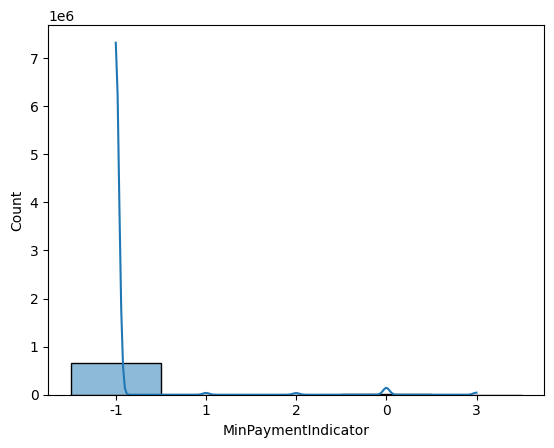

In [150]:
sns.histplot(dfhc[a], kde = True)

In [151]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   customerId               679525 non-null  object
 1   Tonikloanid              679525 non-null  object
 2   CBContract               679525 non-null  object
 3   run_date                 679525 non-null  dbdate
 4   ContractInstallmentType  679525 non-null  object
 5   MinPaymentIndicator      679525 non-null  object
dtypes: dbdate(1), object(5)
memory usage: 31.1+ MB


In [152]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[a]
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,MinPaymentIndicator,joint
0,2087422,774db6d3-636c-4c30-bf04-2b07ebf3a3ba,T03900924,2023-10-03,NotGranted,-1,NotGranted_-1
1,2224289,c665aa60-a96f-4f0e-a971-4687761bb875,E03515833,2023-10-03,NotGranted,-1,NotGranted_-1
2,1507419,4ca37553-98ab-4b80-8891-8b5d1bb55d8b,H04660879,2023-10-03,NotGranted,-1,NotGranted_-1
3,1227167,c65d50d1-66f4-4f29-a4d7-3d5c560a4a5a,304673914,2023-10-03,NotGranted,-1,NotGranted_-1
4,2079869,315cbcbd-2fb9-4722-9a06-f31233339772,O04835113,2023-10-03,NotGranted,-1,NotGranted_-1


In [153]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.head()


CBContract                                                        \
joint      Granted_-1 Granted_0 Granted_1 Granted_2 Granted_3 NotGranted_-1   
customerId                                                                    
1000001           5.0       2.0       NaN       NaN       1.0           2.0   
1000085          11.0       NaN       NaN       1.0       1.0           2.0   
1000192          10.0       2.0       NaN       NaN       NaN           3.0   
1000243          26.0       NaN       NaN       2.0       1.0           1.0   
1000278          38.0       NaN       NaN       NaN       NaN          10.0   

           Tonikloanid                                                        
joint       Granted_-1 Granted_0 Granted_1 Granted_2 Granted_3 NotGranted_-1  
customerId                                                                    
1000001            3.0       3.0       NaN       NaN       3.0           2.0  
1000085            2.0       NaN       NaN       2.0       2.0           2.0  
1000192            2.0       2.0       NaN       NaN       NaN           2.0  
1000243            1.0       NaN       NaN       1.0       1.0           1.0  
1000278            3.0       NaN       NaN       NaN       NaN           3.0

In [156]:
result_pivot.columns.value_counts()

(CBContract, Granted_-1)        1
(CBContract, Granted_0)         1
(CBContract, Granted_1)         1
(CBContract, Granted_2)         1
(CBContract, Granted_3)         1
(CBContract, NotGranted_-1)     1
(Tonikloanid, Granted_-1)       1
(Tonikloanid, Granted_0)        1
(Tonikloanid, Granted_1)        1
(Tonikloanid, Granted_2)        1
(Tonikloanid, Granted_3)        1
(Tonikloanid, NotGranted_-1)    1
dtype: int64

In [157]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',    'Granted_-1'),
            ( 'CBContract',     'Granted_0'),
            ( 'CBContract',     'Granted_1'),
            ( 'CBContract',     'Granted_2'),
            ( 'CBContract',     'Granted_3'),
            ( 'CBContract', 'NotGranted_-1'),
            ('Tonikloanid',    'Granted_-1'),
            ('Tonikloanid',     'Granted_0'),
            ('Tonikloanid',     'Granted_1'),
            ('Tonikloanid',     'Granted_2'),
            ('Tonikloanid',     'Granted_3'),
            ('Tonikloanid', 'NotGranted_-1')],
           names=[None, 'joint'])

In [158]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,MinPaymentIndicator_CBContract_Granted_-1,MinPaymentIndicator_CBContract_Granted_0,MinPaymentIndicator_CBContract_Granted_1,MinPaymentIndicator_CBContract_Granted_2,MinPaymentIndicator_CBContract_Granted_3,MinPaymentIndicator_CBContract_NotGranted_-1,MinPaymentIndicator_Tonikloanid_Granted_-1,MinPaymentIndicator_Tonikloanid_Granted_0,MinPaymentIndicator_Tonikloanid_Granted_1,MinPaymentIndicator_Tonikloanid_Granted_2,MinPaymentIndicator_Tonikloanid_Granted_3,MinPaymentIndicator_Tonikloanid_NotGranted_-1
0,1000001,5.0,2.0,NaN,NaN,1.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
1,1000085,11.0,NaN,NaN,1.0,1.0,2.0,2.0,NaN,NaN,2.0,2.0,2.0
2,1000192,10.0,2.0,NaN,NaN,NaN,3.0,2.0,2.0,NaN,NaN,NaN,2.0
3,1000243,26.0,NaN,NaN,2.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0
4,1000278,38.0,NaN,NaN,NaN,NaN,10.0,3.0,NaN,NaN,NaN,NaN,3.0


In [159]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [160]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [161]:
df.to_csv("cicdata_20240226.csv", index = False)

# ReorganizedCreditCode


In [162]:
a = 'ReorganizedCreditCode'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, '-1') {a} 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID c9d5863c-3a2b-43c8-98a6-2700fb97cc39 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [163]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,ReorganizedCreditCode
561363,1935300,ac5f0a2f-669c-4846-b4d8-f5d1cfd8bab4,D04048238,2023-03-09,NotGranted,-1
411606,1583413,3ddce8e5-8182-4a8d-a6c7-2f30a217dbb1,T01880200,2023-02-19,Granted,-1
73702,2335635,24f21306-1270-4ea0-aea1-e94fba693f14,A03378363,2023-12-16,Granted,-1
537330,1060168,09b24475-69a6-4708-9726-2269a1a658cc,203478765,2023-03-02,Granted,-1
348631,1874836,93735407-e5e1-46b6-98b5-1c52692dc2b2,004697522,2023-06-16,Granted,-1
70131,1178678,a8cbeb5c-b133-4e67-aa56-8f89cd28a437,704243843,2023-10-22,Granted,-1


In [164]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
ReorganizedCreditCode      object
dtype: object

In [165]:
# dfhc[a] = dfhc[a].astype(np.int64)

In [166]:
# dfhc.dtypes

In [167]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# # Replace 'X' with the actual column name if it's different

# # Create an imputer and fit_transform the data
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
# X_imputed = imputer.fit_transform(dfhc[[a]])

# # Convert the imputed values to a pandas Series
# X_imputed_series = pd.Series(X_imputed.flatten())
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# c = f'{a}_{a1}_{a2}'
# # Perform quantile binning using pandas qcut
# num_bins = 4
# dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_bins, labels=False, retbins=True, precision=3, duplicates='drop')

# # Assign bin edges as labels
# label_edges = np.round(bin_edges, 2)
# dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# # Convert the Category datatype to string
# dfhc[c] = dfhc[c].astype(str)

# # Display the value counts of the new column
# print(dfhc[c].value_counts())


<AxesSubplot: xlabel='ReorganizedCreditCode', ylabel='Count'>

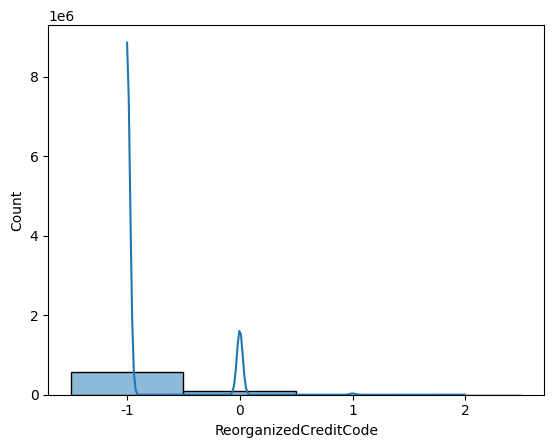

In [168]:
sns.histplot(dfhc[a], kde = True)

In [169]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   customerId               679525 non-null  object
 1   Tonikloanid              679525 non-null  object
 2   CBContract               679525 non-null  object
 3   run_date                 679525 non-null  dbdate
 4   ContractInstallmentType  679525 non-null  object
 5   ReorganizedCreditCode    679525 non-null  object
dtypes: dbdate(1), object(5)
memory usage: 31.1+ MB


In [170]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[a]
dfhc.head()

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,ReorganizedCreditCode,joint
0,1863465,5311bcc8-e4b1-41ed-a653-6180200d8e1b,606147155,2024-02-20,Granted,-1,Granted_-1
1,2405948,051d794c-bd3a-4232-9fa5-7eee31f53f4d,L04444910,2024-02-20,Granted,-1,Granted_-1
2,2406073,8c4692d1-dde5-433b-963d-8f5eaba1a1f2,H06177426,2024-02-20,NotGranted,-1,NotGranted_-1
3,2405768,6414257f-f29d-48d2-b4ab-e9244988db19,M00883452,2024-02-20,Granted,-1,Granted_-1
4,2405681,1b458a39-655e-4181-b02c-c9f75d6a45e3,000565681,2024-02-20,Granted,-1,Granted_-1


In [171]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.head()


CBContract                                             Tonikloanid  \
joint      Granted_-1 Granted_0 Granted_1 Granted_2 NotGranted_-1  Granted_-1   
customerId                                                                      
1000001           6.0       2.0       NaN       NaN           2.0         3.0   
1000085          10.0       3.0       NaN       NaN           2.0         2.0   
1000192          12.0       NaN       NaN       NaN           3.0         2.0   
1000243          26.0       3.0       NaN       NaN           1.0         1.0   
1000278          35.0       3.0       NaN       NaN          10.0         3.0   

                                                        
joint      Granted_0 Granted_1 Granted_2 NotGranted_-1  
customerId                                              
1000001          3.0       NaN       NaN           2.0  
1000085          2.0       NaN       NaN           2.0  
1000192          NaN       NaN       NaN           2.0  
1000243          1.0       NaN       NaN           1.0  
1000278          3.0       NaN       NaN           3.0

In [172]:
result_pivot.columns.value_counts()

(CBContract, Granted_-1)        1
(CBContract, Granted_0)         1
(CBContract, Granted_1)         1
(CBContract, Granted_2)         1
(CBContract, NotGranted_-1)     1
(Tonikloanid, Granted_-1)       1
(Tonikloanid, Granted_0)        1
(Tonikloanid, Granted_1)        1
(Tonikloanid, Granted_2)        1
(Tonikloanid, NotGranted_-1)    1
dtype: int64

In [173]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',    'Granted_-1'),
            ( 'CBContract',     'Granted_0'),
            ( 'CBContract',     'Granted_1'),
            ( 'CBContract',     'Granted_2'),
            ( 'CBContract', 'NotGranted_-1'),
            ('Tonikloanid',    'Granted_-1'),
            ('Tonikloanid',     'Granted_0'),
            ('Tonikloanid',     'Granted_1'),
            ('Tonikloanid',     'Granted_2'),
            ('Tonikloanid', 'NotGranted_-1')],
           names=[None, 'joint'])

In [174]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,ReorganizedCreditCode_CBContract_Granted_-1,ReorganizedCreditCode_CBContract_Granted_0,ReorganizedCreditCode_CBContract_Granted_1,ReorganizedCreditCode_CBContract_Granted_2,ReorganizedCreditCode_CBContract_NotGranted_-1,ReorganizedCreditCode_Tonikloanid_Granted_-1,ReorganizedCreditCode_Tonikloanid_Granted_0,ReorganizedCreditCode_Tonikloanid_Granted_1,ReorganizedCreditCode_Tonikloanid_Granted_2,ReorganizedCreditCode_Tonikloanid_NotGranted_-1
0,1000001,6.0,2.0,NaN,NaN,2.0,3.0,3.0,NaN,NaN,2.0
1,1000085,10.0,3.0,NaN,NaN,2.0,2.0,2.0,NaN,NaN,2.0
2,1000192,12.0,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,2.0
3,1000243,26.0,3.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0
4,1000278,35.0,3.0,NaN,NaN,10.0,3.0,3.0,NaN,NaN,3.0


In [175]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [176]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [177]:
df.to_csv("cicdata_20240226.csv", index = False)

# PaymentPeriodicity

In [179]:
a = 'PaymentPeriodicity'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, 'NA') {a} 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID 9472be22-7381-4ada-8b4f-1ef8aad01515 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [180]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,PaymentPeriodicity
232010,2194521,659d1a4f-bf79-416b-8a5f-9e02b7cb2a6c,J02090746,2023-08-17,Granted,M
630694,2021049,42d315d4-9855-4cd2-ba6d-7ed52e70a6fa,904279689,2023-08-18,Granted,M
59018,1716415,13bf4b62-3697-49dc-b05e-c231b6a1a7e6,104242732,2023-05-04,Granted,M
269530,2325154,cfc841fd-3c97-4a27-b915-1a7c2bfee434,702798100,2023-12-06,Granted,W
462785,2031742,f5c0dec0-c59a-4936-a47f-5e9f52a4e9c5,O05114531,2024-02-12,Granted,M
211742,1833664,861324af-2bc2-4648-a839-c464d030a12a,604480666,2023-11-27,NotGranted,M


In [181]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
PaymentPeriodicity         object
dtype: object

In [182]:
# dfhc[a] = dfhc[a].astype(np.int64)

In [183]:
# dfhc.dtypes

In [184]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# # Replace 'X' with the actual column name if it's different

# # Create an imputer and fit_transform the data
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
# X_imputed = imputer.fit_transform(dfhc[[a]])

# # Convert the imputed values to a pandas Series
# X_imputed_series = pd.Series(X_imputed.flatten())
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# c = f'{a}_{a1}_{a2}'
# # Perform quantile binning using pandas qcut
# num_bins = 4
# dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_bins, labels=False, retbins=True, precision=3, duplicates='drop')

# # Assign bin edges as labels
# label_edges = np.round(bin_edges, 2)
# dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# # Convert the Category datatype to string
# dfhc[c] = dfhc[c].astype(str)

# # Display the value counts of the new column
# print(dfhc[c].value_counts())


<AxesSubplot: xlabel='PaymentPeriodicity', ylabel='Count'>

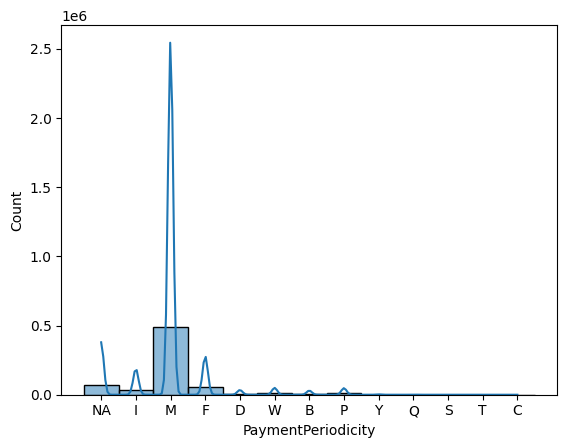

In [185]:
sns.histplot(dfhc[a], kde = True)

In [186]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   customerId               679525 non-null  object
 1   Tonikloanid              679525 non-null  object
 2   CBContract               679525 non-null  object
 3   run_date                 679525 non-null  dbdate
 4   ContractInstallmentType  679525 non-null  object
 5   PaymentPeriodicity       679525 non-null  object
dtypes: dbdate(1), object(5)
memory usage: 31.1+ MB


In [187]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[a]
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,PaymentPeriodicity,joint
0,1891480,70517a88-d4b5-4024-98a0-6ae3e468e431,L04577335,2023-02-08,NotGranted,NA,NotGranted_NA
1,1599718,e0a5d3b1-9f52-4b04-a9ac-31621366dfe7,103491514,2023-02-08,NotGranted,I,NotGranted_I
2,1627622,6a748847-bb51-44c9-b43b-73f205ddbfb1,F03173309,2023-02-08,Granted,I,Granted_I
3,1891076,07184c90-167f-4ec8-953d-57af3c9ccea4,O03901694,2023-02-08,Granted,I,Granted_I
4,1239481,fd590a31-69ae-43d8-8e13-9179e4bdc13e,P00326897,2023-02-08,Granted,M,Granted_M


In [188]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


CBContract                                                    \
joint       Granted_B Granted_C Granted_D Granted_F Granted_I Granted_M   
customerId                                                                
1000001           NaN       NaN       NaN       NaN       NaN       8.0   
1000085           NaN       NaN       NaN       NaN       NaN      13.0   
1000192           NaN       NaN       NaN       2.0       NaN       8.0   
1000243           NaN       NaN       NaN       1.0       NaN      27.0   
1000278           NaN       NaN       NaN       2.0      13.0      20.0   

                                                                         \
joint      Granted_NA Granted_P Granted_Q Granted_S Granted_T Granted_W   
customerId                                                                
1000001           NaN       NaN       NaN       NaN       NaN       NaN   
1000085           NaN       NaN       NaN       NaN       NaN       NaN   
1000192           1.0       1.0       NaN       NaN       NaN       NaN   
1000243           1.0       NaN       NaN       NaN       NaN       NaN   
1000278           2.0       1.0       NaN       NaN       NaN       NaN   

                                                                          \
joint      Granted_Y NotGranted_B NotGranted_D NotGranted_F NotGranted_I   
customerId                                                                 
1000001          NaN          NaN          NaN          NaN          NaN   
1000085          NaN          NaN          NaN          NaN          NaN   
1000192          NaN          NaN          NaN          NaN          NaN   
1000243          NaN          NaN          NaN          NaN          NaN   
1000278          NaN          1.0          NaN          NaN          2.0   

                                                                              \
joint      NotGranted_M NotGranted_NA NotGranted_P NotGranted_S NotGranted_W   
customerId                                                                     
1000001             2.0           NaN          NaN          NaN          NaN   
1000085             1.0           1.0          NaN          NaN          NaN   
1000192             2.0           1.0          NaN          NaN          NaN   
1000243             NaN           1.0          NaN          NaN          NaN   
1000278             5.0           2.0          NaN          NaN          NaN   

                        Tonikloanid                                          \
joint      NotGranted_Y   Granted_B Granted_C Granted_D Granted_F Granted_I   
customerId                                                                    
1000001             NaN         NaN       NaN       NaN       NaN       NaN   
1000085             NaN         NaN       NaN       NaN       NaN       NaN   
1000192             NaN         NaN       NaN       NaN       1.0       NaN   
1000243             NaN         NaN       NaN       NaN       1.0       NaN   
1000278             NaN         NaN       NaN       NaN       3.0       3.0   

                                                                         \
joint      Granted_M Granted_NA Granted_P Granted_Q Granted_S Granted_T   
customerId                                                                
1000001          3.0        NaN       NaN       NaN       NaN       NaN   
1000085          2.0        NaN       NaN       NaN       NaN       NaN   
1000192          2.0        2.0       2.0       NaN       NaN       NaN   
1000243          1.0        1.0       NaN       NaN       NaN       NaN   
1000278          3.0        3.0       3.0       NaN       NaN       NaN   

                                                                       \
joint      Granted_W Granted_Y NotGranted_B NotGranted_D NotGranted_F   
customerId                                                              
1000001          NaN       NaN          NaN          NaN          NaN   
1000085          NaN       NaN   

In [189]:
result_pivot.columns.value_counts()

(CBContract, Granted_B)         1
(Tonikloanid, Granted_W)        1
(Tonikloanid, Granted_D)        1
(Tonikloanid, Granted_F)        1
(Tonikloanid, Granted_I)        1
(Tonikloanid, Granted_M)        1
(Tonikloanid, Granted_NA)       1
(Tonikloanid, Granted_P)        1
(Tonikloanid, Granted_Q)        1
(Tonikloanid, Granted_S)        1
(Tonikloanid, Granted_T)        1
(Tonikloanid, Granted_Y)        1
(CBContract, Granted_C)         1
(Tonikloanid, NotGranted_B)     1
(Tonikloanid, NotGranted_D)     1
(Tonikloanid, NotGranted_F)     1
(Tonikloanid, NotGranted_I)     1
(Tonikloanid, NotGranted_M)     1
(Tonikloanid, NotGranted_NA)    1
(Tonikloanid, NotGranted_P)     1
(Tonikloanid, NotGranted_S)     1
(Tonikloanid, NotGranted_W)     1
(Tonikloanid, Granted_C)        1
(Tonikloanid, Granted_B)        1
(CBContract, NotGranted_Y)      1
(CBContract, NotGranted_W)      1
(CBContract, Granted_D)         1
(CBContract, Granted_F)         1
(CBContract, Granted_I)         1
(CBContract, G

In [190]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',     'Granted_B'),
            ( 'CBContract',     'Granted_C'),
            ( 'CBContract',     'Granted_D'),
            ( 'CBContract',     'Granted_F'),
            ( 'CBContract',     'Granted_I'),
            ( 'CBContract',     'Granted_M'),
            ( 'CBContract',    'Granted_NA'),
            ( 'CBContract',     'Granted_P'),
            ( 'CBContract',     'Granted_Q'),
            ( 'CBContract',     'Granted_S'),
            ( 'CBContract',     'Granted_T'),
            ( 'CBContract',     'Granted_W'),
            ( 'CBContract',     'Granted_Y'),
            ( 'CBContract',  'NotGranted_B'),
            ( 'CBContract',  'NotGranted_D'),
            ( 'CBContract',  'NotGranted_F'),
            ( 'CBContract',  'NotGranted_I'),
            ( 'CBContract',  'NotGranted_M'),
            ( 'CBContract', 'NotGranted_NA'),
            ( 'CBContract',  'NotGranted_P'),
            ( 'CBContract',  'NotGranted_S'),
            ( 'CBContract',  'NotG

In [191]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,PaymentPeriodicity_CBContract_Granted_B,PaymentPeriodicity_CBContract_Granted_C,PaymentPeriodicity_CBContract_Granted_D,PaymentPeriodicity_CBContract_Granted_F,PaymentPeriodicity_CBContract_Granted_I,PaymentPeriodicity_CBContract_Granted_M,PaymentPeriodicity_CBContract_Granted_NA,PaymentPeriodicity_CBContract_Granted_P,PaymentPeriodicity_CBContract_Granted_Q,PaymentPeriodicity_CBContract_Granted_S,PaymentPeriodicity_CBContract_Granted_T,PaymentPeriodicity_CBContract_Granted_W,PaymentPeriodicity_CBContract_Granted_Y,PaymentPeriodicity_CBContract_NotGranted_B,PaymentPeriodicity_CBContract_NotGranted_D,PaymentPeriodicity_CBContract_NotGranted_F,PaymentPeriodicity_CBContract_NotGranted_I,PaymentPeriodicity_CBContract_NotGranted_M,PaymentPeriodicity_CBContract_NotGranted_NA,PaymentPeriodicity_CBContract_NotGranted_P,PaymentPeriodicity_CBContract_NotGranted_S,PaymentPeriodicity_CBContract_NotGranted_W,PaymentPeriodicity_CBContract_NotGranted_Y,PaymentPeriodicity_Tonikloanid_Granted_B,PaymentPeriodicity_Tonikloanid_Granted_C,PaymentPeriodicity_Tonikloanid_Granted_D,PaymentPeriodicity_Tonikloanid_Granted_F,PaymentPeriodicity_Tonikloanid_Granted_I,PaymentPeriodicity_Tonikloanid_Granted_M,PaymentPeriodicity_Tonikloanid_Granted_NA,PaymentPeriodicity_Tonikloanid_Granted_P,PaymentPeriodicity_Tonikloanid_Granted_Q,PaymentPeriodicity_Tonikloanid_Granted_S,PaymentPeriodicity_Tonikloanid_Granted_T,PaymentPeriodicity_Tonikloanid_Granted_W,PaymentPeriodicity_Tonikloanid_Granted_Y,PaymentPeriodicity_Tonikloanid_NotGranted_B,PaymentPeriodicity_Tonikloanid_NotGranted_D,PaymentPeriodicity_Tonikloanid_NotGranted_F,PaymentPeriodicity_Tonikloanid_NotGranted_I,PaymentPeriodicity_Tonikloanid_NotGranted_M,PaymentPeriodicity_Tonikloanid_NotGranted_NA,PaymentPeriodicity_Tonikloanid_NotGranted_P,PaymentPeriodicity_Tonikloanid_NotGranted_S,PaymentPeriodicity_Tonikloanid_NotGranted_W,PaymentPeriodicity_Tonikloanid_NotGranted_Y
0,1000001,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1,1000085,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN
2,1000192,NaN,NaN,NaN,2.0,NaN,8.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN
3,1000243,NaN,NaN,NaN,1.0,NaN,27.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,1000278,NaN,NaN,NaN,2.0,13.0,20.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,3.0,3.0,NaN,NaN,NaN,NaN


In [192]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [193]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [194]:
df.to_csv("cicdata_20240226.csv", index = False)

In [197]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 325)
The size of df is:	31881525
the number of dimensions of df is:	2


# CreditPurpose

In [198]:
a = 'CreditPurpose'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, 'NA') {a} 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID 04e51df3-137f-4e22-917e-cc39bac9876f successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [199]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,CreditPurpose
463654,2327005,8450d585-6818-4089-86e4-a87f5c6ea799,003157843,2023-12-08,Granted,18
110551,2389059,f6ed0c89-50c3-4e39-8b60-1b331370ea63,T05019448,2024-02-04,Granted,31
286766,1126339,ffaae606-c16f-4017-bedb-e8b77084d9e6,H04095486,2023-01-18,Granted,NA
220376,2074589,41bccfc1-64f2-4ae5-aaa0-4b4438daced4,Q03471458,2023-06-02,Granted,NA
592211,1889489,946171d1-1d5e-4837-a4c1-6f3a996fcd03,100793628,2023-02-09,Granted,NA
518649,1811602,5d14a489-3391-41bb-ba7f-93705aecf40a,E04558820,2023-05-19,NotGranted,NA


In [200]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
CreditPurpose              object
dtype: object

In [201]:
# dfhc[a] = dfhc[a].astype(np.int64)

In [202]:
# dfhc.dtypes

In [203]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# # Replace 'X' with the actual column name if it's different

# # Create an imputer and fit_transform the data
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
# X_imputed = imputer.fit_transform(dfhc[[a]])

# # Convert the imputed values to a pandas Series
# X_imputed_series = pd.Series(X_imputed.flatten())
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# c = f'{a}_{a1}_{a2}'
# # Perform quantile binning using pandas qcut
# num_bins = 4
# dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_bins, labels=False, retbins=True, precision=3, duplicates='drop')

# # Assign bin edges as labels
# label_edges = np.round(bin_edges, 2)
# dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# # Convert the Category datatype to string
# dfhc[c] = dfhc[c].astype(str)

# # Display the value counts of the new column
# print(dfhc[c].value_counts())


<AxesSubplot: xlabel='CreditPurpose', ylabel='Count'>

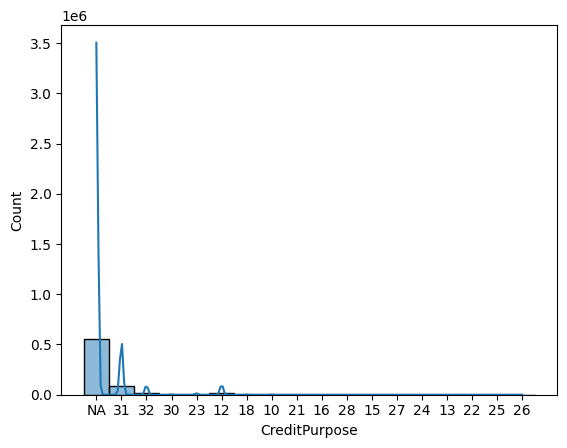

In [204]:
sns.histplot(dfhc[a], kde = True)

In [205]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   customerId               679525 non-null  object
 1   Tonikloanid              679525 non-null  object
 2   CBContract               679525 non-null  object
 3   run_date                 679525 non-null  dbdate
 4   ContractInstallmentType  679525 non-null  object
 5   CreditPurpose            679525 non-null  object
dtypes: dbdate(1), object(5)
memory usage: 31.1+ MB


In [206]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[a]
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,CreditPurpose,joint
120421,2202761,f86fd05a-6431-4147-af8c-72bcf02439d5,T02974961,2023-08-22,NotGranted,NA,NotGranted_NA
77193,1947285,68e8fbcb-fae9-4b7b-a279-1a6ac01a7bad,M04601492,2023-05-13,Granted,31,Granted_31
623505,2055270,6d0a61bb-0121-47c5-bd6a-9ffbdde898ca,E03462268,2023-05-21,Granted,31,Granted_31
418253,2296628,1fa0c04b-744b-4397-84ae-8995f03c6be8,B04552233,2023-11-07,Granted,31,Granted_31
376371,2351543,cbf7e389-00b0-41ba-9155-569de98bfc96,R03423910,2023-12-28,Granted,NA,Granted_NA
272131,2063821,7aff5218-09a1-4fbd-a93a-af0387b0a1b1,I03794944,2023-05-29,Granted,NA,Granted_NA


In [207]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


CBContract                                                         \
joint      Granted_10 Granted_12 Granted_13 Granted_15 Granted_16 Granted_18   
customerId                                                                     
1569361           NaN        NaN        NaN        NaN        NaN        NaN   
2309581           NaN        NaN        NaN        NaN        NaN        NaN   
2297611           NaN        NaN        NaN        NaN        NaN        NaN   
2197006           NaN        NaN        NaN        NaN        NaN        NaN   
2263152           NaN        NaN        NaN        NaN        NaN        NaN   

                                                                              \
joint      Granted_21 Granted_22 Granted_23 Granted_24 Granted_25 Granted_26   
customerId                                                                     
1569361           NaN        NaN        NaN        NaN        NaN        NaN   
2309581           NaN        NaN        NaN        NaN        NaN        NaN   
2297611           NaN        NaN        NaN        NaN        NaN        NaN   
2197006           NaN        NaN        NaN        NaN        NaN        NaN   
2263152           NaN        NaN        NaN        NaN        NaN        NaN   

                                                                              \
joint      Granted_27 Granted_28 Granted_30 Granted_31 Granted_32 Granted_NA   
customerId                                                                     
1569361           NaN        NaN        NaN        NaN        NaN        1.0   
2309581           NaN        NaN        NaN        NaN        NaN        1.0   
2297611           NaN        NaN        NaN        NaN        NaN        NaN   
2197006           NaN        NaN        NaN        NaN        NaN       10.0   
2263152           NaN        NaN        NaN        NaN        NaN        NaN   

                         Tonikloanid                                   \
joint      NotGranted_NA  Granted_10 Granted_12 Granted_13 Granted_15   
customerId                                                              
1569361              1.0         NaN        NaN        NaN        NaN   
2309581              NaN         NaN        NaN        NaN        NaN   
2297611              1.0         NaN        NaN        NaN        NaN   
2197006              NaN         NaN        NaN        NaN        NaN   
2263152              1.0         NaN        NaN        NaN        NaN   

                                                                              \
joint      Granted_16 Granted_18 Granted_21 Granted_22 Granted_23 Granted_24   
customerId                                                                     
1569361           NaN        NaN        NaN        NaN        NaN        NaN   
2309581           NaN        NaN        NaN        NaN        NaN        NaN   
2297611           NaN        NaN        NaN        NaN        NaN        NaN   
2197006           NaN        NaN        NaN        NaN        NaN        NaN   
2263152           NaN        NaN        NaN        NaN        NaN        NaN   

                                                                              \
joint      Granted_25 Granted_26 Granted_27 Granted_28 Granted_30 Granted_31   
customerId                                                                     
1569361           NaN        NaN        NaN        NaN        NaN        NaN   
2309581           NaN        NaN        NaN        NaN        NaN        NaN   
2297611           NaN        NaN        NaN        NaN        NaN        NaN   
2197006           NaN        NaN        NaN        NaN        NaN        NaN   
2263152           NaN        NaN        NaN        NaN        NaN        NaN   

                                                
joint      Granted_32 Granted_NA NotGranted_NA  
customerId                                      
1569361           NaN        1.0           1.0  
2309581           NaN    

In [208]:
result_pivot.columns.value_counts()

(CBContract, Granted_10)        1
(Tonikloanid, Granted_24)       1
(Tonikloanid, Granted_13)       1
(Tonikloanid, Granted_15)       1
(Tonikloanid, Granted_16)       1
(Tonikloanid, Granted_18)       1
(Tonikloanid, Granted_21)       1
(Tonikloanid, Granted_22)       1
(Tonikloanid, Granted_23)       1
(Tonikloanid, Granted_25)       1
(CBContract, Granted_12)        1
(Tonikloanid, Granted_26)       1
(Tonikloanid, Granted_27)       1
(Tonikloanid, Granted_28)       1
(Tonikloanid, Granted_30)       1
(Tonikloanid, Granted_31)       1
(Tonikloanid, Granted_32)       1
(Tonikloanid, Granted_NA)       1
(Tonikloanid, Granted_12)       1
(Tonikloanid, Granted_10)       1
(CBContract, NotGranted_NA)     1
(CBContract, Granted_NA)        1
(CBContract, Granted_13)        1
(CBContract, Granted_15)        1
(CBContract, Granted_16)        1
(CBContract, Granted_18)        1
(CBContract, Granted_21)        1
(CBContract, Granted_22)        1
(CBContract, Granted_23)        1
(CBContract, G

In [209]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',    'Granted_10'),
            ( 'CBContract',    'Granted_12'),
            ( 'CBContract',    'Granted_13'),
            ( 'CBContract',    'Granted_15'),
            ( 'CBContract',    'Granted_16'),
            ( 'CBContract',    'Granted_18'),
            ( 'CBContract',    'Granted_21'),
            ( 'CBContract',    'Granted_22'),
            ( 'CBContract',    'Granted_23'),
            ( 'CBContract',    'Granted_24'),
            ( 'CBContract',    'Granted_25'),
            ( 'CBContract',    'Granted_26'),
            ( 'CBContract',    'Granted_27'),
            ( 'CBContract',    'Granted_28'),
            ( 'CBContract',    'Granted_30'),
            ( 'CBContract',    'Granted_31'),
            ( 'CBContract',    'Granted_32'),
            ( 'CBContract',    'Granted_NA'),
            ( 'CBContract', 'NotGranted_NA'),
            ('Tonikloanid',    'Granted_10'),
            ('Tonikloanid',    'Granted_12'),
            ('Tonikloanid',    'Gr

In [210]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,CreditPurpose_CBContract_Granted_10,CreditPurpose_CBContract_Granted_12,CreditPurpose_CBContract_Granted_13,CreditPurpose_CBContract_Granted_15,CreditPurpose_CBContract_Granted_16,CreditPurpose_CBContract_Granted_18,CreditPurpose_CBContract_Granted_21,CreditPurpose_CBContract_Granted_22,CreditPurpose_CBContract_Granted_23,CreditPurpose_CBContract_Granted_24,CreditPurpose_CBContract_Granted_25,CreditPurpose_CBContract_Granted_26,CreditPurpose_CBContract_Granted_27,CreditPurpose_CBContract_Granted_28,CreditPurpose_CBContract_Granted_30,CreditPurpose_CBContract_Granted_31,CreditPurpose_CBContract_Granted_32,CreditPurpose_CBContract_Granted_NA,CreditPurpose_CBContract_NotGranted_NA,CreditPurpose_Tonikloanid_Granted_10,CreditPurpose_Tonikloanid_Granted_12,CreditPurpose_Tonikloanid_Granted_13,CreditPurpose_Tonikloanid_Granted_15,CreditPurpose_Tonikloanid_Granted_16,CreditPurpose_Tonikloanid_Granted_18,CreditPurpose_Tonikloanid_Granted_21,CreditPurpose_Tonikloanid_Granted_22,CreditPurpose_Tonikloanid_Granted_23,CreditPurpose_Tonikloanid_Granted_24,CreditPurpose_Tonikloanid_Granted_25,CreditPurpose_Tonikloanid_Granted_26,CreditPurpose_Tonikloanid_Granted_27,CreditPurpose_Tonikloanid_Granted_28,CreditPurpose_Tonikloanid_Granted_30,CreditPurpose_Tonikloanid_Granted_31,CreditPurpose_Tonikloanid_Granted_32,CreditPurpose_Tonikloanid_Granted_NA,CreditPurpose_Tonikloanid_NotGranted_NA
0,1000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0
1,1000085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
2,1000192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0
3,1000243,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
4,1000278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,36.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,3.0,3.0


In [211]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [212]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [213]:
df.to_csv("cicdata_20240226.csv", index = False)

In [214]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 363)
The size of df is:	35609211
the number of dimensions of df is:	2


# PaymentMethod

In [215]:
a = 'PaymentMethod'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, 'NA') {a} 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID cf03b92b-a7ff-4eb9-b72c-4901e0812c1c successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [216]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,PaymentMethod
305855,2064618,600b1e3a-1bd5-4c90-a7e4-c6aad6282e5c,904669094,2023-05-28,Granted,NA
342837,1936779,18888c44-b790-4b3d-a52c-df41eda815a2,404642033,2023-03-10,NotGranted,NA
45380,2294603,524ebe2b-4397-43b5-810c-df175fb1839f,B02803151,2023-11-05,Granted,NA
275175,2273807,d461e1ac-097c-411b-b6c2-d75bf32a67d8,003254874,2023-10-15,Granted,CAS
11286,2051363,7f919836-3d83-4569-9abd-925ec93ed2d1,N03907033,2023-05-19,Granted,OTH
190973,2097017,6350e792-b9b7-4c7c-b5ef-2e24152d6f8a,C03167067,2023-06-17,Granted,NA


In [217]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
PaymentMethod              object
dtype: object

In [218]:
# dfhc[a] = dfhc[a].astype(np.int64)

In [219]:
# dfhc.dtypes

In [220]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# # Replace 'X' with the actual column name if it's different

# # Create an imputer and fit_transform the data
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
# X_imputed = imputer.fit_transform(dfhc[[a]])

# # Convert the imputed values to a pandas Series
# X_imputed_series = pd.Series(X_imputed.flatten())
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# c = f'{a}_{a1}_{a2}'
# # Perform quantile binning using pandas qcut
# num_bins = 4
# dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_bins, labels=False, retbins=True, precision=3, duplicates='drop')

# # Assign bin edges as labels
# label_edges = np.round(bin_edges, 2)
# dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# # Convert the Category datatype to string
# dfhc[c] = dfhc[c].astype(str)

# # Display the value counts of the new column
# print(dfhc[c].value_counts())


<AxesSubplot: xlabel='PaymentMethod', ylabel='Count'>

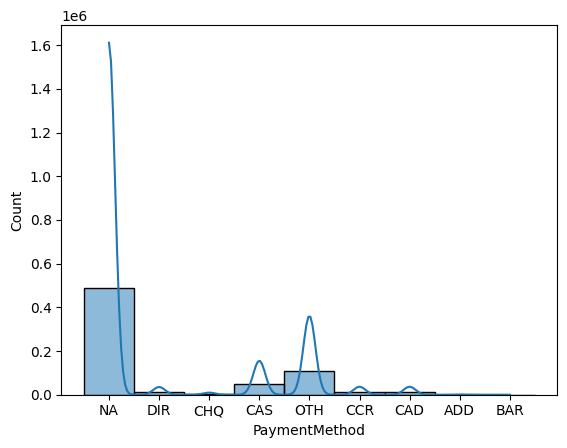

In [221]:
sns.histplot(dfhc[a], kde = True)

In [222]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   customerId               679525 non-null  object
 1   Tonikloanid              679525 non-null  object
 2   CBContract               679525 non-null  object
 3   run_date                 679525 non-null  dbdate
 4   ContractInstallmentType  679525 non-null  object
 5   PaymentMethod            679525 non-null  object
dtypes: dbdate(1), object(5)
memory usage: 31.1+ MB


In [223]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[a]
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,PaymentMethod,joint
391126,2147913,3de31b7d-6a7f-4b41-9f2b-d9719b17618c,C04062210,2023-07-21,Granted,NA,Granted_NA
68441,2076773,f0da0c5c-5ead-4db3-b1ce-66184817123b,D01202169,2023-06-04,Granted,NA,Granted_NA
107192,2389695,7c129ce6-86dc-40ca-a631-73a77259c867,N01031514,2024-02-04,Granted,NA,Granted_NA
423518,1891639,154a1dc9-f95c-4ac8-ac9a-664b3951e9af,E03892668,2023-02-22,Granted,NA,Granted_NA
521990,1907346,a0d98e82-c657-462c-9f0e-34b3f4c35945,B03264087,2023-02-19,Granted,NA,Granted_NA
398679,2088292,cf8d0b8b-2833-4efe-91e0-4333cb1b67af,P01232522,2023-06-11,Granted,NA,Granted_NA


In [224]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


CBContract                                                  \
joint      Granted_ADD Granted_BAR Granted_CAD Granted_CAS Granted_CCR   
customerId                                                               
1995956            NaN         NaN         NaN         NaN         NaN   
2310005            NaN         NaN         NaN         1.0         NaN   
2406241            NaN         NaN         NaN         1.0         1.0   
1252090            NaN         NaN         NaN         NaN         NaN   
1918460            NaN         NaN         NaN         NaN         NaN   

                                                                         \
joint      Granted_CHQ Granted_DIR Granted_NA Granted_OTH NotGranted_NA   
customerId                                                                
1995956            NaN         NaN        3.0         7.0           3.0   
2310005            NaN         NaN        NaN         NaN           NaN   
2406241            NaN         NaN        4.0         NaN           NaN   
1252090            NaN         NaN        1.0         NaN           NaN   
1918460            NaN         NaN        2.0         NaN           NaN   

           Tonikloanid                                                  \
joint      Granted_ADD Granted_BAR Granted_CAD Granted_CAS Granted_CCR   
customerId                                                               
1995956            NaN         NaN         NaN         NaN         NaN   
2310005            NaN         NaN         NaN         1.0         NaN   
2406241            NaN         NaN         NaN         1.0         1.0   
1252090            NaN         NaN         NaN         NaN         NaN   
1918460            NaN         NaN         NaN         NaN         NaN   

                                                                         
joint      Granted_CHQ Granted_DIR Granted_NA Granted_OTH NotGranted_NA  
customerId                                                               
1995956            NaN         NaN        1.0         1.0           1.0  
2310005            NaN         NaN        NaN         NaN           NaN  
2406241            NaN         NaN        1.0         NaN           NaN  
1252090            NaN         NaN        1.0         NaN           NaN  
1918460            NaN         NaN        1.0         NaN           NaN

In [225]:
result_pivot.columns.value_counts()

(CBContract, Granted_ADD)       1
(CBContract, Granted_BAR)       1
(Tonikloanid, Granted_OTH)      1
(Tonikloanid, Granted_NA)       1
(Tonikloanid, Granted_DIR)      1
(Tonikloanid, Granted_CHQ)      1
(Tonikloanid, Granted_CCR)      1
(Tonikloanid, Granted_CAS)      1
(Tonikloanid, Granted_CAD)      1
(Tonikloanid, Granted_BAR)      1
(Tonikloanid, Granted_ADD)      1
(CBContract, NotGranted_NA)     1
(CBContract, Granted_OTH)       1
(CBContract, Granted_NA)        1
(CBContract, Granted_DIR)       1
(CBContract, Granted_CHQ)       1
(CBContract, Granted_CCR)       1
(CBContract, Granted_CAS)       1
(CBContract, Granted_CAD)       1
(Tonikloanid, NotGranted_NA)    1
dtype: int64

In [226]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',   'Granted_ADD'),
            ( 'CBContract',   'Granted_BAR'),
            ( 'CBContract',   'Granted_CAD'),
            ( 'CBContract',   'Granted_CAS'),
            ( 'CBContract',   'Granted_CCR'),
            ( 'CBContract',   'Granted_CHQ'),
            ( 'CBContract',   'Granted_DIR'),
            ( 'CBContract',    'Granted_NA'),
            ( 'CBContract',   'Granted_OTH'),
            ( 'CBContract', 'NotGranted_NA'),
            ('Tonikloanid',   'Granted_ADD'),
            ('Tonikloanid',   'Granted_BAR'),
            ('Tonikloanid',   'Granted_CAD'),
            ('Tonikloanid',   'Granted_CAS'),
            ('Tonikloanid',   'Granted_CCR'),
            ('Tonikloanid',   'Granted_CHQ'),
            ('Tonikloanid',   'Granted_DIR'),
            ('Tonikloanid',    'Granted_NA'),
            ('Tonikloanid',   'Granted_OTH'),
            ('Tonikloanid', 'NotGranted_NA')],
           names=[None, 'joint'])

In [227]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,PaymentMethod_CBContract_Granted_ADD,PaymentMethod_CBContract_Granted_BAR,PaymentMethod_CBContract_Granted_CAD,PaymentMethod_CBContract_Granted_CAS,PaymentMethod_CBContract_Granted_CCR,PaymentMethod_CBContract_Granted_CHQ,PaymentMethod_CBContract_Granted_DIR,PaymentMethod_CBContract_Granted_NA,PaymentMethod_CBContract_Granted_OTH,PaymentMethod_CBContract_NotGranted_NA,PaymentMethod_Tonikloanid_Granted_ADD,PaymentMethod_Tonikloanid_Granted_BAR,PaymentMethod_Tonikloanid_Granted_CAD,PaymentMethod_Tonikloanid_Granted_CAS,PaymentMethod_Tonikloanid_Granted_CCR,PaymentMethod_Tonikloanid_Granted_CHQ,PaymentMethod_Tonikloanid_Granted_DIR,PaymentMethod_Tonikloanid_Granted_NA,PaymentMethod_Tonikloanid_Granted_OTH,PaymentMethod_Tonikloanid_NotGranted_NA
0,1000001,NaN,NaN,NaN,3.0,2.0,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,3.0,3.0,NaN,NaN,3.0,NaN,2.0
1,1000085,NaN,NaN,NaN,1.0,1.0,NaN,NaN,10.0,1.0,2.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0,2.0,2.0
2,1000192,NaN,NaN,2.0,2.0,NaN,NaN,NaN,8.0,NaN,3.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2.0,NaN,2.0
3,1000243,NaN,NaN,NaN,3.0,1.0,NaN,NaN,21.0,4.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,1.0
4,1000278,NaN,NaN,NaN,NaN,NaN,1.0,NaN,35.0,2.0,10.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,3.0,3.0


In [228]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [229]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [230]:
df.to_csv("cicdata_20240226.csv", index = False)

In [231]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 383)
The size of df is:	37571151
the number of dimensions of df is:	2


# TimesCardUsed

In [257]:
a = 'TimesCardUsed'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, '-1') {a} 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID 3d1b66d7-923c-4de2-bc3a-47d71f8dbb31 successfully executed: 100%|██████████|
Downloading:   0%|          |
Downloading: 100%|██████████|


(679525, 6)

In [258]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,TimesCardUsed
114537,1637885,5d2375dd-b0a3-4944-bef6-6aa4ed57ee9a,R04397130,2023-04-13,Granted,-1
222438,2100501,1c53bd4f-0724-4440-bb4d-14813bfe2f93,503528303,2023-06-20,Granted,-1
632346,1590611,bc84e781-aed8-43bb-9577-0de544d31821,L02809173,2023-04-23,Granted,-1
631276,1866167,7148d10f-27be-430e-9338-9c2ab34a7902,F03924536,2023-01-18,Granted,-1
368162,2292072,32da6b0b-a365-45d2-bef6-af4a448b51bd,K04859064,2023-11-03,Granted,-1
356584,1209536,9e2ffb2f-01ec-4d51-a96a-a6872b14b17f,H04261428,2023-05-15,Granted,-1


In [259]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
TimesCardUsed              object
dtype: object

In [260]:
dfhc[a].describe()

count     679525
unique        69
top           -1
freq      645998
Name: TimesCardUsed, dtype: object

In [261]:
dfhc[a] = dfhc[a].astype(np.int64)

In [262]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
TimesCardUsed               int64
dtype: object

In [263]:
# def create_bins(df, column_name, bin_edges, bin_labels):
#     # Create a new column based on the specified bins and labels
#     new_column_name = f'{column_name}_bin'
#     df[new_column_name] = pd.cut(df[column_name], bins=bin_edges, labels=bin_labels, right=False)
#     return df

# # Assuming your dataframe is named 'df'

# # Define bin edges and labels for 'ContractStatus_CV'
# bins_contract_status_cv = [-float('inf'), 0, 25, 55, 75, float('inf')]
# labels_contract_status_cv = ['-1', '0', '1-25', '25-55', '55']


In [266]:
dfhc[a].unique()

array([-1,  1,  0, 13,  6, 16,  2,  4,  3,  5, 14, 20,  7, 57, 10, 31,  9,
       44, 12, 11, 27,  8, 33, 22, 26, 17, 37, 36, 42, 21, 25, 18, 15, 32,
       39, 28, 77, 19, 23, 24, 47, 85, 29, 43, 34, 40, 30, 51, 49, 52, 38,
       83, 35, 46, 45, 60, 50, 56, 75, 82, 41, 81, 64, 78, 55, 58, 61, 59,
       99], dtype=int64)

In [277]:
import pandas as pd

# Create 5 bins with labels
num_bins = 5
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
# Perform binning using pandas cut
dfhc[b] = pd.cut(dfhc[a], bins=num_bins, labels=bin_labels, precision=3, duplicates='drop')


In [278]:
dfhc.sample(10)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,TimesCardUsed,TimesCardUsed_bin
624242,1065335,59d825e3-271e-47d4-9b44-d9c50bf23faa,904697071,2023-06-08,Granted,-1,Very Low
331256,2029133,79e4c125-d2c6-43cd-ab6b-bbb3673f2948,N02460290,2023-12-23,Granted,-1,Very Low
575448,2050256,5ac74e14-d0a7-4b20-84a7-3ca54bd0dbe0,704242523,2023-05-18,Granted,-1,Very Low
7756,1399843,1d8c7e73-b3d3-4f9a-ac0a-bfc2ef6baaa4,O00730021,2023-04-15,Granted,-1,Very Low
669668,2298908,3ff3aa09-ce29-4d0f-8f7c-5d07f653e11c,204653601,2023-11-09,NotGranted,-1,Very Low
189728,2105877,ade401d4-cdb4-4e66-b463-fe407d359591,E04139724,2023-06-24,Granted,-1,Very Low
295650,2100460,6124e2a7-f2aa-4871-8c21-83e516840984,004811285,2023-06-20,NotGranted,-1,Very Low
263497,2345953,5a2a7ebe-447a-422e-820c-9150c6b0de3a,900795426,2023-12-24,Granted,-1,Very Low
221096,2227700,056a8373-7788-42b3-9e35-4cb646eea544,704433465,2023-12-11,Granted,-1,Very Low
24303,1573779,9c2f1275-185f-4b34-b012-691033472802,404701138,2023-06-03,Granted,-1,Very Low


In [279]:
dfhc[b].value_counts()

Very Low     679083
Low             378
Medium           51
Very High         7
High              6
Name: TimesCardUsed_bin, dtype: int64

In [280]:
min_scores = dfhc.groupby(b)[a].transform('min')
max_scores = dfhc.groupby(b)[a].transform('max')
# Create a new column combining ScoreRange, min(ScoreRaw), and max(ScoreRaw)
dfhc[b] = dfhc[b].astype(str) + '_Min' + min_scores.astype(str) + '_Max' + max_scores.astype(str)
dfhc[b].value_counts()

Very Low_Min-1_Max19     679083
Low_Min20_Max39             378
Medium_Min40_Max59           51
Very High_Min81_Max99         7
High_Min60_Max78              6
Name: TimesCardUsed_bin, dtype: int64

In [246]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# # Replace 'X' with the actual column name if it's different

# # Create an imputer and fit_transform the data
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
# X_imputed = imputer.fit_transform(dfhc[[a]])

# # Convert the imputed values to a pandas Series
# X_imputed_series = pd.Series(X_imputed.flatten())
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# c = f'{a}_{a1}_{a2}'
# # Perform quantile binning using pandas qcut
# num_quantiles = 10
# dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_quantiles, labels=False, retbins=True, precision=3, duplicates='drop')

# # Assign bin edges as labels
# label_edges = np.round(bin_edges, 2)
# dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# # Convert the Category datatype to string
# dfhc[c] = dfhc[c].astype(str)

# # Display the value counts of the new column
# print(dfhc[c].value_counts())


nan            645998
-1.00-99.00     33527
Name: TimesCardUsed_bin_labels, dtype: int64


<AxesSubplot: xlabel='TimesCardUsed_bin', ylabel='Count'>

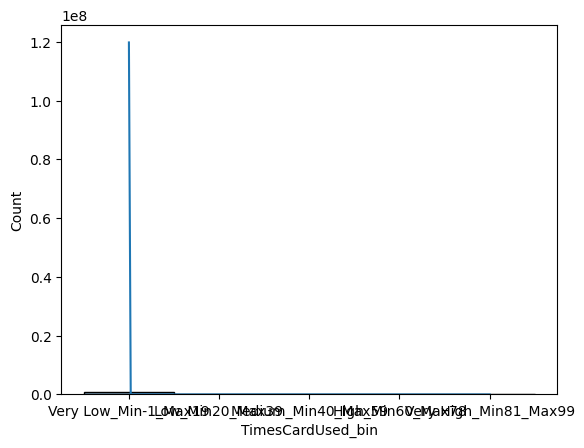

In [281]:
sns.histplot(dfhc[b], kde = True)

In [282]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   customerId               679525 non-null  object
 1   Tonikloanid              679525 non-null  object
 2   CBContract               679525 non-null  object
 3   run_date                 679525 non-null  dbdate
 4   ContractInstallmentType  679525 non-null  object
 5   TimesCardUsed            679525 non-null  int64 
 6   TimesCardUsed_bin        679525 non-null  object
dtypes: dbdate(1), int64(1), object(5)
memory usage: 36.3+ MB


In [283]:
dfhc[b] = dfhc[b].astype(str)

In [284]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[b]
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,TimesCardUsed,TimesCardUsed_bin,joint
171103,1413081,1c298a77-d7d9-469b-94fb-ed21a5eb0e5a,G00717704,2024-02-05,Granted,-1,Very Low_Min-1_Max19,Granted_Very Low_Min-1_Max19
413589,1943548,901bf6af-2354-4ec2-a0c1-f07a267f83a6,600905806,2023-03-15,Granted,18,Very Low_Min-1_Max19,Granted_Very Low_Min-1_Max19
652459,2315444,fe660efd-cbcf-4fbd-b230-167577e366bc,S03521736,2023-12-09,Granted,-1,Very Low_Min-1_Max19,Granted_Very Low_Min-1_Max19
166354,2243421,18257278-d21c-4885-a035-76ff220edeb1,101119538,2023-09-22,Granted,-1,Very Low_Min-1_Max19,Granted_Very Low_Min-1_Max19
201023,2400317,d3f4e432-a9ee-4b53-8bc7-f8e056c4922b,T05570424,2024-02-14,Granted,-1,Very Low_Min-1_Max19,Granted_Very Low_Min-1_Max19
497861,1244962,53138382-e1f9-4902-af0f-17b914f6e4ab,O04727959,2023-10-26,NotGranted,-1,Very Low_Min-1_Max19,NotGranted_Very Low_Min-1_Max19


In [285]:
dfhc.joint.value_counts()

Granted_Very Low_Min-1_Max19       591197
NotGranted_Very Low_Min-1_Max19     87886
Granted_Low_Min20_Max39               378
Granted_Medium_Min40_Max59             51
Granted_Very High_Min81_Max99           7
Granted_High_Min60_Max78                6
Name: joint, dtype: int64

In [286]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


CBContract                          \
joint      Granted_High_Min60_Max78 Granted_Low_Min20_Max39   
customerId                                                    
2325853                         NaN                     NaN   
2005251                         NaN                     NaN   
1912259                         NaN                     NaN   
2021619                         NaN                     NaN   
2220634                         NaN                     NaN   

                                                                     \
joint      Granted_Medium_Min40_Max59 Granted_Very High_Min81_Max99   
customerId                                                            
2325853                           NaN                           NaN   
2005251                           NaN                           NaN   
1912259                           NaN                           NaN   
2021619                           NaN                           NaN   
2220634                           NaN                           NaN   

                                                                         \
joint      Granted_Very Low_Min-1_Max19 NotGranted_Very Low_Min-1_Max19   
customerId                                                                
2325853                             1.0                             NaN   
2005251                            10.0                             3.0   
1912259                            30.0                             1.0   
2021619                             NaN                             1.0   
2220634                             1.0                             1.0   

                        Tonikloanid                          \
joint      Granted_High_Min60_Max78 Granted_Low_Min20_Max39   
customerId                                                    
2325853                         NaN                     NaN   
2005251                         NaN                     NaN   
1912259                         NaN                     NaN   
2021619                         NaN                     NaN   
2220634                         NaN                     NaN   

                                                                     \
joint      Granted_Medium_Min40_Max59 Granted_Very High_Min81_Max99   
customerId                                                            
2325853                           NaN                           NaN   
2005251                           NaN                           NaN   
1912259                           NaN                           NaN   
2021619                           NaN                           NaN   
2220634                           NaN                           NaN   

                                                                         
joint      Granted_Very Low_Min-1_Max19 NotGranted_Very Low_Min-1_Max19  
customerId                                                               
2325853                             1.0                             NaN  
2005251                             2.0                             2.0  
1912259                             1.0                             1.0  
2021619                             NaN                             1.0  
2220634                             1.0                             1.0

In [287]:
result_pivot.columns.value_counts()

(CBContract, Granted_High_Min60_Max78)            1
(CBContract, Granted_Low_Min20_Max39)             1
(CBContract, Granted_Medium_Min40_Max59)          1
(CBContract, Granted_Very High_Min81_Max99)       1
(CBContract, Granted_Very Low_Min-1_Max19)        1
(CBContract, NotGranted_Very Low_Min-1_Max19)     1
(Tonikloanid, Granted_High_Min60_Max78)           1
(Tonikloanid, Granted_Low_Min20_Max39)            1
(Tonikloanid, Granted_Medium_Min40_Max59)         1
(Tonikloanid, Granted_Very High_Min81_Max99)      1
(Tonikloanid, Granted_Very Low_Min-1_Max19)       1
(Tonikloanid, NotGranted_Very Low_Min-1_Max19)    1
dtype: int64

In [288]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',        'Granted_High_Min60_Max78'),
            ( 'CBContract',         'Granted_Low_Min20_Max39'),
            ( 'CBContract',      'Granted_Medium_Min40_Max59'),
            ( 'CBContract',   'Granted_Very High_Min81_Max99'),
            ( 'CBContract',    'Granted_Very Low_Min-1_Max19'),
            ( 'CBContract', 'NotGranted_Very Low_Min-1_Max19'),
            ('Tonikloanid',        'Granted_High_Min60_Max78'),
            ('Tonikloanid',         'Granted_Low_Min20_Max39'),
            ('Tonikloanid',      'Granted_Medium_Min40_Max59'),
            ('Tonikloanid',   'Granted_Very High_Min81_Max99'),
            ('Tonikloanid',    'Granted_Very Low_Min-1_Max19'),
            ('Tonikloanid', 'NotGranted_Very Low_Min-1_Max19')],
           names=[None, 'joint'])

In [289]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,TimesCardUsed_CBContract_Granted_High_Min60_Max78,TimesCardUsed_CBContract_Granted_Low_Min20_Max39,TimesCardUsed_CBContract_Granted_Medium_Min40_Max59,TimesCardUsed_CBContract_Granted_Very High_Min81_Max99,TimesCardUsed_CBContract_Granted_Very Low_Min-1_Max19,TimesCardUsed_CBContract_NotGranted_Very Low_Min-1_Max19,TimesCardUsed_Tonikloanid_Granted_High_Min60_Max78,TimesCardUsed_Tonikloanid_Granted_Low_Min20_Max39,TimesCardUsed_Tonikloanid_Granted_Medium_Min40_Max59,TimesCardUsed_Tonikloanid_Granted_Very High_Min81_Max99,TimesCardUsed_Tonikloanid_Granted_Very Low_Min-1_Max19,TimesCardUsed_Tonikloanid_NotGranted_Very Low_Min-1_Max19
0,1000001,NaN,NaN,NaN,NaN,8.0,2.0,NaN,NaN,NaN,NaN,3.0,2.0
1,1000085,NaN,NaN,NaN,NaN,13.0,2.0,NaN,NaN,NaN,NaN,2.0,2.0
2,1000192,NaN,NaN,NaN,NaN,12.0,3.0,NaN,NaN,NaN,NaN,2.0,2.0
3,1000243,NaN,NaN,NaN,NaN,29.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
4,1000278,NaN,NaN,NaN,NaN,38.0,10.0,NaN,NaN,NaN,NaN,3.0,3.0


In [290]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [291]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [292]:
df.to_csv("cicdata_20240226.csv", index = False)

In [293]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 395)
The size of df is:	38748315
the number of dimensions of df is:	2


# OutstandingBalanceUnbilled

In [294]:
a = 'OutstandingBalanceUnbilled'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, '-1') {a} 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID b4db0470-979d-42d0-8dfb-1ba6efdfe4c3 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [295]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,OutstandingBalanceUnbilled
310649,1412717,b44c1b4a-3055-42d2-a012-fa26298b96c9,D03939622,2024-01-31,Granted,-1
369801,1805981,98454902-8aea-4b59-ba20-9ed0f3669054,F03506369,2023-02-28,Granted,-1
39831,2329380,cc79680e-aa9e-4142-aa11-041e67309794,I03845413,2023-12-10,Granted,-1
491812,2125257,6fb3cfd7-eb61-487f-a1c9-5f2f72868851,A04530800,2023-07-08,Granted,-1
567182,1749342,a3eb4df5-fe47-49e3-86ea-fc7062696d65,O00282198,2023-02-19,Granted,1133
547113,1438624,b67abad9-ee6c-4098-9aad-c82c03fea7e8,A04666921,2023-06-01,Granted,-1


In [297]:
dfhc.dtypes

customerId                    object
Tonikloanid                   object
CBContract                    object
run_date                      dbdate
ContractInstallmentType       object
OutstandingBalanceUnbilled    object
dtype: object

In [298]:
dfhc[a].describe()

count     679525
unique     10209
top           -1
freq      621084
Name: OutstandingBalanceUnbilled, dtype: object

In [299]:
dfhc[a] = dfhc[a].astype(np.int64)

In [300]:
dfhc.dtypes

customerId                    object
Tonikloanid                   object
CBContract                    object
run_date                      dbdate
ContractInstallmentType       object
OutstandingBalanceUnbilled     int64
dtype: object

In [ ]:
# def create_bins(df, column_name, bin_edges, bin_labels):
#     # Create a new column based on the specified bins and labels
#     new_column_name = f'{column_name}_bin'
#     df[new_column_name] = pd.cut(df[column_name], bins=bin_edges, labels=bin_labels, right=False)
#     return df

# # Assuming your dataframe is named 'df'

# # Define bin edges and labels for 'ContractStatus_CV'
# bins_contract_status_cv = [-float('inf'), 0, 25, 55, 75, float('inf')]
# labels_contract_status_cv = ['-1', '0', '1-25', '25-55', '55']


In [301]:
dfhc[a].unique()

array([   -1,  7099,     0, ..., 81879,  9563,  4494], dtype=int64)

In [307]:
import pandas as pd

# Create 5 bins with labels
num_bins = 5
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
# Perform binning using pandas cut
dfhc[b] = pd.cut(dfhc[a], bins=num_bins, labels=bin_labels, precision=3, duplicates='drop')


In [308]:
dfhc.sample(10)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,OutstandingBalanceUnbilled,OutstandingBalanceUnbilled_bin,OutstandingBalanceUnbilled_bin_labels
434993,2133966,2445aaa3-995c-4c14-9c2b-42ac7aceb992,904930268,2023-11-18,NotGranted,-1,Very Low,nan
663641,2370243,7490bc33-d991-4541-80dd-01a93ee3af62,T04059681,2024-01-16,Granted,-1,Very Low,nan
211000,2284312,5d1adac9-acf8-442f-95ba-a02e117a2ead,F05267406,2024-02-16,Granted,-1,Very Low,nan
216291,1864562,1fd538e0-3473-45ac-90aa-5d724ee2ed3e,300801024,2023-05-26,Granted,-1,Very Low,nan
3774,2096298,44f8c062-fe2d-4c14-b263-eba9eb8f2b98,F03168102,2023-06-16,Granted,-1,Very Low,nan
208971,1933459,92841073-cbfd-4071-8789-f2c2d23a6feb,I01018137,2023-03-08,Granted,-1,Very Low,nan
303996,2267378,3d53bc73-5472-48a9-80d7-1329d7a03e0c,M01932714,2023-10-16,Granted,-1,Very Low,nan
413548,1445847,65f6ef3b-2863-4e3c-88f6-4bf0f777a73d,K04253985,2023-12-14,Granted,-1,Very Low,nan
552809,1994909,e25c42a6-8ed5-4f3d-a4c1-ad182697753a,L02703087,2023-04-14,Granted,-1,Very Low,nan
237800,2247880,f034a540-5955-436a-9a91-bb4bd35abbc7,S03167022,2023-09-25,Granted,-1,Very Low,nan


In [309]:
dfhc[b].value_counts()

Very Low     679113
Low             322
Medium           59
High             20
Very High        11
Name: OutstandingBalanceUnbilled_bin, dtype: int64

In [310]:
min_scores = dfhc.groupby(b)[a].transform('min')
max_scores = dfhc.groupby(b)[a].transform('max')
# Create a new column combining ScoreRange, min(ScoreRaw), and max(ScoreRaw)
dfhc[b] = dfhc[b].astype(str) + '_Min' + min_scores.astype(str) + '_Max' + max_scores.astype(str)
dfhc[b].value_counts()

Very Low_Min-1_Max256228           679113
Low_Min256983_Max510725               322
Medium_Min513995_Max761737             59
High_Min775156_Max1019237              20
Very High_Min1059482_Max1281367        11
Name: OutstandingBalanceUnbilled_bin, dtype: int64

In [306]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# # Replace 'X' with the actual column name if it's different

# # Create an imputer and fit_transform the data
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
# X_imputed = imputer.fit_transform(dfhc[[a]])

# # Convert the imputed values to a pandas Series
# X_imputed_series = pd.Series(X_imputed.flatten())
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# c = f'{a}_{a1}_{a2}'
# # Perform quantile binning using pandas qcut
# num_quantiles = 10
# dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_quantiles, labels=False, retbins=True, precision=3, duplicates='drop')

# # Assign bin edges as labels
# label_edges = np.round(bin_edges, 2)
# dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# # Convert the Category datatype to string
# dfhc[c] = dfhc[c].astype(str)

# # Display the value counts of the new column
# print(dfhc[c].value_counts())


nan                 621084
-1.00-1281367.00     58441
Name: OutstandingBalanceUnbilled_bin_labels, dtype: int64


<AxesSubplot: xlabel='OutstandingBalanceUnbilled_bin', ylabel='Count'>

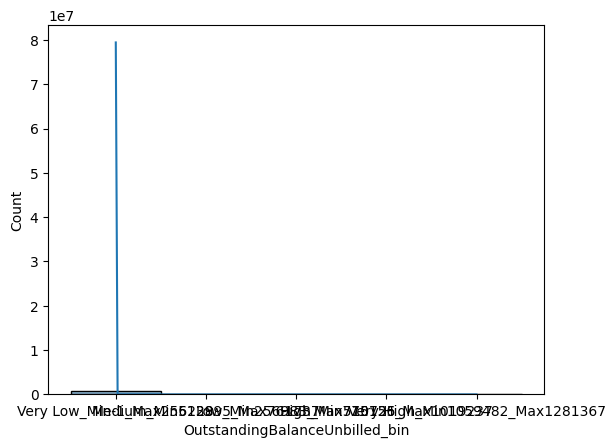

In [311]:
sns.histplot(dfhc[b], kde = True)

In [312]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 8 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   customerId                             679525 non-null  object
 1   Tonikloanid                            679525 non-null  object
 2   CBContract                             679525 non-null  object
 3   run_date                               679525 non-null  dbdate
 4   ContractInstallmentType                679525 non-null  object
 5   OutstandingBalanceUnbilled             679525 non-null  int64 
 6   OutstandingBalanceUnbilled_bin         679525 non-null  object
 7   OutstandingBalanceUnbilled_bin_labels  679525 non-null  object
dtypes: dbdate(1), int64(1), object(6)
memory usage: 41.5+ MB


In [313]:
dfhc[b] = dfhc[b].astype(str)

In [314]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[b]
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,OutstandingBalanceUnbilled,OutstandingBalanceUnbilled_bin,OutstandingBalanceUnbilled_bin_labels,joint
321715,2262062,3b0b1c34-17a7-4753-9dc8-b3730607d2c1,B05088605,2023-10-06,Granted,-1,Very Low_Min-1_Max256228,nan,Granted_Very Low_Min-1_Max256228
299130,1664606,80e43824-c625-4a34-8313-c3fe3f46b048,O05521503,2024-01-27,Granted,-1,Very Low_Min-1_Max256228,nan,Granted_Very Low_Min-1_Max256228
656290,2385719,8be7b340-541c-4597-8935-e937fee55341,205592623,2024-02-11,Granted,-1,Very Low_Min-1_Max256228,nan,Granted_Very Low_Min-1_Max256228
464399,2146307,23516d22-6f62-41ce-bcf5-f0c06a1f3616,400705297,2023-07-20,Granted,-1,Very Low_Min-1_Max256228,nan,Granted_Very Low_Min-1_Max256228
508102,1856517,339f03b6-c0be-45ee-b2b9-a03f2c5b3a29,R04909630,2023-09-15,Granted,-1,Very Low_Min-1_Max256228,nan,Granted_Very Low_Min-1_Max256228
410649,2289965,89775c34-d08a-4159-9819-d52f40f428eb,P04439682,2023-10-31,Granted,-1,Very Low_Min-1_Max256228,nan,Granted_Very Low_Min-1_Max256228


In [315]:
dfhc.joint.value_counts()

Granted_Very Low_Min-1_Max256228           591227
NotGranted_Very Low_Min-1_Max256228         87886
Granted_Low_Min256983_Max510725               322
Granted_Medium_Min513995_Max761737             59
Granted_High_Min775156_Max1019237              20
Granted_Very High_Min1059482_Max1281367        11
Name: joint, dtype: int64

In [316]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


CBContract                                  \
joint      Granted_High_Min775156_Max1019237 Granted_Low_Min256983_Max510725   
customerId                                                                     
2034657                                  NaN                             NaN   
1875981                                  NaN                             NaN   
1986738                                  NaN                             NaN   
2120715                                  NaN                             NaN   
2089664                                  NaN                             NaN   

                                               \
joint      Granted_Medium_Min513995_Max761737   
customerId                                      
2034657                                   NaN   
1875981                                   NaN   
1986738                                   NaN   
2120715                                   NaN   
2089664                                   NaN   

                                                    \
joint      Granted_Very High_Min1059482_Max1281367   
customerId                                           
2034657                                        NaN   
1875981                                        NaN   
1986738                                        NaN   
2120715                                        NaN   
2089664                                        NaN   

                                             \
joint      Granted_Very Low_Min-1_Max256228   
customerId                                    
2034657                                 2.0   
1875981                                 2.0   
1986738                                 1.0   
2120715                                 6.0   
2089664                                17.0   

                                                \
joint      NotGranted_Very Low_Min-1_Max256228   
customerId                                       
2034657                                    NaN   
1875981                                    NaN   
1986738                                    NaN   
2120715                                    4.0   
2089664                                    2.0   

                                 Tonikloanid                                  \
joint      Granted_High_Min775156_Max1019237 Granted_Low_Min256983_Max510725   
customerId                                                                     
2034657                                  NaN                             NaN   
1875981                                  NaN                             NaN   
1986738                                  NaN                             NaN   
2120715                                  NaN                             NaN   
2089664                                  NaN                             NaN   

                                               \
joint      Granted_Medium_Min513995_Max761737   
customerId                                      
2034657                                   NaN   
1875981                                   NaN   
1986738                                   NaN   
2120715                                   NaN   
2089664                                   NaN   

                                                    \
joint      Granted_Very High_Min1059482_Max1281367   
customerId                                           
2034657                                        NaN   
1875981                                        NaN   
1986738                                        NaN   
2120715                                        NaN   
2089664                                        NaN   

                                             \
joint      Granted_Very Low_Min-1_Max256228   
customerId                                    
2034657                                 1.0   
1875981                                 1.0   
1986738                                 1.0   
2120715                                 

In [317]:
result_pivot.columns.value_counts()

(CBContract, Granted_High_Min775156_Max1019237)           1
(CBContract, Granted_Low_Min256983_Max510725)             1
(CBContract, Granted_Medium_Min513995_Max761737)          1
(CBContract, Granted_Very High_Min1059482_Max1281367)     1
(CBContract, Granted_Very Low_Min-1_Max256228)            1
(CBContract, NotGranted_Very Low_Min-1_Max256228)         1
(Tonikloanid, Granted_High_Min775156_Max1019237)          1
(Tonikloanid, Granted_Low_Min256983_Max510725)            1
(Tonikloanid, Granted_Medium_Min513995_Max761737)         1
(Tonikloanid, Granted_Very High_Min1059482_Max1281367)    1
(Tonikloanid, Granted_Very Low_Min-1_Max256228)           1
(Tonikloanid, NotGranted_Very Low_Min-1_Max256228)        1
dtype: int64

In [318]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',       'Granted_High_Min775156_Max1019237'),
            ( 'CBContract',         'Granted_Low_Min256983_Max510725'),
            ( 'CBContract',      'Granted_Medium_Min513995_Max761737'),
            ( 'CBContract', 'Granted_Very High_Min1059482_Max1281367'),
            ( 'CBContract',        'Granted_Very Low_Min-1_Max256228'),
            ( 'CBContract',     'NotGranted_Very Low_Min-1_Max256228'),
            ('Tonikloanid',       'Granted_High_Min775156_Max1019237'),
            ('Tonikloanid',         'Granted_Low_Min256983_Max510725'),
            ('Tonikloanid',      'Granted_Medium_Min513995_Max761737'),
            ('Tonikloanid', 'Granted_Very High_Min1059482_Max1281367'),
            ('Tonikloanid',        'Granted_Very Low_Min-1_Max256228'),
            ('Tonikloanid',     'NotGranted_Very Low_Min-1_Max256228')],
           names=[None, 'joint'])

In [319]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,OutstandingBalanceUnbilled_CBContract_Granted_High_Min775156_Max1019237,OutstandingBalanceUnbilled_CBContract_Granted_Low_Min256983_Max510725,OutstandingBalanceUnbilled_CBContract_Granted_Medium_Min513995_Max761737,OutstandingBalanceUnbilled_CBContract_Granted_Very High_Min1059482_Max1281367,OutstandingBalanceUnbilled_CBContract_Granted_Very Low_Min-1_Max256228,OutstandingBalanceUnbilled_CBContract_NotGranted_Very Low_Min-1_Max256228,OutstandingBalanceUnbilled_Tonikloanid_Granted_High_Min775156_Max1019237,OutstandingBalanceUnbilled_Tonikloanid_Granted_Low_Min256983_Max510725,OutstandingBalanceUnbilled_Tonikloanid_Granted_Medium_Min513995_Max761737,OutstandingBalanceUnbilled_Tonikloanid_Granted_Very High_Min1059482_Max1281367,OutstandingBalanceUnbilled_Tonikloanid_Granted_Very Low_Min-1_Max256228,OutstandingBalanceUnbilled_Tonikloanid_NotGranted_Very Low_Min-1_Max256228
0,1000001,NaN,NaN,NaN,NaN,8.0,2.0,NaN,NaN,NaN,NaN,3.0,2.0
1,1000085,NaN,NaN,NaN,NaN,13.0,2.0,NaN,NaN,NaN,NaN,2.0,2.0
2,1000192,NaN,NaN,NaN,NaN,12.0,3.0,NaN,NaN,NaN,NaN,2.0,2.0
3,1000243,NaN,NaN,NaN,NaN,29.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
4,1000278,NaN,NaN,NaN,NaN,38.0,10.0,NaN,NaN,NaN,NaN,3.0,3.0


In [320]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [321]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [322]:
df.to_csv("cicdata_20240226.csv", index = False)

In [323]:
df_result.to_csv(f"{a}.csv")

In [324]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 407)
The size of df is:	39925479
the number of dimensions of df is:	2


# InstallmentTypeDesc

In [326]:
a = 'InstallmentTypeDesc'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, 'NA') {a} 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID c8f85af3-91dd-414a-af5c-1e8ca5bde47b successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [327]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,InstallmentTypeDesc
74342,1846532,7bc5be05-e480-4981-b81c-219edc1fd661,P02456830,2023-01-31,Granted,NA
125085,1333944,3ba06891-b296-4492-887e-9a5f6556016c,103155297,2023-10-09,Granted,NA
24328,1063266,1ab21136-b4ae-4e23-8ac0-391da0a01ba5,I03049847,2023-05-16,Granted,NA
254129,1662698,2409ba9c-35ab-4cfe-9be1-da446b9041f7,L04072589,2023-01-13,Granted,NA
673025,1838196,c784214f-aba5-45e4-9861-dd8d4c06e6e0,M03482493,2023-01-16,Granted,NA
439023,1384316,ebef2aa2-b171-4870-95d1-ce0ec1e32998,904701347,2023-08-07,Granted,NA


In [328]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
InstallmentTypeDesc        object
dtype: object

In [329]:
dfhc[a].describe()

count     679525
unique         3
top           NA
freq      588027
Name: InstallmentTypeDesc, dtype: object

In [ ]:
# dfhc[a] = dfhc[a].astype(np.int64)

In [331]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
InstallmentTypeDesc        object
dtype: object

In [332]:
# def create_bins(df, column_name, bin_edges, bin_labels):
#     # Create a new column based on the specified bins and labels
#     new_column_name = f'{column_name}_bin'
#     df[new_column_name] = pd.cut(df[column_name], bins=bin_edges, labels=bin_labels, right=False)
#     return df

# # Assuming your dataframe is named 'df'

# # Define bin edges and labels for 'ContractStatus_CV'
# bins_contract_status_cv = [-float('inf'), 0, 25, 55, 75, float('inf')]
# labels_contract_status_cv = ['-1', '0', '1-25', '25-55', '55']


In [333]:
dfhc[a].unique()

array(['NA', 'fixed', 'variable'], dtype=object)

In [ ]:
# import pandas as pd

# # Create 5 bins with labels
# num_bins = 5
# bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# # Perform binning using pandas cut
# dfhc[b] = pd.cut(dfhc[a], bins=num_bins, labels=bin_labels, precision=3, duplicates='drop')


In [334]:
dfhc.sample(10)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,InstallmentTypeDesc
585965,1766226,1817ad22-86f0-40d3-91e1-dca639bd11ff,H04735460,2023-12-23,NotGranted,NA
497495,2083892,e0673174-b26d-4fc6-97b7-3295c7cc2c5c,604382660,2024-02-17,Granted,NA
307985,2170322,8e9dac79-a572-46ed-b76c-03733789f8ea,205194861,2023-12-16,Granted,NA
54002,1288399,5fa51f59-04e7-4715-a0d2-4b402cdb8765,804756093,2023-12-19,Granted,NA
462566,2239128,7dd6cc44-53fa-46d2-ada9-32c847b041e6,904944039,2024-01-15,Granted,NA
669706,1244476,42983901-3b89-4aee-a2df-2cdcba31001e,705206573,2023-09-25,Granted,NA
515964,2091157,9fcb5198-5853-41c8-b2df-17fa7ce635f0,Q04598362,2023-06-13,Granted,NA
378937,1825144,1573afd9-50cc-4d9a-a50d-ee9953c4482c,H02630197,2023-09-03,NotGranted,NA
600154,2114030,0f362fc0-2a3c-4c8b-a9dc-8921fbe17252,B05342211,2024-02-12,NotGranted,NA
586920,1921865,c169de63-ecf5-41a1-ac67-8df28a7eb2d1,104449170,2023-03-06,Granted,NA


In [335]:
# dfhc[b].value_counts()

In [336]:
# min_scores = dfhc.groupby(b)[a].transform('min')
# max_scores = dfhc.groupby(b)[a].transform('max')
# # Create a new column combining ScoreRange, min(ScoreRaw), and max(ScoreRaw)
# dfhc[b] = dfhc[b].astype(str) + '_Min' + min_scores.astype(str) + '_Max' + max_scores.astype(str)
# dfhc[b].value_counts()

In [337]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# # Replace 'X' with the actual column name if it's different

# # Create an imputer and fit_transform the data
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
# X_imputed = imputer.fit_transform(dfhc[[a]])

# # Convert the imputed values to a pandas Series
# X_imputed_series = pd.Series(X_imputed.flatten())
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# c = f'{a}_{a1}_{a2}'
# # Perform quantile binning using pandas qcut
# num_quantiles = 10
# dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_quantiles, labels=False, retbins=True, precision=3, duplicates='drop')

# # Assign bin edges as labels
# label_edges = np.round(bin_edges, 2)
# dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# # Convert the Category datatype to string
# dfhc[c] = dfhc[c].astype(str)

# # Display the value counts of the new column
# print(dfhc[c].value_counts())


<AxesSubplot: xlabel='InstallmentTypeDesc', ylabel='Count'>

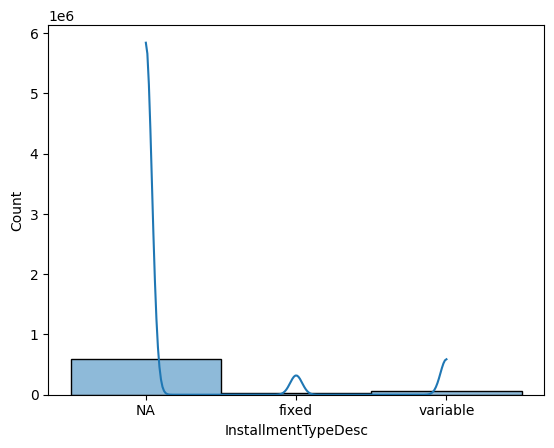

In [339]:
sns.histplot(dfhc[a], kde = True)

In [340]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   customerId               679525 non-null  object
 1   Tonikloanid              679525 non-null  object
 2   CBContract               679525 non-null  object
 3   run_date                 679525 non-null  dbdate
 4   ContractInstallmentType  679525 non-null  object
 5   InstallmentTypeDesc      679525 non-null  object
dtypes: dbdate(1), object(5)
memory usage: 31.1+ MB


In [341]:
# dfhc[b] = dfhc[b].astype(str)

In [342]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[a]
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,InstallmentTypeDesc,joint
274944,2173160,e92cc441-16eb-4649-82ca-b56955f13411,M05449895,2023-12-06,Granted,NA,Granted_NA
633924,1862235,463fc2f6-91fb-44ef-8285-bf8caff2e7cd,601083859,2023-03-01,NotGranted,NA,NotGranted_NA
662712,1863554,174a6c03-6296-45d6-9370-3648f06d24ca,G00138641,2023-01-26,Granted,variable,Granted_variable
194936,2401478,5dfaac7f-de4c-4508-92b2-c06b165b86f6,M03454021,2024-02-16,Granted,NA,Granted_NA
542718,2242111,d999461b-73a3-404a-a656-158103d430fd,M04609307,2023-09-21,Granted,NA,Granted_NA
508115,2073862,e09b24bd-1d9a-4ebd-9335-d5bfea29ef73,403770808,2023-06-02,NotGranted,NA,NotGranted_NA


In [343]:
dfhc.joint.value_counts()

Granted_NA          500141
NotGranted_NA        87886
Granted_variable     59245
Granted_fixed        32253
Name: joint, dtype: int64

In [344]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


CBContract                                               \
joint      Granted_NA Granted_fixed Granted_variable NotGranted_NA   
customerId                                                           
2213563           1.0           NaN              NaN           NaN   
1977025           2.0           NaN              NaN           NaN   
1677903           1.0           NaN              NaN           1.0   
2203938           2.0           NaN              NaN           NaN   
2112503           NaN           NaN              NaN           1.0   

           Tonikloanid                                               
joint       Granted_NA Granted_fixed Granted_variable NotGranted_NA  
customerId                                                           
2213563            1.0           NaN              NaN           NaN  
1977025            1.0           NaN              NaN           NaN  
1677903            1.0           NaN              NaN           1.0  
2203938            1.0           NaN              NaN           NaN  
2112503            NaN           NaN              NaN           1.0

In [345]:
result_pivot.columns.value_counts()

(CBContract, Granted_NA)           1
(CBContract, Granted_fixed)        1
(CBContract, Granted_variable)     1
(CBContract, NotGranted_NA)        1
(Tonikloanid, Granted_NA)          1
(Tonikloanid, Granted_fixed)       1
(Tonikloanid, Granted_variable)    1
(Tonikloanid, NotGranted_NA)       1
dtype: int64

In [346]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',       'Granted_NA'),
            ( 'CBContract',    'Granted_fixed'),
            ( 'CBContract', 'Granted_variable'),
            ( 'CBContract',    'NotGranted_NA'),
            ('Tonikloanid',       'Granted_NA'),
            ('Tonikloanid',    'Granted_fixed'),
            ('Tonikloanid', 'Granted_variable'),
            ('Tonikloanid',    'NotGranted_NA')],
           names=[None, 'joint'])

In [347]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,InstallmentTypeDesc_CBContract_Granted_NA,InstallmentTypeDesc_CBContract_Granted_fixed,InstallmentTypeDesc_CBContract_Granted_variable,InstallmentTypeDesc_CBContract_NotGranted_NA,InstallmentTypeDesc_Tonikloanid_Granted_NA,InstallmentTypeDesc_Tonikloanid_Granted_fixed,InstallmentTypeDesc_Tonikloanid_Granted_variable,InstallmentTypeDesc_Tonikloanid_NotGranted_NA
0,1000001,NaN,1.0,7.0,2.0,NaN,3.0,3.0,2.0
1,1000085,NaN,4.0,9.0,2.0,NaN,2.0,2.0,2.0
2,1000192,7.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0
3,1000243,12.0,10.0,7.0,1.0,1.0,1.0,1.0,1.0
4,1000278,34.0,3.0,1.0,10.0,3.0,3.0,3.0,3.0


In [348]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [349]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [350]:
df.to_csv("cicdata_20240226.csv", index = False)

In [351]:
df_result.to_csv(f"{a}.csv")

In [352]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 415)
The size of df is:	40710255
the number of dimensions of df is:	2


# TransactionType

In [353]:
a = 'TransactionType'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, 'NA') {a} 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID f69dab9f-ce2b-4c4f-9059-144372b365b5 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [354]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,TransactionType
144274,1473891,9a1f7576-fd43-49a7-b4e6-b54367bc3f2b,H04669689,2023-06-19,Granted,NA
655587,1115576,7ce7c99b-b6c4-4fdd-863d-1b9f1501d9a8,A04225677,2023-06-12,Granted,DL
29982,2039472,84c13660-3aaa-4b7c-a281-f6c35a154aec,800658425,2023-10-25,Granted,PCC
504891,2004360,44525300-1ded-43c3-b87a-d34ea956745d,903110860,2023-04-19,Granted,NA
674821,2181222,ca179773-8236-4ddd-a68e-44173c7d8544,P05173793,2024-02-21,Granted,NA
640655,2349090,7ffeb454-73c5-45fb-9e31-13ebd2d3cc9f,805685141,2023-12-26,Granted,NA


In [355]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
TransactionType            object
dtype: object

In [356]:
dfhc[a].describe()

count     679525
unique        12
top           NA
freq      550221
Name: TransactionType, dtype: object

In [357]:
# dfhc[a] = dfhc[a].astype(np.int64)

In [358]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
TransactionType            object
dtype: object

In [359]:
# def create_bins(df, column_name, bin_edges, bin_labels):
#     # Create a new column based on the specified bins and labels
#     new_column_name = f'{column_name}_bin'
#     df[new_column_name] = pd.cut(df[column_name], bins=bin_edges, labels=bin_labels, right=False)
#     return df

# # Assuming your dataframe is named 'df'

# # Define bin edges and labels for 'ContractStatus_CV'
# bins_contract_status_cv = [-float('inf'), 0, 25, 55, 75, float('inf')]
# labels_contract_status_cv = ['-1', '0', '1-25', '25-55', '55']


In [360]:
dfhc[a].unique()

array(['NA', 'PCC', 'STT', 'ML', 'DL', 'BUL', 'SCC', 'CAD', 'BD', 'AL',
       'DB', 'MM'], dtype=object)

In [361]:
# import pandas as pd

# # Create 5 bins with labels
# num_bins = 5
# bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# # Perform binning using pandas cut
# dfhc[b] = pd.cut(dfhc[a], bins=num_bins, labels=bin_labels, precision=3, duplicates='drop')


In [362]:
dfhc.sample(10)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,TransactionType
369518,2235312,5b47f156-983b-4094-875a-b5edaa73a5bc,603435649,2023-09-16,Granted,NA
583402,2139364,11f7d820-9f00-4a2f-9759-91fd9c16166e,101615561,2023-07-16,Granted,NA
390329,2329891,667f7659-73c8-49d2-b33d-2ced7783ab0c,703520247,2023-12-10,NotGranted,NA
458179,2020942,4d6f2161-83ef-488e-905e-c3bcbb099f19,201924119,2023-04-30,Granted,NA
104342,2200822,102564c9-4182-4ae6-b634-fa746223e435,M04875160,2023-08-21,Granted,NA
57729,2219453,6fc3ef32-87c2-4434-8aee-c6161725196b,304869768,2023-12-29,Granted,NA
410351,1196662,e9aa60c1-aa40-4ffb-b096-0017545b2f12,P03494502,2023-10-06,Granted,NA
214053,2388324,081f982e-abc4-4b7e-88d1-d22f76f73e88,I06134257,2024-02-10,Granted,NA
25172,1458547,b70916d5-0be5-4e9d-b8dd-694bc36558bf,804562491,2023-09-28,NotGranted,NA
224734,1473634,2e0ce684-3b4a-474d-b1b7-855de3f628e9,M04292782,2023-02-20,Granted,NA


In [363]:
# dfhc[b].value_counts()

In [364]:
# min_scores = dfhc.groupby(b)[a].transform('min')
# max_scores = dfhc.groupby(b)[a].transform('max')
# # Create a new column combining ScoreRange, min(ScoreRaw), and max(ScoreRaw)
# dfhc[b] = dfhc[b].astype(str) + '_Min' + min_scores.astype(str) + '_Max' + max_scores.astype(str)
# dfhc[b].value_counts()

In [365]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# # Replace 'X' with the actual column name if it's different

# # Create an imputer and fit_transform the data
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
# X_imputed = imputer.fit_transform(dfhc[[a]])

# # Convert the imputed values to a pandas Series
# X_imputed_series = pd.Series(X_imputed.flatten())
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# c = f'{a}_{a1}_{a2}'
# # Perform quantile binning using pandas qcut
# num_quantiles = 10
# dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_quantiles, labels=False, retbins=True, precision=3, duplicates='drop')

# # Assign bin edges as labels
# label_edges = np.round(bin_edges, 2)
# dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# # Convert the Category datatype to string
# dfhc[c] = dfhc[c].astype(str)

# # Display the value counts of the new column
# print(dfhc[c].value_counts())


<AxesSubplot: xlabel='TransactionType', ylabel='Count'>

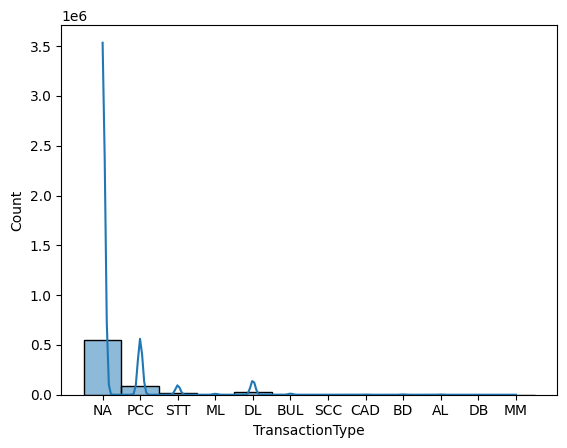

In [366]:
sns.histplot(dfhc[a], kde = True)

In [367]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   customerId               679525 non-null  object
 1   Tonikloanid              679525 non-null  object
 2   CBContract               679525 non-null  object
 3   run_date                 679525 non-null  dbdate
 4   ContractInstallmentType  679525 non-null  object
 5   TransactionType          679525 non-null  object
dtypes: dbdate(1), object(5)
memory usage: 31.1+ MB


In [368]:
# dfhc[b] = dfhc[b].astype(str)

In [369]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[a]
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,TransactionType,joint
58351,2189745,0507fb9a-30c3-4e20-8499-104045966665,H04469860,2024-02-21,Granted,NA,Granted_NA
536633,1239951,b9cfb24e-8587-40ab-8556-8b02d8324262,F03759986,2023-08-19,Granted,NA,Granted_NA
206091,2381134,ce5f1577-b501-4856-872e-8628cc37aeee,704007253,2024-01-27,NotGranted,NA,NotGranted_NA
236290,2220279,18c749f6-aaab-4309-9856-dc328a962604,804461405,2023-09-29,Granted,NA,Granted_NA
48693,1884521,13738d02-08f3-436f-a713-e8bc3554336c,904745215,2023-05-15,Granted,NA,Granted_NA
58611,2253619,2434e93f-b67d-4d5e-9d01-5c1512cc9ae1,Q02690503,2024-01-16,Granted,NA,Granted_NA


In [370]:
dfhc.joint.value_counts()

Granted_NA       462335
NotGranted_NA     87886
Granted_PCC       87698
Granted_DL        22463
Granted_STT       14803
Granted_BUL        1659
Granted_ML         1430
Granted_BD          527
Granted_AL          372
Granted_CAD         309
Granted_SCC          34
Granted_DB            8
Granted_MM            1
Name: joint, dtype: int64

In [371]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


CBContract                                                \
joint      Granted_AL Granted_BD Granted_BUL Granted_CAD Granted_DB   
customerId                                                            
2327941           NaN        NaN         NaN         NaN        NaN   
2205264           NaN        NaN         NaN         NaN        NaN   
1927963           NaN        NaN         NaN         NaN        NaN   
2286300           NaN        NaN         NaN         NaN        NaN   
1649070           NaN        NaN         NaN         NaN        NaN   

                                                                    \
joint      Granted_DL Granted_ML Granted_MM Granted_NA Granted_PCC   
customerId                                                           
2327941           NaN        NaN        NaN        NaN         NaN   
2205264           NaN        NaN        NaN        1.0         NaN   
1927963           NaN        NaN        NaN        3.0         NaN   
2286300           NaN        NaN        NaN        1.0         NaN   
1649070           NaN        NaN        NaN       26.0         6.0   

                                                 Tonikloanid             \
joint      Granted_SCC Granted_STT NotGranted_NA  Granted_AL Granted_BD   
customerId                                                                
2327941            NaN         NaN           1.0         NaN        NaN   
2205264            NaN         NaN           NaN         NaN        NaN   
1927963            NaN         NaN           NaN         NaN        NaN   
2286300            NaN         NaN           NaN         NaN        NaN   
1649070            NaN         NaN           1.0         NaN        NaN   

                                                                     \
joint      Granted_BUL Granted_CAD Granted_DB Granted_DL Granted_ML   
customerId                                                            
2327941            NaN         NaN        NaN        NaN        NaN   
2205264            NaN         NaN        NaN        NaN        NaN   
1927963            NaN         NaN        NaN        NaN        NaN   
2286300            NaN         NaN        NaN        NaN        NaN   
1649070            NaN         NaN        NaN        NaN        NaN   

                                                                      \
joint      Granted_MM Granted_NA Granted_PCC Granted_SCC Granted_STT   
customerId                                                             
2327941           NaN        NaN         NaN         NaN         NaN   
2205264           NaN        1.0         NaN         NaN         NaN   
1927963           NaN        1.0         NaN         NaN         NaN   
2286300           NaN        1.0         NaN         NaN         NaN   
1649070           NaN        1.0         1.0         NaN         NaN   

                          
joint      NotGranted_NA  
customerId                
2327941              1.0  
2205264              NaN  
1927963              NaN  
2286300              NaN  
1649070              1.0

In [372]:
result_pivot.columns.value_counts()

(CBContract, Granted_AL)        1
(CBContract, Granted_BD)        1
(Tonikloanid, Granted_STT)      1
(Tonikloanid, Granted_SCC)      1
(Tonikloanid, Granted_PCC)      1
(Tonikloanid, Granted_NA)       1
(Tonikloanid, Granted_MM)       1
(Tonikloanid, Granted_ML)       1
(Tonikloanid, Granted_DL)       1
(Tonikloanid, Granted_DB)       1
(Tonikloanid, Granted_CAD)      1
(Tonikloanid, Granted_BUL)      1
(Tonikloanid, Granted_BD)       1
(Tonikloanid, Granted_AL)       1
(CBContract, NotGranted_NA)     1
(CBContract, Granted_STT)       1
(CBContract, Granted_SCC)       1
(CBContract, Granted_PCC)       1
(CBContract, Granted_NA)        1
(CBContract, Granted_MM)        1
(CBContract, Granted_ML)        1
(CBContract, Granted_DL)        1
(CBContract, Granted_DB)        1
(CBContract, Granted_CAD)       1
(CBContract, Granted_BUL)       1
(Tonikloanid, NotGranted_NA)    1
dtype: int64

In [373]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',    'Granted_AL'),
            ( 'CBContract',    'Granted_BD'),
            ( 'CBContract',   'Granted_BUL'),
            ( 'CBContract',   'Granted_CAD'),
            ( 'CBContract',    'Granted_DB'),
            ( 'CBContract',    'Granted_DL'),
            ( 'CBContract',    'Granted_ML'),
            ( 'CBContract',    'Granted_MM'),
            ( 'CBContract',    'Granted_NA'),
            ( 'CBContract',   'Granted_PCC'),
            ( 'CBContract',   'Granted_SCC'),
            ( 'CBContract',   'Granted_STT'),
            ( 'CBContract', 'NotGranted_NA'),
            ('Tonikloanid',    'Granted_AL'),
            ('Tonikloanid',    'Granted_BD'),
            ('Tonikloanid',   'Granted_BUL'),
            ('Tonikloanid',   'Granted_CAD'),
            ('Tonikloanid',    'Granted_DB'),
            ('Tonikloanid',    'Granted_DL'),
            ('Tonikloanid',    'Granted_ML'),
            ('Tonikloanid',    'Granted_MM'),
            ('Tonikloanid',    'Gr

In [374]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,TransactionType_CBContract_Granted_AL,TransactionType_CBContract_Granted_BD,TransactionType_CBContract_Granted_BUL,TransactionType_CBContract_Granted_CAD,TransactionType_CBContract_Granted_DB,TransactionType_CBContract_Granted_DL,TransactionType_CBContract_Granted_ML,TransactionType_CBContract_Granted_MM,TransactionType_CBContract_Granted_NA,TransactionType_CBContract_Granted_PCC,TransactionType_CBContract_Granted_SCC,TransactionType_CBContract_Granted_STT,TransactionType_CBContract_NotGranted_NA,TransactionType_Tonikloanid_Granted_AL,TransactionType_Tonikloanid_Granted_BD,TransactionType_Tonikloanid_Granted_BUL,TransactionType_Tonikloanid_Granted_CAD,TransactionType_Tonikloanid_Granted_DB,TransactionType_Tonikloanid_Granted_DL,TransactionType_Tonikloanid_Granted_ML,TransactionType_Tonikloanid_Granted_MM,TransactionType_Tonikloanid_Granted_NA,TransactionType_Tonikloanid_Granted_PCC,TransactionType_Tonikloanid_Granted_SCC,TransactionType_Tonikloanid_Granted_STT,TransactionType_Tonikloanid_NotGranted_NA
0,1000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0
1,1000085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0
2,1000192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0
3,1000243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,17.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0
4,1000278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,4.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,3.0


In [375]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [376]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [377]:
df.to_csv("cicdata_20240226.csv", index = False)

In [378]:
df_result.to_csv(f"{a}.csv")

In [379]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 441)
The size of df is:	43260777
the number of dimensions of df is:	2


# LastPaymentAmount

In [393]:
a = 'LastPaymentAmount'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, '-1') {a} 
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID 3153aa39-211a-4dfa-ad1a-04946e70ab5e successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [394]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,LastPaymentAmount
106467,2402816,326db53d-cd36-4248-ac61-64ced077d482,106023097,2024-02-17,Granted,4373
557517,1242760,16958071-d357-44e3-8792-a7dbae0e23b9,O03770369,2024-01-27,NotGranted,-1
676785,1420277,74a452bf-027c-482c-9738-c80aac49ccda,P00286357,2023-05-01,Granted,2000
523963,2257239,d96cfc48-ce32-4dfa-82c9-4ece90508b72,N05173983,2023-10-02,Granted,0
357616,1920638,d77cb2af-b1e4-4956-9ec9-17890073a149,G06021613,2023-12-29,Granted,14005
54761,1424911,d79dd98b-0efb-45c4-9b26-557e9cb06666,200731890,2023-08-18,Granted,50


In [395]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
LastPaymentAmount          object
dtype: object

In [396]:
dfhc[a].describe()

count     679525
unique     37079
top            0
freq      150718
Name: LastPaymentAmount, dtype: object

In [397]:
dfhc[a] = dfhc[a].astype(np.int64)

In [398]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
LastPaymentAmount           int64
dtype: object

In [399]:
# def create_bins(df, column_name, bin_edges, bin_labels):
#     # Create a new column based on the specified bins and labels
#     new_column_name = f'{column_name}_bin'
#     df[new_column_name] = pd.cut(df[column_name], bins=bin_edges, labels=bin_labels, right=False)
#     return df

# # Assuming your dataframe is named 'df'

# # Define bin edges and labels for 'ContractStatus_CV'
# bins_contract_status_cv = [-float('inf'), 0, 25, 55, 75, float('inf')]
# labels_contract_status_cv = ['-1', '0', '1-25', '25-55', '55']


In [400]:
dfhc[a].unique()

array([25185,   500, 17523, ...,    -1,  1000,  2000], dtype=int64)

In [401]:
import pandas as pd

# Create 5 bins with labels
num_bins = 5
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
# Perform binning using pandas cut
dfhc[b] = pd.cut(dfhc[a], bins=num_bins, labels=bin_labels, precision=3, duplicates='drop')


In [402]:
dfhc.sample(10)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,LastPaymentAmount,LastPaymentAmount_bin
175752,2317987,7fc3e007-8f9b-4d0b-ae71-79be300665d4,G02294613,2023-11-29,Granted,90872,Very Low
524581,2213465,59bf4d5d-2bbc-4cb3-b26c-691b356d028b,203062826,2023-08-29,Granted,0,Very Low
424089,1877034,44c9d3f9-4bc6-4b39-b3d1-89caa8b2a987,802073843,2023-07-16,Granted,0,Very Low
60208,2306930,16183c66-360d-4a1a-aacb-63de1272521e,803910779,2023-11-17,Granted,8229,Very Low
572975,2113310,11e20c70-ba57-466f-9bec-1af0e7ae7465,S04463570,2023-06-30,Granted,-1,Very Low
410573,2206807,774e0a6b-9925-4b6c-a3f7-499a1c9d1d6f,E00759566,2023-08-25,Granted,0,Very Low
9153,1804240,7cf407e4-cb69-46d3-9c23-0afe797586a5,K02424395,2023-03-11,Granted,276,Very Low
180875,2155649,3e193028-3476-4cd7-aad6-8350259340fe,A03638148,2023-09-02,Granted,1592,Very Low
612516,2114648,21297849-bb12-416c-bb9b-8f4633592c2b,N04610573,2023-07-01,NotGranted,-1,Very Low
638007,2021938,85d2cbe7-b807-4ab2-b576-f6ba7dfa6d85,J03044864,2023-05-01,NotGranted,-1,Very Low


In [403]:
dfhc[b].value_counts()

Very Low     679524
Very High         1
Low               0
Medium            0
High              0
Name: LastPaymentAmount_bin, dtype: int64

In [404]:
min_scores = dfhc.groupby(b)[a].transform('min')
max_scores = dfhc.groupby(b)[a].transform('max')
# Create a new column combining ScoreRange, min(ScoreRaw), and max(ScoreRaw)
dfhc[b] = dfhc[b].astype(str) + '_Min' + min_scores.astype(str) + '_Max' + max_scores.astype(str)
dfhc[b].value_counts()

Very Low_Min-1.0_Max70000000.0               679524
Very High_Min2700092600.0_Max2700092600.0         1
Name: LastPaymentAmount_bin, dtype: int64

In [405]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# Replace 'X' with the actual column name if it's different

# Create an imputer and fit_transform the data
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X_imputed = imputer.fit_transform(dfhc[[a]])

# Convert the imputed values to a pandas Series
X_imputed_series = pd.Series(X_imputed.flatten())
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
c = f'{a}_{a1}_{a2}'
# Perform quantile binning using pandas qcut
num_quantiles = 10
dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_quantiles, labels=False, retbins=True, precision=3, duplicates='drop')

# Assign bin edges as labels
label_edges = np.round(bin_edges, 2)
dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# Convert the Category datatype to string
dfhc[c] = dfhc[c].astype(str)

# Display the value counts of the new column
print(dfhc[c].value_counts())


-1.00-0.00               150718
nan                      129857
1054.00-2000.00           69379
3742.00-7892.00           68161
315.00-1054.00            68057
7892.00-2700092600.00     67740
2000.00-3742.00           66421
0.00-315.00               59192
Name: LastPaymentAmount_bin_labels, dtype: int64


<AxesSubplot: xlabel='LastPaymentAmount_bin_labels', ylabel='Count'>

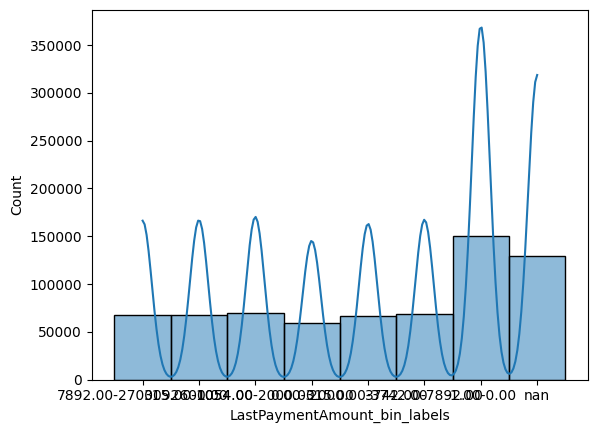

In [406]:
sns.histplot(dfhc[c], kde = True)

In [407]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   customerId                    679525 non-null  object
 1   Tonikloanid                   679525 non-null  object
 2   CBContract                    679525 non-null  object
 3   run_date                      679525 non-null  dbdate
 4   ContractInstallmentType       679525 non-null  object
 5   LastPaymentAmount             679525 non-null  int64 
 6   LastPaymentAmount_bin         679525 non-null  int64 
 7   LastPaymentAmount_bin_labels  679525 non-null  object
dtypes: dbdate(1), int64(2), object(5)
memory usage: 41.5+ MB


In [408]:
dfhc[c] = dfhc[c].astype(str)

In [409]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[c]
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,LastPaymentAmount,LastPaymentAmount_bin,LastPaymentAmount_bin_labels,joint
480212,2178134,9582fbc8-7349-46e1-8954-42c7f5052efc,J00192673,2023-10-17,Granted,0,0,-1.00-0.00,Granted_-1.00-0.00
616693,2203581,825a75d1-829d-4ab9-8c5b-a22f54a46be7,G02670249,2023-08-23,Granted,-1,0,nan,Granted_nan
542384,2373141,9377b4a6-50da-4495-9134-ee0b87f231d7,G04085147,2024-01-19,Granted,-1,0,nan,Granted_nan
535342,2031282,68944795-7257-4e5c-ad5e-7771879ee7a6,M04662750,2023-05-06,Granted,0,0,-1.00-0.00,Granted_-1.00-0.00
388890,2185425,1fb2e9ba-787d-4f11-8627-9b160b54505f,304821854,2023-08-12,Granted,758,2,315.00-1054.00,Granted_315.00-1054.00
475687,2114902,cb762e66-9281-4b74-bb0e-374c019638f2,J00531489,2023-07-01,Granted,0,0,-1.00-0.00,Granted_-1.00-0.00


In [410]:
dfhc.joint.value_counts()

Granted_-1.00-0.00               150718
NotGranted_nan                    87886
Granted_1054.00-2000.00           69379
Granted_3742.00-7892.00           68161
Granted_315.00-1054.00            68057
Granted_7892.00-2700092600.00     67740
Granted_2000.00-3742.00           66421
Granted_0.00-315.00               59192
Granted_nan                       41971
Name: joint, dtype: int64

In [411]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


CBContract                                              \
joint      Granted_-1.00-0.00 Granted_0.00-315.00 Granted_1054.00-2000.00   
customerId                                                                  
2363400                   NaN                 NaN                     NaN   
1457952                   2.0                 NaN                     1.0   
1862033                   NaN                 NaN                     NaN   
2326419                   1.0                 NaN                     NaN   
2178051                   1.0                 NaN                     NaN   

                                                           \
joint      Granted_2000.00-3742.00 Granted_315.00-1054.00   
customerId                                                  
2363400                        NaN                    NaN   
1457952                        NaN                    NaN   
1862033                        NaN                    NaN   
2326419                        NaN                    NaN   
2178051                        1.0                    NaN   

                                                                              \
joint      Granted_3742.00-7892.00 Granted_7892.00-2700092600.00 Granted_nan   
customerId                                                                     
2363400                        1.0                           1.0         NaN   
1457952                        NaN                           NaN         NaN   
1862033                        NaN                           NaN         NaN   
2326419                        NaN                           NaN         NaN   
2178051                        2.0                           NaN         NaN   

                                 Tonikloanid                      \
joint      NotGranted_nan Granted_-1.00-0.00 Granted_0.00-315.00   
customerId                                                         
2363400               NaN                NaN                 NaN   
1457952               NaN                1.0                 NaN   
1862033               1.0                NaN                 NaN   
2326419               NaN                1.0                 NaN   
2178051               2.0                2.0                 NaN   

                                                            \
joint      Granted_1054.00-2000.00 Granted_2000.00-3742.00   
customerId                                                   
2363400                        NaN                     NaN   
1457952                        1.0                     NaN   
1862033                        NaN                     NaN   
2326419                        NaN                     NaN   
2178051                        NaN                     1.0   

                                                           \
joint      Granted_315.00-1054.00 Granted_3742.00-7892.00   
customerId                                                  
2363400                       NaN                     1.0   
1457952                       NaN                     NaN   
1862033                       NaN                     NaN   
2326419                       NaN                     NaN   
2178051                       NaN                     1.0   

                                                                     
joint      Granted_7892.00-2700092600.00 Granted_nan NotGranted_nan  
customerId                                                           
2363400                              1.0         NaN            NaN  
1457952                              NaN         NaN            NaN  
1862033                              NaN         NaN            1.0  
2326419                              NaN         NaN            NaN  
2178051                              NaN         NaN            2.0

In [412]:
result_pivot.columns.value_counts()

(CBContract, Granted_-1.00-0.00)                1
(CBContract, Granted_0.00-315.00)               1
(Tonikloanid, Granted_nan)                      1
(Tonikloanid, Granted_7892.00-2700092600.00)    1
(Tonikloanid, Granted_3742.00-7892.00)          1
(Tonikloanid, Granted_315.00-1054.00)           1
(Tonikloanid, Granted_2000.00-3742.00)          1
(Tonikloanid, Granted_1054.00-2000.00)          1
(Tonikloanid, Granted_0.00-315.00)              1
(Tonikloanid, Granted_-1.00-0.00)               1
(CBContract, NotGranted_nan)                    1
(CBContract, Granted_nan)                       1
(CBContract, Granted_7892.00-2700092600.00)     1
(CBContract, Granted_3742.00-7892.00)           1
(CBContract, Granted_315.00-1054.00)            1
(CBContract, Granted_2000.00-3742.00)           1
(CBContract, Granted_1054.00-2000.00)           1
(Tonikloanid, NotGranted_nan)                   1
dtype: int64

In [413]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',            'Granted_-1.00-0.00'),
            ( 'CBContract',           'Granted_0.00-315.00'),
            ( 'CBContract',       'Granted_1054.00-2000.00'),
            ( 'CBContract',       'Granted_2000.00-3742.00'),
            ( 'CBContract',        'Granted_315.00-1054.00'),
            ( 'CBContract',       'Granted_3742.00-7892.00'),
            ( 'CBContract', 'Granted_7892.00-2700092600.00'),
            ( 'CBContract',                   'Granted_nan'),
            ( 'CBContract',                'NotGranted_nan'),
            ('Tonikloanid',            'Granted_-1.00-0.00'),
            ('Tonikloanid',           'Granted_0.00-315.00'),
            ('Tonikloanid',       'Granted_1054.00-2000.00'),
            ('Tonikloanid',       'Granted_2000.00-3742.00'),
            ('Tonikloanid',        'Granted_315.00-1054.00'),
            ('Tonikloanid',       'Granted_3742.00-7892.00'),
            ('Tonikloanid', 'Granted_7892.00-2700092600.00'),
        

In [414]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,LastPaymentAmount_CBContract_Granted_-1.00-0.00,LastPaymentAmount_CBContract_Granted_0.00-315.00,LastPaymentAmount_CBContract_Granted_1054.00-2000.00,LastPaymentAmount_CBContract_Granted_2000.00-3742.00,LastPaymentAmount_CBContract_Granted_315.00-1054.00,LastPaymentAmount_CBContract_Granted_3742.00-7892.00,LastPaymentAmount_CBContract_Granted_7892.00-2700092600.00,LastPaymentAmount_CBContract_Granted_nan,LastPaymentAmount_CBContract_NotGranted_nan,LastPaymentAmount_Tonikloanid_Granted_-1.00-0.00,LastPaymentAmount_Tonikloanid_Granted_0.00-315.00,LastPaymentAmount_Tonikloanid_Granted_1054.00-2000.00,LastPaymentAmount_Tonikloanid_Granted_2000.00-3742.00,LastPaymentAmount_Tonikloanid_Granted_315.00-1054.00,LastPaymentAmount_Tonikloanid_Granted_3742.00-7892.00,LastPaymentAmount_Tonikloanid_Granted_7892.00-2700092600.00,LastPaymentAmount_Tonikloanid_Granted_nan,LastPaymentAmount_Tonikloanid_NotGranted_nan
0,1000001,3.0,NaN,NaN,NaN,NaN,1.0,4.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,2.0
1,1000085,7.0,1.0,NaN,2.0,1.0,NaN,2.0,NaN,2.0,2.0,2.0,NaN,2.0,2.0,NaN,2.0,NaN,2.0
2,1000192,5.0,NaN,1.0,3.0,NaN,2.0,NaN,1.0,3.0,2.0,NaN,1.0,2.0,NaN,2.0,NaN,2.0,2.0
3,1000243,3.0,NaN,5.0,5.0,5.0,3.0,7.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1000278,10.0,NaN,2.0,5.0,NaN,7.0,13.0,2.0,10.0,3.0,NaN,3.0,3.0,NaN,3.0,3.0,3.0,3.0


In [415]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [416]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [417]:
df.to_csv("cicdata_20240226.csv", index = False)

In [418]:
df_result.to_csv(f"{a}.csv")

In [419]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 459)
The size of df is:	45026523
the number of dimensions of df is:	2


# LastPaymentDate

In [420]:
a = 'LastPaymentDate'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
-- coalesce({a}, '-1') {a}
date_diff(date(run_date), date({a}), Month) {a}
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID fdab91f9-a051-45c7-b367-1b536c6a0c73 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [427]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,Lastpaymentmonthtorundate
379932,2234293,3136a698-69ab-4d76-9c3d-68b02abfd168,F03080829,2023-09-15,Granted,21
349467,2178596,0851b71a-9df3-4b92-958a-0cf84f2da8dc,B04909702,2023-08-08,NotGranted,-1
301052,2225850,621b8eff-b1f0-4cdf-99a4-bbdb2db79f80,B05116706,2023-09-08,NotGranted,-1
204434,1784882,63a1d0fa-83e1-4758-8f83-eb2b417a5aff,404428764,2023-03-04,NotGranted,-1
407998,1770221,ffbd436b-94a7-41ad-afe0-134192fcff36,604236942,2024-01-19,Granted,-1
88570,1206111,fc0ddb63-97a9-45fc-b80f-4eb6bd8a96cd,R04392037,2023-10-05,Granted,4


In [422]:
dfhc[a] = dfhc[a].fillna(-1)

In [424]:
dfhc.rename(columns = {a:'Lastpaymentmonthtorundate'}, inplace = True)

In [428]:
a = 'Lastpaymentmonthtorundate'

In [429]:
dfhc.dtypes

customerId                   object
Tonikloanid                  object
CBContract                   object
run_date                     dbdate
ContractInstallmentType      object
Lastpaymentmonthtorundate     Int64
dtype: object

In [430]:
dfhc[a].describe()

count     679525.0
mean      9.762366
std      23.125259
min           -1.0
25%           -1.0
50%           -1.0
75%           13.0
max          315.0
Name: Lastpaymentmonthtorundate, dtype: Float64

In [431]:
dfhc[a] = dfhc[a].astype(np.int64)

In [432]:
dfhc.dtypes

customerId                   object
Tonikloanid                  object
CBContract                   object
run_date                     dbdate
ContractInstallmentType      object
Lastpaymentmonthtorundate     int64
dtype: object

In [433]:
# def create_bins(df, column_name, bin_edges, bin_labels):
#     # Create a new column based on the specified bins and labels
#     new_column_name = f'{column_name}_bin'
#     df[new_column_name] = pd.cut(df[column_name], bins=bin_edges, labels=bin_labels, right=False)
#     return df

# # Assuming your dataframe is named 'df'

# # Define bin edges and labels for 'ContractStatus_CV'
# bins_contract_status_cv = [-float('inf'), 0, 25, 55, 75, float('inf')]
# labels_contract_status_cv = ['-1', '0', '1-25', '25-55', '55']


In [434]:
dfhc[a].unique()

array([ -1,  13,   6,  10,   2,  28,  12,  38,  21,  23,  65,   9,  14,
        74,  37,  15,  55,  17,  41,  16,  59,  49,  29,  36,  42,   8,
        22,  45,  67, 124,  50,  44,   5,   1,  24,  19,   3,  68,   7,
       127,  30,  94,  27,  70,  25,  39,  43,  64,  99,  11,  20,  69,
        90,  46,  89,  87,  60,  48,  26,  72,  53,  96, 105,  31,  52,
        18,  81, 113, 110,  95,   4,  98,  51,  54,  77, 100, 126,  85,
       182,  34,  71,  33,  63,  66,  57,  73,  47, 180,  82,  76,  83,
        86, 111,  40, 140,  58,  32,  35, 164,  61,  92,  84,  78, 138,
       103, 139, 169,  79, 119,  93,  75,  56, 192, 118,  97, 133, 125,
       129, 231, 144, 131,  88, 157, 102, 132, 220, 213, 196, 155, 122,
        91, 108,  80, 136, 163, 154, 149, 115, 161, 128, 121, 109, 191,
       114, 117, 184, 174, 186, 151, 137,  62, 158, 172, 156, 135, 167,
       205, 148, 104, 165, 123, 134, 116, 147, 160, 175, 177, 101, 189,
       107, 106, 120, 170, 188, 218, 145, 159, 247, 199, 190, 11

In [435]:
import pandas as pd

# Create 5 bins with labels
num_bins = 5
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
# Perform binning using pandas cut
dfhc[b] = pd.cut(dfhc[a], bins=num_bins, labels=bin_labels, precision=3, duplicates='drop')


In [436]:
dfhc.sample(10)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,Lastpaymentmonthtorundate,Lastpaymentmonthtorundate_bin
396565,2139936,a5dfbddf-640d-4652-a699-bf4ee16bdeb2,J00409289,2023-11-13,Granted,-1,Very Low
318416,2261108,135b4350-bd8e-4ad3-aee9-de86e42096f3,E05047013,2023-10-05,Granted,19,Very Low
518546,2010379,d0773dd9-6e92-4b02-82c1-2f7bb04b9b21,403266343,2023-04-23,Granted,-1,Very Low
259480,2096443,2fcfde81-f5db-41d2-8093-026e7316a1c0,I04720438,2023-06-16,Granted,-1,Very Low
402648,2360469,6951db72-cd64-40af-8f5d-0a44425ee6e1,703735431,2024-01-06,Granted,-1,Very Low
578033,1848917,34f65db8-f4ce-4525-aec7-b61fc8cee65f,G04396532,2023-09-01,Granted,-1,Very Low
376226,2267979,406c0ddf-0b53-4dfb-84e1-34f6ce1f2012,K05110890,2023-10-25,Granted,-1,Very Low
11862,2097487,544c76ef-4470-4afe-ab56-2250f559efe9,H04480282,2023-06-17,NotGranted,-1,Very Low
453990,2218675,b9b546c7-00e1-406f-be44-0d217ed89bf2,704205314,2023-09-02,Granted,-1,Very Low
368254,1969879,aec197ea-7752-4954-a1e2-9712b6133447,104220224,2023-09-29,Granted,16,Very Low


In [437]:
dfhc[b].value_counts()

Very Low     652645
Low           22437
Medium         3583
High            781
Very High        79
Name: Lastpaymentmonthtorundate_bin, dtype: int64

In [438]:
min_scores = dfhc.groupby(b)[a].transform('min')
max_scores = dfhc.groupby(b)[a].transform('max')
# Create a new column combining ScoreRange, min(ScoreRaw), and max(ScoreRaw)
dfhc[b] = dfhc[b].astype(str) + '_Min' + min_scores.astype(str) + '_Max' + max_scores.astype(str)
dfhc[b].value_counts()

Very Low_Min-1_Max62       652645
Low_Min63_Max125            22437
Medium_Min126_Max188         3583
High_Min189_Max251            781
Very High_Min252_Max315        79
Name: Lastpaymentmonthtorundate_bin, dtype: int64

In [439]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# # Replace 'X' with the actual column name if it's different

# # Create an imputer and fit_transform the data
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
# X_imputed = imputer.fit_transform(dfhc[[a]])

# # Convert the imputed values to a pandas Series
# X_imputed_series = pd.Series(X_imputed.flatten())
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# c = f'{a}_{a1}_{a2}'
# # Perform quantile binning using pandas qcut
# num_quantiles = 10
# dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_quantiles, labels=False, retbins=True, precision=3, duplicates='drop')

# # Assign bin edges as labels
# label_edges = np.round(bin_edges, 2)
# dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# # Convert the Category datatype to string
# dfhc[c] = dfhc[c].astype(str)

# # Display the value counts of the new column
# print(dfhc[c].value_counts())


<AxesSubplot: xlabel='Lastpaymentmonthtorundate_bin', ylabel='Count'>

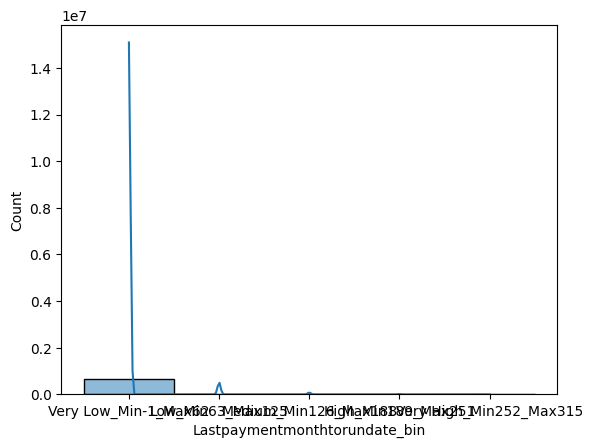

In [442]:
sns.histplot(dfhc[b], kde = True)

In [443]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   customerId                     679525 non-null  object
 1   Tonikloanid                    679525 non-null  object
 2   CBContract                     679525 non-null  object
 3   run_date                       679525 non-null  dbdate
 4   ContractInstallmentType        679525 non-null  object
 5   Lastpaymentmonthtorundate      679525 non-null  int64 
 6   Lastpaymentmonthtorundate_bin  679525 non-null  object
dtypes: dbdate(1), int64(1), object(5)
memory usage: 36.3+ MB


In [444]:
dfhc[b] = dfhc[b].astype(str)

In [445]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[b]
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,Lastpaymentmonthtorundate,Lastpaymentmonthtorundate_bin,joint
596164,2184137,b4edfb33-3bcb-4443-b4ad-7e643f8c17c8,T02562513,2023-08-11,Granted,-1,Very Low_Min-1_Max62,Granted_Very Low_Min-1_Max62
136341,2183624,324c553d-eaa6-472a-8624-1fb9a8ef9013,703725675,2023-08-11,Granted,9,Very Low_Min-1_Max62,Granted_Very Low_Min-1_Max62
265554,1557551,a0fa7bea-cbe3-49fd-a904-00bcea8b9f61,004250205,2023-04-28,Granted,-1,Very Low_Min-1_Max62,Granted_Very Low_Min-1_Max62
542669,2244867,0e349e4c-57e4-473f-b57d-7c29c82bfa6b,204854808,2023-09-23,Granted,-1,Very Low_Min-1_Max62,Granted_Very Low_Min-1_Max62
230222,2285608,22b4318d-3c41-4a00-a049-1d7d5865aaa1,C02959800,2023-10-27,Granted,-1,Very Low_Min-1_Max62,Granted_Very Low_Min-1_Max62
22206,1964636,a174cf35-d35b-4e41-b105-ce8b102b1ef6,601887952,2023-03-31,Granted,-1,Very Low_Min-1_Max62,Granted_Very Low_Min-1_Max62


In [446]:
dfhc.joint.value_counts()

Granted_Very Low_Min-1_Max62       564759
NotGranted_Very Low_Min-1_Max62     87886
Granted_Low_Min63_Max125            22437
Granted_Medium_Min126_Max188         3583
Granted_High_Min189_Max251            781
Granted_Very High_Min252_Max315        79
Name: joint, dtype: int64

In [447]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


CBContract                           \
joint      Granted_High_Min189_Max251 Granted_Low_Min63_Max125   
customerId                                                       
1914856                           NaN                      8.0   
2174464                           NaN                      NaN   
2118321                           NaN                      NaN   
1907897                           NaN                      NaN   
2095350                           NaN                      NaN   

                                                                         \
joint      Granted_Medium_Min126_Max188 Granted_Very High_Min252_Max315   
customerId                                                                
1914856                             NaN                             NaN   
2174464                             NaN                             NaN   
2118321                             NaN                             NaN   
1907897                             NaN                             NaN   
2095350                             NaN                             NaN   

                                                                         \
joint      Granted_Very Low_Min-1_Max62 NotGranted_Very Low_Min-1_Max62   
customerId                                                                
1914856                             5.0                             NaN   
2174464                             1.0                             NaN   
2118321                             1.0                             NaN   
1907897                            12.0                             1.0   
2095350                             1.0                             NaN   

                          Tonikloanid                           \
joint      Granted_High_Min189_Max251 Granted_Low_Min63_Max125   
customerId                                                       
1914856                           NaN                      1.0   
2174464                           NaN                      NaN   
2118321                           NaN                      NaN   
1907897                           NaN                      NaN   
2095350                           NaN                      NaN   

                                                                         \
joint      Granted_Medium_Min126_Max188 Granted_Very High_Min252_Max315   
customerId                                                                
1914856                             NaN                             NaN   
2174464                             NaN                             NaN   
2118321                             NaN                             NaN   
1907897                             NaN                             NaN   
2095350                             NaN                             NaN   

                                                                         
joint      Granted_Very Low_Min-1_Max62 NotGranted_Very Low_Min-1_Max62  
customerId                                                               
1914856                             1.0                             NaN  
2174464                             1.0                             NaN  
2118321                             1.0                             NaN  
1907897                             1.0                             1.0  
2095350                             1.0                             NaN

In [448]:
result_pivot.columns.value_counts()

(CBContract, Granted_High_Min189_Max251)          1
(CBContract, Granted_Low_Min63_Max125)            1
(CBContract, Granted_Medium_Min126_Max188)        1
(CBContract, Granted_Very High_Min252_Max315)     1
(CBContract, Granted_Very Low_Min-1_Max62)        1
(CBContract, NotGranted_Very Low_Min-1_Max62)     1
(Tonikloanid, Granted_High_Min189_Max251)         1
(Tonikloanid, Granted_Low_Min63_Max125)           1
(Tonikloanid, Granted_Medium_Min126_Max188)       1
(Tonikloanid, Granted_Very High_Min252_Max315)    1
(Tonikloanid, Granted_Very Low_Min-1_Max62)       1
(Tonikloanid, NotGranted_Very Low_Min-1_Max62)    1
dtype: int64

In [449]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',      'Granted_High_Min189_Max251'),
            ( 'CBContract',        'Granted_Low_Min63_Max125'),
            ( 'CBContract',    'Granted_Medium_Min126_Max188'),
            ( 'CBContract', 'Granted_Very High_Min252_Max315'),
            ( 'CBContract',    'Granted_Very Low_Min-1_Max62'),
            ( 'CBContract', 'NotGranted_Very Low_Min-1_Max62'),
            ('Tonikloanid',      'Granted_High_Min189_Max251'),
            ('Tonikloanid',        'Granted_Low_Min63_Max125'),
            ('Tonikloanid',    'Granted_Medium_Min126_Max188'),
            ('Tonikloanid', 'Granted_Very High_Min252_Max315'),
            ('Tonikloanid',    'Granted_Very Low_Min-1_Max62'),
            ('Tonikloanid', 'NotGranted_Very Low_Min-1_Max62')],
           names=[None, 'joint'])

In [450]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,Lastpaymentmonthtorundate_CBContract_Granted_High_Min189_Max251,Lastpaymentmonthtorundate_CBContract_Granted_Low_Min63_Max125,Lastpaymentmonthtorundate_CBContract_Granted_Medium_Min126_Max188,Lastpaymentmonthtorundate_CBContract_Granted_Very High_Min252_Max315,Lastpaymentmonthtorundate_CBContract_Granted_Very Low_Min-1_Max62,Lastpaymentmonthtorundate_CBContract_NotGranted_Very Low_Min-1_Max62,Lastpaymentmonthtorundate_Tonikloanid_Granted_High_Min189_Max251,Lastpaymentmonthtorundate_Tonikloanid_Granted_Low_Min63_Max125,Lastpaymentmonthtorundate_Tonikloanid_Granted_Medium_Min126_Max188,Lastpaymentmonthtorundate_Tonikloanid_Granted_Very High_Min252_Max315,Lastpaymentmonthtorundate_Tonikloanid_Granted_Very Low_Min-1_Max62,Lastpaymentmonthtorundate_Tonikloanid_NotGranted_Very Low_Min-1_Max62
0,1000001,NaN,1.0,NaN,NaN,7.0,2.0,NaN,3.0,NaN,NaN,3.0,2.0
1,1000085,NaN,3.0,NaN,NaN,10.0,2.0,NaN,2.0,NaN,NaN,2.0,2.0
2,1000192,NaN,NaN,2.0,NaN,10.0,3.0,NaN,NaN,2.0,NaN,2.0,2.0
3,1000243,NaN,NaN,NaN,NaN,29.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
4,1000278,NaN,NaN,NaN,NaN,38.0,10.0,NaN,NaN,NaN,NaN,3.0,3.0


In [451]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [452]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [453]:
df.to_csv("cicdata_20240226.csv", index = False)

In [454]:
df_result.to_csv(f"{a}.csv")

In [455]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 471)
The size of df is:	46203687
the number of dimensions of df is:	2


# NextPaymentDate

In [456]:
a = 'NextPaymentDate'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
-- coalesce({a}, '-1') {a}
date_diff(date(run_date), date({a}), Month) {a}
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID cba28856-4cc8-4c1e-92e5-d5ecf3907375 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [457]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,NextPaymentDate
456104,1901634,1d1d035e-0ee0-4cfe-a52d-04c9b862b775,Q03112232,2023-02-15,Granted,<NA>
599151,1779805,72a51882-38d4-4407-adc5-1103dd5977be,304218451,2024-01-28,Granted,<NA>
647557,2209984,3579988a-36be-49b1-8930-dace4234387e,104744524,2023-08-28,Granted,<NA>
408452,1480827,8efd0e51-d99a-4b41-8522-a0bbd9d0081b,Q02990727,2023-04-13,Granted,<NA>
647269,1993907,27e80c5b-9af4-4756-b3fb-cc365e470223,605049555,2024-01-25,Granted,<NA>
583073,2122968,5983c9a6-9309-4988-b287-8b8dee2cfff9,R00728655,2023-07-18,Granted,<NA>


In [458]:
dfhc[a] = dfhc[a].fillna(-1)

In [459]:
dfhc.rename(columns = {a:'Nextpaymentmonthtorundate'}, inplace = True)

In [460]:
a = 'Nextpaymentmonthtorundate'

In [461]:
dfhc.dtypes

customerId                   object
Tonikloanid                  object
CBContract                   object
run_date                     dbdate
ContractInstallmentType      object
Nextpaymentmonthtorundate     Int64
dtype: object

In [462]:
dfhc[a].describe()

count      679525.0
mean      -0.401535
std      150.891079
min        -11725.0
25%            -1.0
50%            -1.0
75%            -1.0
max           220.0
Name: Nextpaymentmonthtorundate, dtype: Float64

In [463]:
dfhc[a] = dfhc[a].astype(np.int64)

<AxesSubplot: >

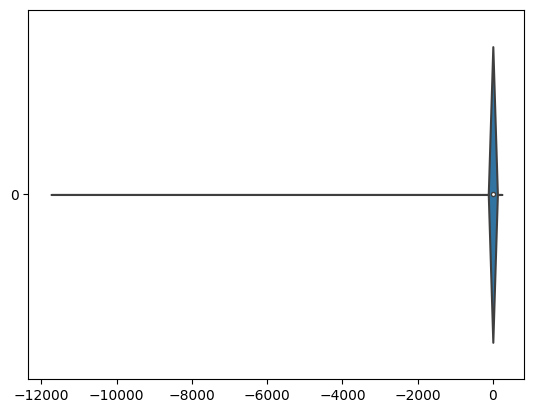

In [465]:
sns.violinplot(dfhc[a], orient='h')

In [466]:
dfhc.dtypes

customerId                   object
Tonikloanid                  object
CBContract                   object
run_date                     dbdate
ContractInstallmentType      object
Nextpaymentmonthtorundate     int64
dtype: object

In [467]:
# def create_bins(df, column_name, bin_edges, bin_labels):
#     # Create a new column based on the specified bins and labels
#     new_column_name = f'{column_name}_bin'
#     df[new_column_name] = pd.cut(df[column_name], bins=bin_edges, labels=bin_labels, right=False)
#     return df

# # Assuming your dataframe is named 'df'

# # Define bin edges and labels for 'ContractStatus_CV'
# bins_contract_status_cv = [-float('inf'), 0, 25, 55, 75, float('inf')]
# labels_contract_status_cv = ['-1', '0', '1-25', '25-55', '55']


In [468]:
dfhc[a].unique()

array([    -1,      0,     22,      1,     20,     26,     36,      4,
           21,     27,      9,      8,      6,     10,     14,     72,
            3,     16,     40,     17,     97,     24,     19,     25,
           11,     64,    154,     74,     13,      2,     28,     56,
           63,      7,     12,     18,     15,     69,     83,      5,
          165,     39,     71,     37,     91,     88,     52,     78,
           80,     55,     41,     70,     34,     68,     45,     43,
           58,     54,     50,     42,     23,     30,    105,     32,
           35,     53,     75,     51,     89,    109,     44,     93,
           49,    159,    111,     85,     76,     77,     90,     67,
           92,     46,     73,     31,    126,     33,     95,     66,
           96, -11722,     48,     62,     61,    116,     99,     38,
           47,     94,     87,     65,    179,     59,     29,     86,
           57,    -14,    138,     98, -11723,    108,     60,     82,
      

In [469]:
import pandas as pd

# Create 5 bins with labels
num_bins = 5
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
# Perform binning using pandas cut
dfhc[b] = pd.cut(dfhc[a], bins=num_bins, labels=bin_labels, precision=3, duplicates='drop')


In [470]:
dfhc.sample(10)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,Nextpaymentmonthtorundate,Nextpaymentmonthtorundate_bin
396858,2268519,1e3fd45d-ff5d-4528-a7b0-2b95f92110a3,203601961,2023-10-11,Granted,-1,Very High
277882,2137913,b2affa95-63cc-4d1b-9ac4-48447c2c399a,N04258602,2023-07-15,Granted,-1,Very High
145365,2344871,c6ab040a-b7dd-481e-92e1-166a9881508a,L04806360,2023-12-23,Granted,-1,Very High
424143,2142627,0f0b0bae-b55e-4083-86ff-618ecb57ddde,A04199542,2023-07-21,Granted,-1,Very High
642576,1710580,034c35fc-74eb-4690-9bdf-3ac139c5377e,O04747625,2024-02-03,Granted,-1,Very High
541909,2332811,8e35f255-07f8-4a6b-bf32-6b7071704eb4,M00531092,2023-12-13,Granted,-1,Very High
270859,2192202,e3b4f943-3b98-4bfc-8774-3395b2153455,604465154,2023-08-28,Granted,-1,Very High
237513,1781840,22ab6adc-54f2-4383-9c92-e3b809017297,S04400657,2023-05-31,Granted,-1,Very High
391981,2055827,d7b606c0-f10a-4962-92f8-d3a1c11ed62d,D03507027,2023-10-03,Granted,-1,Very High
283569,1687750,5059dc9d-e81c-4482-8076-c3145d4bfda6,703002276,2023-04-16,Granted,9,Very High


In [471]:
dfhc[b].value_counts()

Very High    679413
Very Low        112
Low               0
Medium            0
High              0
Name: Nextpaymentmonthtorundate_bin, dtype: int64

In [472]:
min_scores = dfhc.groupby(b)[a].transform('min')
max_scores = dfhc.groupby(b)[a].transform('max')
# Create a new column combining ScoreRange, min(ScoreRaw), and max(ScoreRaw)
dfhc[b] = dfhc[b].astype(str) + '_Min' + min_scores.astype(str) + '_Max' + max_scores.astype(str)
dfhc[b].value_counts()

Very High_Min-197.0_Max220.0        679413
Very Low_Min-11725.0_Max-11715.0       112
Name: Nextpaymentmonthtorundate_bin, dtype: int64

In [473]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# Replace 'X' with the actual column name if it's different

# Create an imputer and fit_transform the data
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X_imputed = imputer.fit_transform(dfhc[[a]])

# Convert the imputed values to a pandas Series
X_imputed_series = pd.Series(X_imputed.flatten())
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
c = f'{a}_{a1}_{a2}'
# Perform quantile binning using pandas qcut
num_quantiles = 10
dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_quantiles, labels=False, retbins=True, precision=3, duplicates='drop')

# Assign bin edges as labels
label_edges = np.round(bin_edges, 2)
dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# Convert the Category datatype to string
dfhc[c] = dfhc[c].astype(str)

# Display the value counts of the new column
print(dfhc[c].value_counts())


-11725.00--1.00    607694
0.00-220.00         64658
-1.00-0.00           7171
nan                     2
Name: Nextpaymentmonthtorundate_bin_labels, dtype: int64


<AxesSubplot: xlabel='Nextpaymentmonthtorundate_bin_labels', ylabel='Count'>

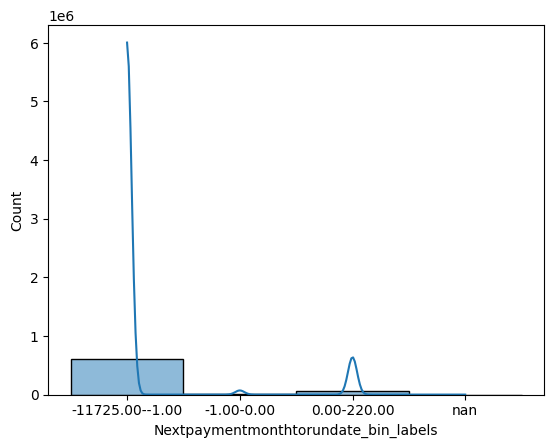

In [474]:
sns.histplot(dfhc[c], kde = True)

In [475]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 8 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   customerId                            679525 non-null  object
 1   Tonikloanid                           679525 non-null  object
 2   CBContract                            679525 non-null  object
 3   run_date                              679525 non-null  dbdate
 4   ContractInstallmentType               679525 non-null  object
 5   Nextpaymentmonthtorundate             679525 non-null  int64 
 6   Nextpaymentmonthtorundate_bin         679525 non-null  int64 
 7   Nextpaymentmonthtorundate_bin_labels  679525 non-null  object
dtypes: dbdate(1), int64(2), object(5)
memory usage: 41.5+ MB


In [476]:
dfhc[c] = dfhc[c].astype(str)

In [477]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[c]
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,Nextpaymentmonthtorundate,Nextpaymentmonthtorundate_bin,Nextpaymentmonthtorundate_bin_labels,joint
476119,1635528,01fe59d2-359e-4c0f-86a1-2a9bce60f10c,004542463,2023-07-15,Granted,-1,0,-11725.00--1.00,Granted_-11725.00--1.00
393222,1515336,74bc59e2-e697-4cc6-ab21-704dd1e5e04f,803668502,2023-02-15,Granted,-1,0,-11725.00--1.00,Granted_-11725.00--1.00
342887,1511774,63fd9ef9-0136-4bcd-9f36-bd0558ea4730,N02839879,2023-03-03,Granted,-1,0,-11725.00--1.00,Granted_-11725.00--1.00
95158,2325099,5725c4f9-a1c5-437d-b4f7-d3dcabf9ec23,E04485714,2023-12-06,Granted,-1,0,-11725.00--1.00,Granted_-11725.00--1.00
309580,2027124,37a5f8dc-1c62-463b-9bf5-058b18bbef02,401104056,2023-08-17,Granted,-1,0,-11725.00--1.00,Granted_-11725.00--1.00
658987,2219852,8d5035a5-b505-49a0-881c-79e80028ec1c,N01740879,2023-09-03,Granted,-1,0,-11725.00--1.00,Granted_-11725.00--1.00


In [478]:
dfhc.joint.value_counts()

Granted_-11725.00--1.00       519808
NotGranted_-11725.00--1.00     87886
Granted_0.00-220.00            64658
Granted_-1.00-0.00              7171
Granted_nan                        2
Name: joint, dtype: int64

In [479]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


CBContract                                              \
joint      Granted_-1.00-0.00 Granted_-11725.00--1.00 Granted_0.00-220.00   
customerId                                                                  
2245780                   NaN                     1.0                 NaN   
2353551                   NaN                     1.0                 NaN   
1619676                   NaN                     2.0                 NaN   
1739186                   NaN                     NaN                 NaN   
2150238                   NaN                     1.0                 NaN   

                                                         Tonikloanid  \
joint      Granted_nan NotGranted_-11725.00--1.00 Granted_-1.00-0.00   
customerId                                                             
2245780            NaN                        NaN                NaN   
2353551            NaN                        NaN                NaN   
1619676            NaN                        2.0                NaN   
1739186            NaN                        1.0                NaN   
2150238            NaN                        NaN                NaN   

                                                                    \
joint      Granted_-11725.00--1.00 Granted_0.00-220.00 Granted_nan   
customerId                                                           
2245780                        1.0                 NaN         NaN   
2353551                        1.0                 NaN         NaN   
1619676                        2.0                 NaN         NaN   
1739186                        NaN                 NaN         NaN   
2150238                        1.0                 NaN         NaN   

                                       
joint      NotGranted_-11725.00--1.00  
customerId                             
2245780                           NaN  
2353551                           NaN  
1619676                           1.0  
1739186                           1.0  
2150238                           NaN

In [480]:
result_pivot.columns.value_counts()

(CBContract, Granted_-1.00-0.00)             1
(CBContract, Granted_-11725.00--1.00)        1
(CBContract, Granted_0.00-220.00)            1
(CBContract, Granted_nan)                    1
(CBContract, NotGranted_-11725.00--1.00)     1
(Tonikloanid, Granted_-1.00-0.00)            1
(Tonikloanid, Granted_-11725.00--1.00)       1
(Tonikloanid, Granted_0.00-220.00)           1
(Tonikloanid, Granted_nan)                   1
(Tonikloanid, NotGranted_-11725.00--1.00)    1
dtype: int64

In [481]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',         'Granted_-1.00-0.00'),
            ( 'CBContract',    'Granted_-11725.00--1.00'),
            ( 'CBContract',        'Granted_0.00-220.00'),
            ( 'CBContract',                'Granted_nan'),
            ( 'CBContract', 'NotGranted_-11725.00--1.00'),
            ('Tonikloanid',         'Granted_-1.00-0.00'),
            ('Tonikloanid',    'Granted_-11725.00--1.00'),
            ('Tonikloanid',        'Granted_0.00-220.00'),
            ('Tonikloanid',                'Granted_nan'),
            ('Tonikloanid', 'NotGranted_-11725.00--1.00')],
           names=[None, 'joint'])

In [482]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,Nextpaymentmonthtorundate_CBContract_Granted_-1.00-0.00,Nextpaymentmonthtorundate_CBContract_Granted_-11725.00--1.00,Nextpaymentmonthtorundate_CBContract_Granted_0.00-220.00,Nextpaymentmonthtorundate_CBContract_Granted_nan,Nextpaymentmonthtorundate_CBContract_NotGranted_-11725.00--1.00,Nextpaymentmonthtorundate_Tonikloanid_Granted_-1.00-0.00,Nextpaymentmonthtorundate_Tonikloanid_Granted_-11725.00--1.00,Nextpaymentmonthtorundate_Tonikloanid_Granted_0.00-220.00,Nextpaymentmonthtorundate_Tonikloanid_Granted_nan,Nextpaymentmonthtorundate_Tonikloanid_NotGranted_-11725.00--1.00
0,1000001,NaN,8.0,NaN,NaN,2.0,NaN,3.0,NaN,NaN,2.0
1,1000085,NaN,8.0,5.0,NaN,2.0,NaN,2.0,2.0,NaN,2.0
2,1000192,1.0,11.0,1.0,NaN,3.0,1.0,2.0,2.0,NaN,2.0
3,1000243,1.0,17.0,11.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0
4,1000278,NaN,37.0,1.0,NaN,10.0,NaN,3.0,3.0,NaN,3.0


In [483]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [484]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [485]:
df.to_csv("cicdata_20240226.csv", index = False)

In [486]:
df_result.to_csv(f"{a}.csv")

In [487]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 481)
The size of df is:	47184657
the number of dimensions of df is:	2


# OutstandingBalance

In [488]:
a = 'OutstandingBalance'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, '-1') {a}
-- date_diff(date(run_date), date({a}), Month) {a}
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID 686e72b6-d601-4c7a-afe2-b97ec904e371 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [489]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,OutstandingBalance
671885,1842924,4fd46129-3541-4d56-b690-c525d445c2dd,Q04432952,2023-11-11,Granted,114559
586273,1411992,f8bd6ede-da47-41ad-8d6b-8f8ebe027dbb,G02898724,2023-06-16,Granted,-1
85267,2405163,53a48e70-610d-48eb-ae72-1d01e91fd8b8,N01177003,2024-02-19,Granted,0
181594,2189683,c4c6e16f-31e3-4df0-bce8-b131935ffe35,F02993961,2023-08-15,Granted,2540
67004,2237576,e66a4c7c-f67d-43f2-8c48-091f7e4bbbc8,Q02540762,2023-09-17,Granted,19411
435939,2186761,a10e132b-7f8c-4bae-9cb5-7d2f2d772d2f,O04059098,2023-08-13,Granted,0


In [490]:
dfhc[a] = dfhc[a].fillna(-1)

In [491]:
# dfhc.rename(columns = {a:'Nextpaymentmonthtorundate'}, inplace = True)

In [492]:
# a = 'Nextpaymentmonthtorundate'

In [493]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
OutstandingBalance         object
dtype: object

In [494]:
dfhc[a].describe()

count     679525
unique     77436
top            0
freq      241046
Name: OutstandingBalance, dtype: object

In [495]:
dfhc[a] = dfhc[a].astype(np.int64)

<AxesSubplot: >

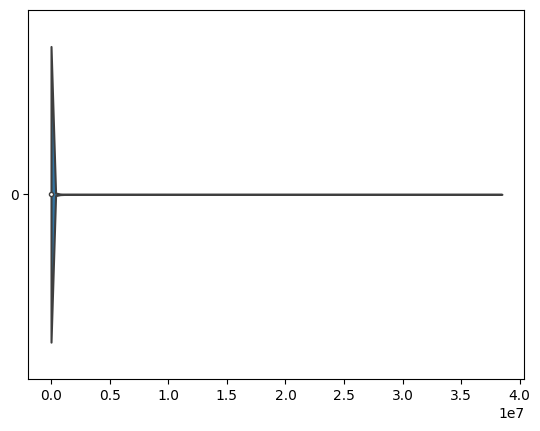

In [496]:
sns.violinplot(dfhc[a], orient='h')

In [497]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
OutstandingBalance          int64
dtype: object

In [498]:
# def create_bins(df, column_name, bin_edges, bin_labels):
#     # Create a new column based on the specified bins and labels
#     new_column_name = f'{column_name}_bin'
#     df[new_column_name] = pd.cut(df[column_name], bins=bin_edges, labels=bin_labels, right=False)
#     return df

# # Assuming your dataframe is named 'df'

# # Define bin edges and labels for 'ContractStatus_CV'
# bins_contract_status_cv = [-float('inf'), 0, 25, 55, 75, float('inf')]
# labels_contract_status_cv = ['-1', '0', '1-25', '25-55', '55']


In [499]:
dfhc[a].unique()

array([   -1,  8874, 79855, ..., 63136, 34658, 61211], dtype=int64)

In [500]:
import pandas as pd

# Create 5 bins with labels
num_bins = 5
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
# Perform binning using pandas cut
dfhc[b] = pd.cut(dfhc[a], bins=num_bins, labels=bin_labels, precision=3, duplicates='drop')


In [501]:
dfhc.sample(10)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,OutstandingBalance,OutstandingBalance_bin
25130,2221753,7ad888e7-90e9-4d02-8c18-5956ece85dd6,J03844745,2023-09-05,Granted,4114,Very Low
55646,2052806,c950af79-3741-41bf-a6e8-6a1d575b68f1,M03664549,2023-05-20,Granted,0,Very Low
591497,2368463,81e79e6c-a612-4bf8-b617-bcfa0bb86fc7,Q02416275,2024-01-14,Granted,-1,Very Low
376776,2276331,05274a9c-9c19-4fc4-a7c8-54e7bede505d,S04808797,2023-10-18,Granted,0,Very Low
502121,2263368,f59a1846-b313-4b0d-9b53-25294ac08055,801734903,2024-01-08,NotGranted,-1,Very Low
218418,2224229,21f87cf1-d072-42f3-846f-a049ce034a66,D03448820,2023-09-07,Granted,3096,Very Low
147772,2252807,ad3ad12b-7415-44a1-b8d6-f30a71389842,O03286280,2023-10-11,Granted,902,Very Low
463533,2188979,2fc64884-c35d-40d8-ada9-095696031a0e,505013421,2023-08-14,Granted,0,Very Low
261169,1819069,cc763f16-5568-4b86-b173-62f593dcd0b2,A03778920,2023-01-13,Granted,2304,Very Low
456603,1558367,6ddcf65c-8bc4-47ac-aeb7-40c6cf0d248e,O01500091,2024-01-03,Granted,3609,Very Low


In [502]:
dfhc[b].value_counts()

Very Low     679501
Low              17
Medium            3
High              3
Very High         1
Name: OutstandingBalance_bin, dtype: int64

In [503]:
min_scores = dfhc.groupby(b)[a].transform('min')
max_scores = dfhc.groupby(b)[a].transform('max')
# Create a new column combining ScoreRange, min(ScoreRaw), and max(ScoreRaw)
dfhc[b] = dfhc[b].astype(str) + '_Min' + min_scores.astype(str) + '_Max' + max_scores.astype(str)
dfhc[b].value_counts()

Very Low_Min-1_Max7018278            679501
Low_Min7757594_Max12526800               17
High_Min26334687_Max27128592              3
Medium_Min16874508_Max22943651            3
Very High_Min38462719_Max38462719         1
Name: OutstandingBalance_bin, dtype: int64

In [504]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# Replace 'X' with the actual column name if it's different

# Create an imputer and fit_transform the data
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X_imputed = imputer.fit_transform(dfhc[[a]])

# Convert the imputed values to a pandas Series
X_imputed_series = pd.Series(X_imputed.flatten())
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
c = f'{a}_{a1}_{a2}'
# Perform quantile binning using pandas qcut
num_quantiles = 10
dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_quantiles, labels=False, retbins=True, precision=3, duplicates='drop')

# Assign bin edges as labels
label_edges = np.round(bin_edges, 2)
dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# Convert the Category datatype to string
dfhc[c] = dfhc[c].astype(str)

# Display the value counts of the new column
print(dfhc[c].value_counts())


-1.00-0.00              241046
nan                     197051
6940.00-31596.00         67952
31596.00-38462719.00     67952
1139.00-6940.00          67944
0.00-1139.00             37580
Name: OutstandingBalance_bin_labels, dtype: int64


<AxesSubplot: xlabel='OutstandingBalance_bin_labels', ylabel='Count'>

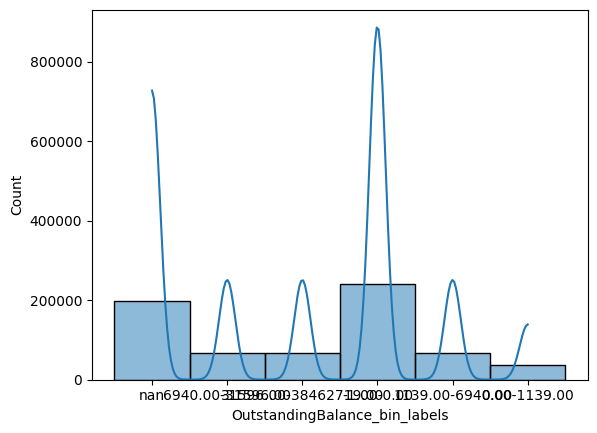

In [505]:
sns.histplot(dfhc[c], kde = True)

In [506]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   customerId                     679525 non-null  object
 1   Tonikloanid                    679525 non-null  object
 2   CBContract                     679525 non-null  object
 3   run_date                       679525 non-null  dbdate
 4   ContractInstallmentType        679525 non-null  object
 5   OutstandingBalance             679525 non-null  int64 
 6   OutstandingBalance_bin         679525 non-null  int64 
 7   OutstandingBalance_bin_labels  679525 non-null  object
dtypes: dbdate(1), int64(2), object(5)
memory usage: 41.5+ MB


In [507]:
dfhc[c] = dfhc[c].astype(str)

In [508]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[c]
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,OutstandingBalance,OutstandingBalance_bin,OutstandingBalance_bin_labels,joint
434465,2368094,44da52c6-d060-4ab6-b3da-758eefa183e9,601098990,2024-01-14,Granted,52676,4,31596.00-38462719.00,Granted_31596.00-38462719.00
582020,2229376,39bca93a-02ea-4b56-9f05-50b550028b8b,B04060754,2023-09-11,Granted,10955,3,6940.00-31596.00,Granted_6940.00-31596.00
516048,2259293,b4e93f4b-24ba-4f55-9786-a997c200f99d,T01002929,2023-10-04,Granted,104904,4,31596.00-38462719.00,Granted_31596.00-38462719.00
42030,1458949,ebbe61df-7b72-4ecf-9b87-56641ce53cd9,P06248780,2024-02-15,Granted,171,1,0.00-1139.00,Granted_0.00-1139.00
236917,2218712,ac817c9c-2d58-4cb4-9035-40278426a031,R00499114,2023-09-02,Granted,0,0,-1.00-0.00,Granted_-1.00-0.00
573799,2223987,40980b71-1853-4877-9c53-1b8a561dc253,G04388655,2023-09-07,Granted,123630,4,31596.00-38462719.00,Granted_31596.00-38462719.00


In [509]:
dfhc.joint.value_counts()

Granted_-1.00-0.00              241046
Granted_nan                     109165
NotGranted_nan                   87886
Granted_6940.00-31596.00         67952
Granted_31596.00-38462719.00     67952
Granted_1139.00-6940.00          67944
Granted_0.00-1139.00             37580
Name: joint, dtype: int64

In [510]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


CBContract                                               \
joint      Granted_-1.00-0.00 Granted_0.00-1139.00 Granted_1139.00-6940.00   
customerId                                                                   
2249806                   7.0                  NaN                     1.0   
2033895                   5.0                  NaN                     NaN   
2005357                   1.0                  NaN                     1.0   
2303545                  15.0                  NaN                     NaN   
2233074                   NaN                  NaN                     NaN   

                                                                              \
joint      Granted_31596.00-38462719.00 Granted_6940.00-31596.00 Granted_nan   
customerId                                                                     
2249806                             NaN                      NaN         1.0   
2033895                             2.0                      NaN         NaN   
2005357                             NaN                      1.0         NaN   
2303545                            16.0                      1.0         7.0   
2233074                             NaN                      NaN         NaN   

                                 Tonikloanid                       \
joint      NotGranted_nan Granted_-1.00-0.00 Granted_0.00-1139.00   
customerId                                                          
2249806               2.0                1.0                  NaN   
2033895               NaN                1.0                  NaN   
2005357               NaN                1.0                  NaN   
2303545               NaN                1.0                  NaN   
2233074               1.0                NaN                  NaN   

                                                                 \
joint      Granted_1139.00-6940.00 Granted_31596.00-38462719.00   
customerId                                                        
2249806                        1.0                          NaN   
2033895                        NaN                          1.0   
2005357                        1.0                          NaN   
2303545                        NaN                          1.0   
2233074                        NaN                          NaN   

                                                                
joint      Granted_6940.00-31596.00 Granted_nan NotGranted_nan  
customerId                                                      
2249806                         NaN         1.0            1.0  
2033895                         NaN         NaN            NaN  
2005357                         1.0         NaN            NaN  
2303545                         1.0         1.0            NaN  
2233074                         NaN         NaN            1.0

In [511]:
result_pivot.columns.value_counts()

(CBContract, Granted_-1.00-0.00)               1
(CBContract, Granted_0.00-1139.00)             1
(CBContract, Granted_1139.00-6940.00)          1
(CBContract, Granted_31596.00-38462719.00)     1
(CBContract, Granted_6940.00-31596.00)         1
(CBContract, Granted_nan)                      1
(CBContract, NotGranted_nan)                   1
(Tonikloanid, Granted_-1.00-0.00)              1
(Tonikloanid, Granted_0.00-1139.00)            1
(Tonikloanid, Granted_1139.00-6940.00)         1
(Tonikloanid, Granted_31596.00-38462719.00)    1
(Tonikloanid, Granted_6940.00-31596.00)        1
(Tonikloanid, Granted_nan)                     1
(Tonikloanid, NotGranted_nan)                  1
dtype: int64

In [512]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',           'Granted_-1.00-0.00'),
            ( 'CBContract',         'Granted_0.00-1139.00'),
            ( 'CBContract',      'Granted_1139.00-6940.00'),
            ( 'CBContract', 'Granted_31596.00-38462719.00'),
            ( 'CBContract',     'Granted_6940.00-31596.00'),
            ( 'CBContract',                  'Granted_nan'),
            ( 'CBContract',               'NotGranted_nan'),
            ('Tonikloanid',           'Granted_-1.00-0.00'),
            ('Tonikloanid',         'Granted_0.00-1139.00'),
            ('Tonikloanid',      'Granted_1139.00-6940.00'),
            ('Tonikloanid', 'Granted_31596.00-38462719.00'),
            ('Tonikloanid',     'Granted_6940.00-31596.00'),
            ('Tonikloanid',                  'Granted_nan'),
            ('Tonikloanid',               'NotGranted_nan')],
           names=[None, 'joint'])

In [513]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,OutstandingBalance_CBContract_Granted_-1.00-0.00,OutstandingBalance_CBContract_Granted_0.00-1139.00,OutstandingBalance_CBContract_Granted_1139.00-6940.00,OutstandingBalance_CBContract_Granted_31596.00-38462719.00,OutstandingBalance_CBContract_Granted_6940.00-31596.00,OutstandingBalance_CBContract_Granted_nan,OutstandingBalance_CBContract_NotGranted_nan,OutstandingBalance_Tonikloanid_Granted_-1.00-0.00,OutstandingBalance_Tonikloanid_Granted_0.00-1139.00,OutstandingBalance_Tonikloanid_Granted_1139.00-6940.00,OutstandingBalance_Tonikloanid_Granted_31596.00-38462719.00,OutstandingBalance_Tonikloanid_Granted_6940.00-31596.00,OutstandingBalance_Tonikloanid_Granted_nan,OutstandingBalance_Tonikloanid_NotGranted_nan
0,1000001,4.0,NaN,3.0,2.0,NaN,NaN,2.0,3.0,NaN,3.0,3.0,NaN,NaN,2.0
1,1000085,9.0,NaN,2.0,2.0,NaN,NaN,2.0,2.0,NaN,2.0,2.0,NaN,NaN,2.0
2,1000192,7.0,NaN,1.0,1.0,1.0,3.0,3.0,2.0,NaN,1.0,2.0,2.0,2.0,2.0
3,1000243,14.0,3.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1000278,16.0,NaN,2.0,5.0,1.0,15.0,10.0,3.0,NaN,2.0,3.0,3.0,3.0,3.0


In [514]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [515]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [516]:
df.to_csv("cicdata_20240226.csv", index = False)

In [517]:
df_result.to_csv(f"{a}.csv")

In [518]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 495)
The size of df is:	48558015
the number of dimensions of df is:	2
